In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Gold

In [2]:
# Load data
female_sports_df = pd.read_csv('Female-Sports/female_athletes_gold.csv')
female_sports_df.head()
# female_sports_df.shape

NOC                                  Name Sex   Age  Height  Weight  \
0  GBR                 Nicola Virginia Adams   F  29.0   164.0    51.0   
1  GBR                 Nicola Virginia Adams   F  33.0   164.0    51.0   
2  NZL  Valerie Kasanita Adams-Vili (-Price)   F  23.0   193.0   120.0   
3  NZL  Valerie Kasanita Adams-Vili (-Price)   F  27.0   193.0   120.0   
4  BRA   Adenzia Aparecida Ferreira da Silva   F  25.0   187.0    65.0   

   Season  Year       Sport                          Event Medal  
0  Summer  2012      Boxing       Boxing Women's Flyweight  Gold  
1  Summer  2016      Boxing       Boxing Women's Flyweight  Gold  
2  Summer  2008   Athletics     Athletics Women's Shot Put  Gold  
3  Summer  2012   Athletics     Athletics Women's Shot Put  Gold  
4  Summer  2012  Volleyball  Volleyball Women's Volleyball  Gold

In [3]:
# Dropping every row with 1 Olympian only

female_sports_df = female_sports_df[(female_sports_df.Event != "Snowboarding Women's Slopestyle") & 
                                    (female_sports_df.Event != "Freestyle Skiing Women's Halfpipe") &
                                    (female_sports_df.Event != "Sailing Mixed Multihull") &
                                    (female_sports_df.Event != "Wrestling Women's Light-Heavyweight, Freestyle") &
                                    (female_sports_df.Event != "Snowboarding Women's Parallel Slalom") &
                                    (female_sports_df.Event != "Luge Mixed Team Relay") &
                                    (female_sports_df.Event != "Freestyle Skiing Women's Slopestyle") &
                                    (female_sports_df.Event != "Wrestling Women's Featherweight, Freestyle") &
                                    (female_sports_df.Event != "Golf Women's Individual") &
                                    (female_sports_df.Event != "Snowboarding Women's Giant Slalom") &
                                    (female_sports_df.Event != "Cross Country Skiing Women's 5/5 kilometres Pursuit") &
                                    (female_sports_df.Event != "Gymnastics Women's Team Portable Apparatus") &
                                    (female_sports_df.Event != "Ski Jumping Women's Normal Hill, Individual") &
                                    (female_sports_df.Event != "Shooting Mixed Skeet")                        
                                   ]
# female_sports_df.head()

# Year when this happened
# "Snowboarding Women's Slopestyle": 2014 Winter
# "Freestyle Skiing Women's Halfpipe": 2014 Winter
# "Sailing Mixed Multihull": 2016 Summer
# "Wrestling Women's Light-Heavyweight, Freestyle": 2016 Summer
# "Snowboarding Women's Parallel Slalom": 2014 Winter
# "Luge Mixed Team Relay": 2014 Winter
# "Freestyle Skiing Women's Slopestyle": 2014 Winter
# "Wrestling Women's Featherweight, Freestyle": 2016 Summer
# "Golf Women's Individual": 2016 Summer
# "Snowboarding Women's Giant Slalom": 1998 Winter
# Cross Country Skiing Women's 5/5 kilometres Pursuit: 2002 Winter
# Gymnastics Women's Team Portable Apparatus: 1956 Summer
# Ski Jumping Women's Normal Hill, Individual: 2014 Winter
# Shooting Mixed Skeet: 1992 Summer



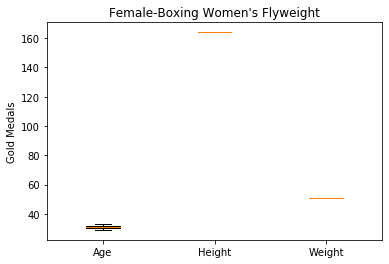

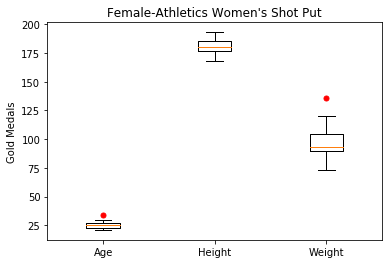

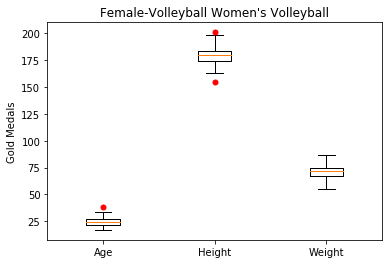

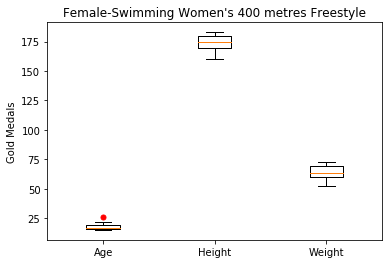

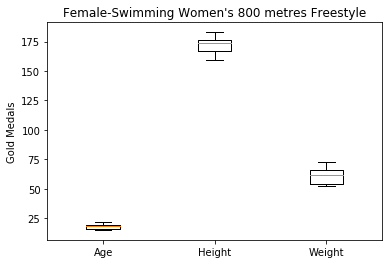

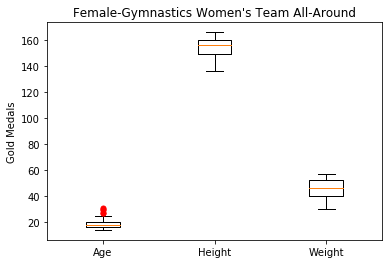

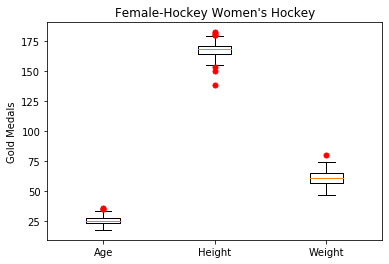

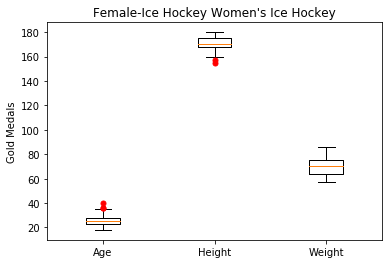

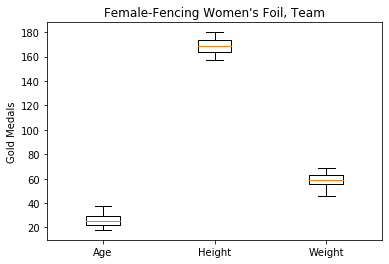

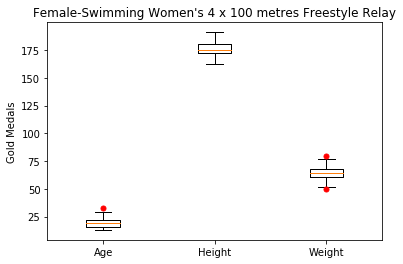

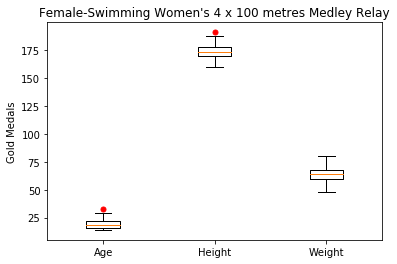

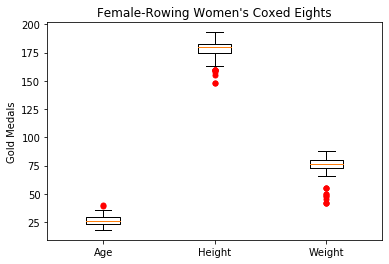

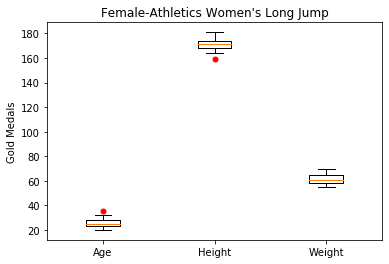

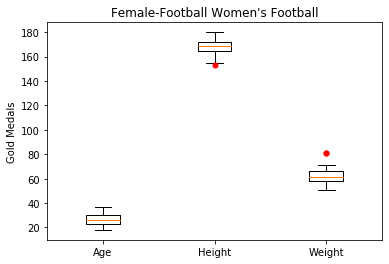

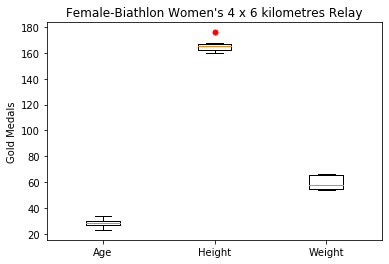

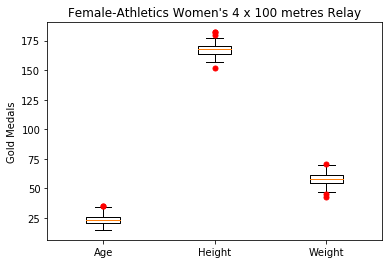

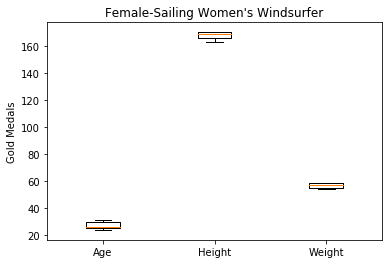

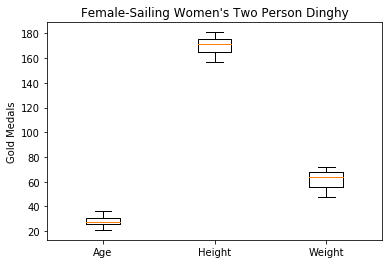

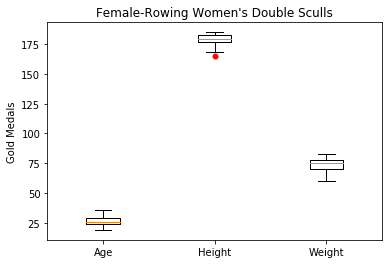

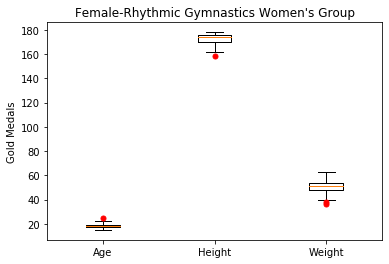

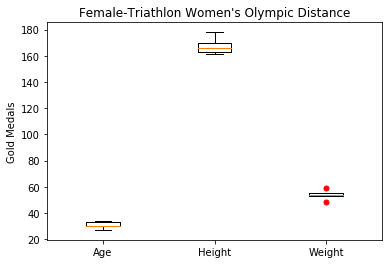

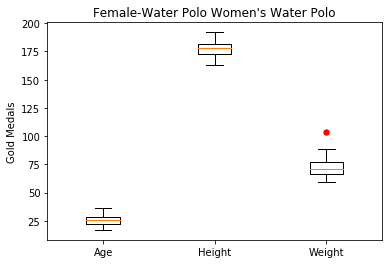

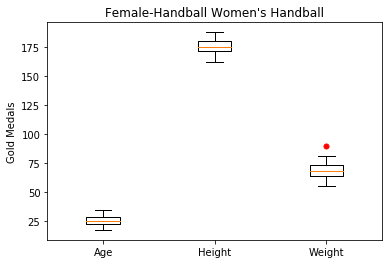

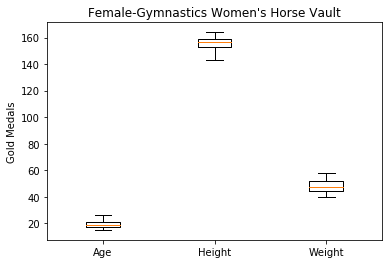

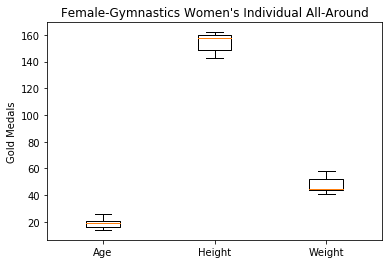

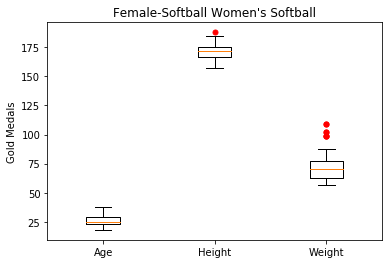

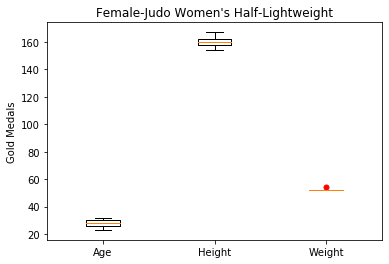

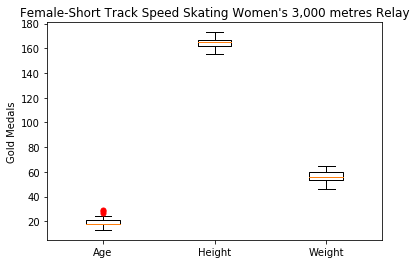

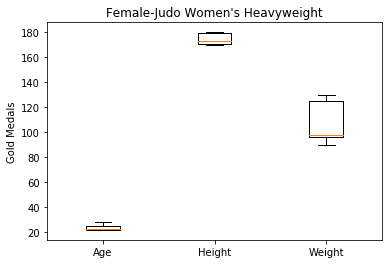

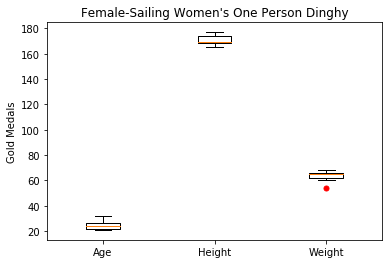

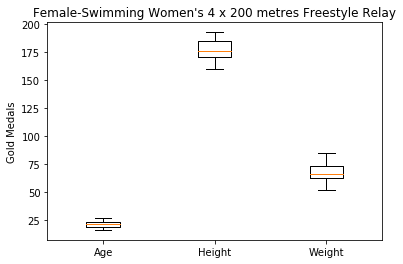

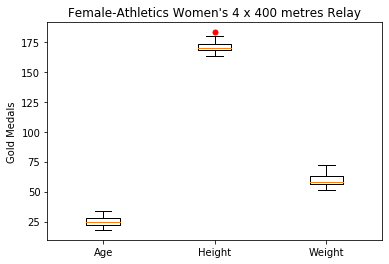

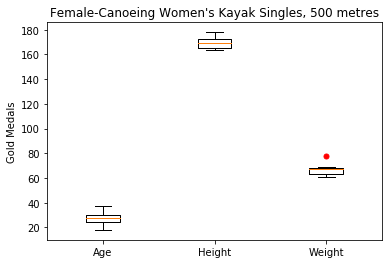

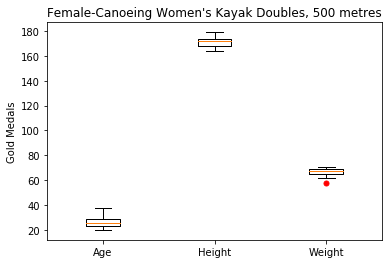

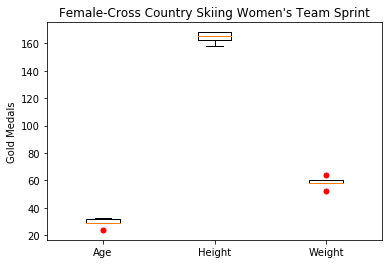

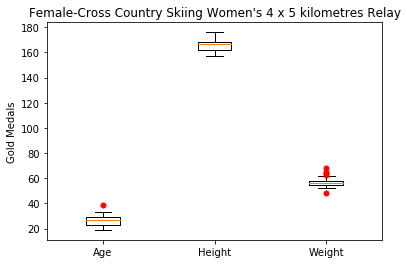

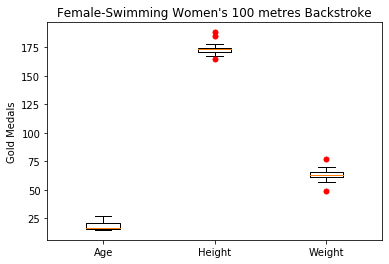

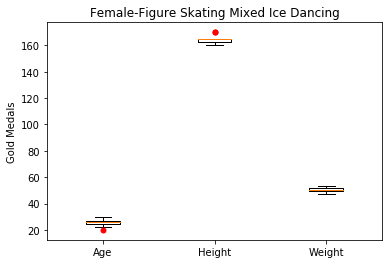

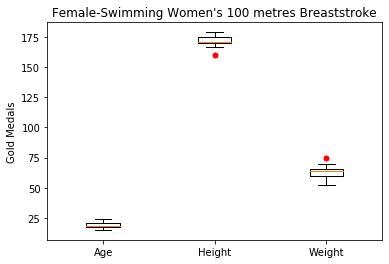

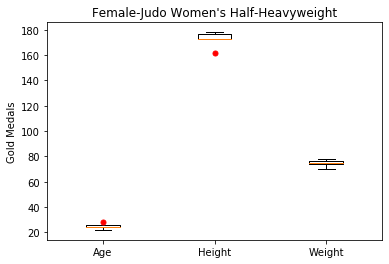

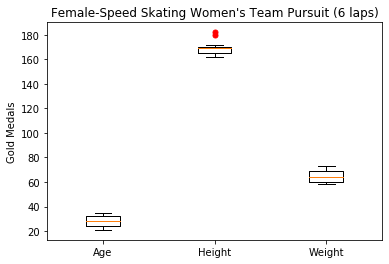

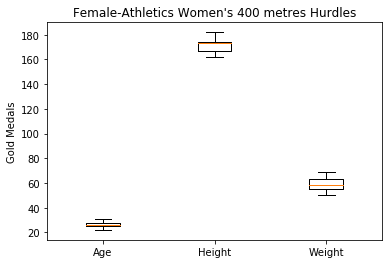

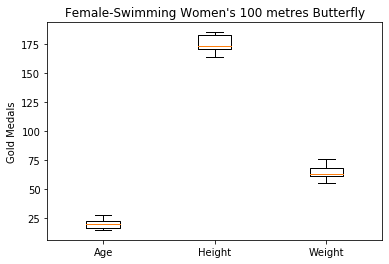

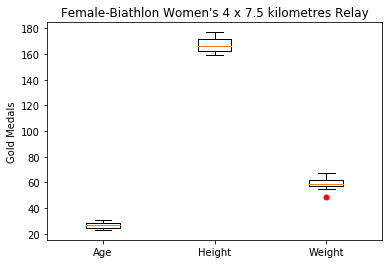

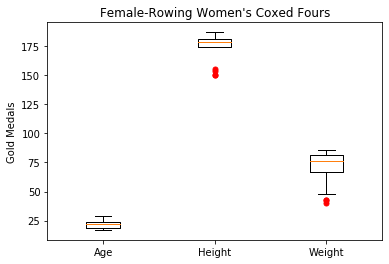

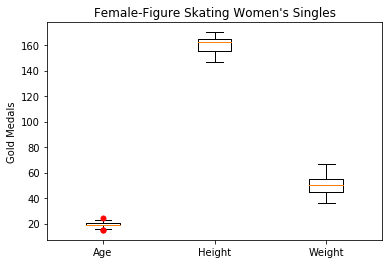

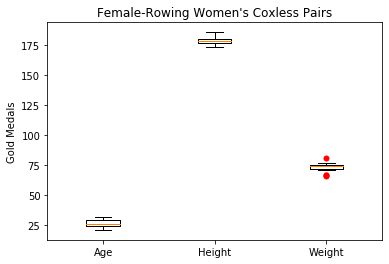

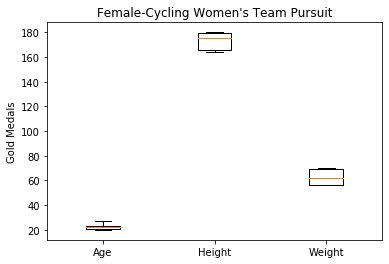

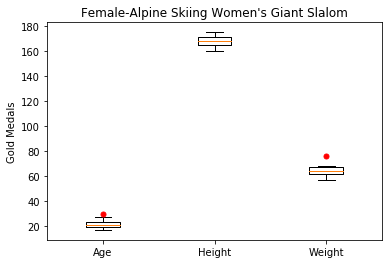

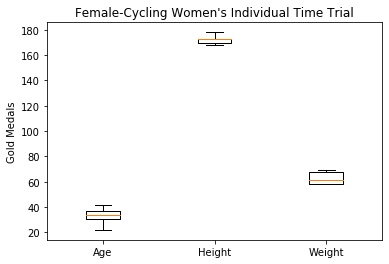

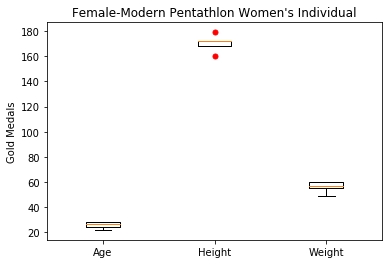

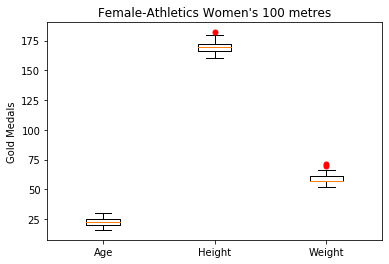

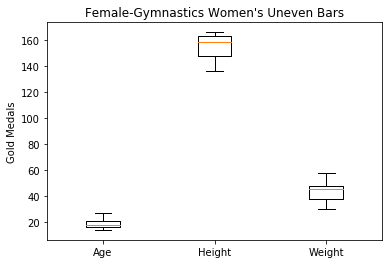

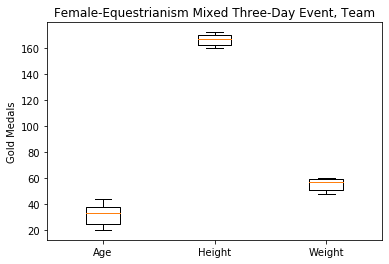

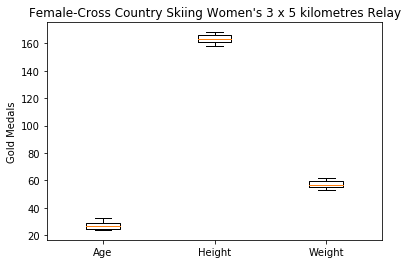

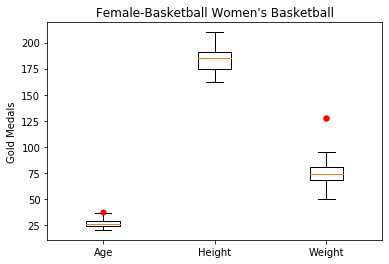

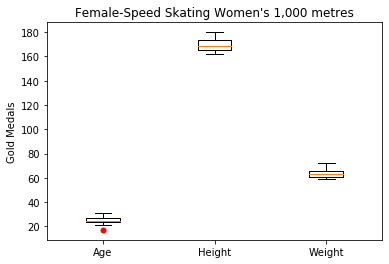

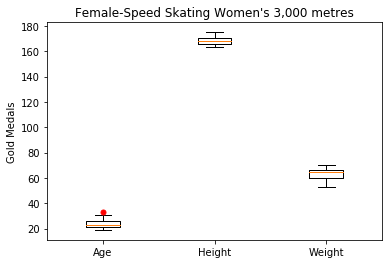

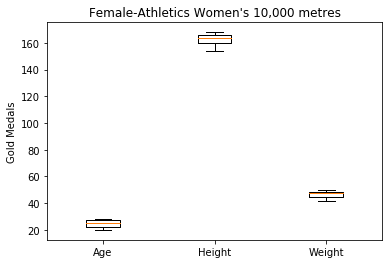

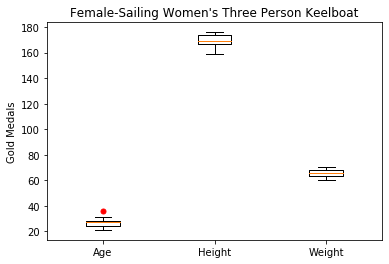

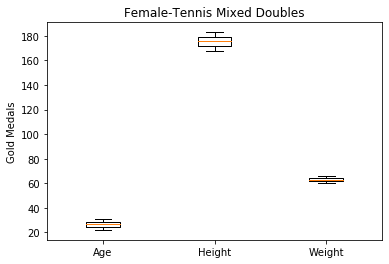

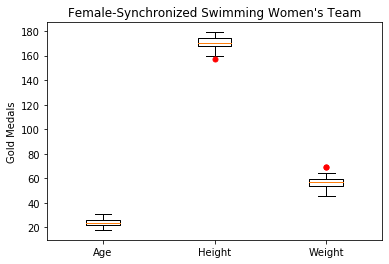

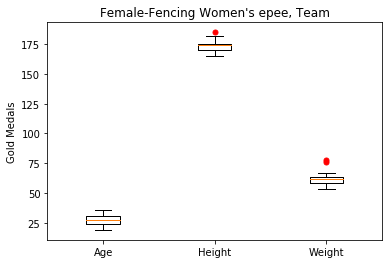

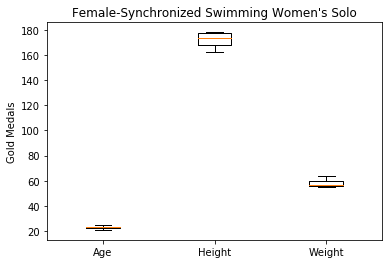

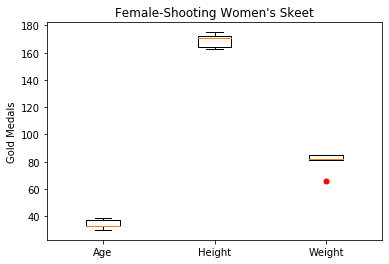

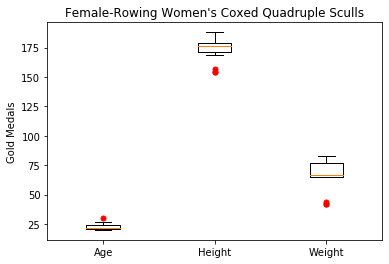

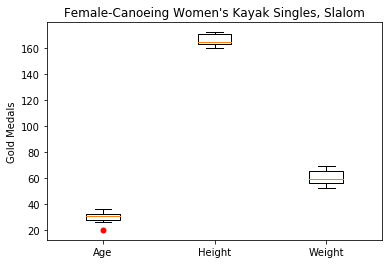

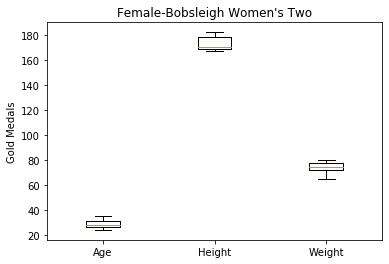

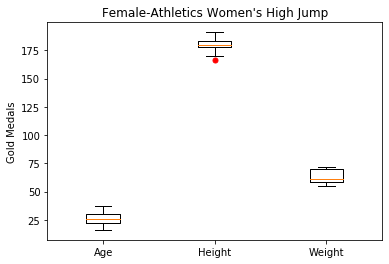

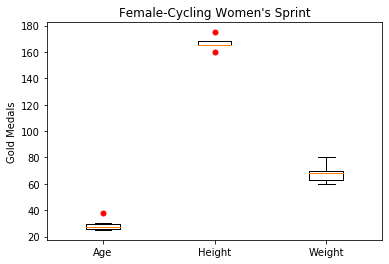

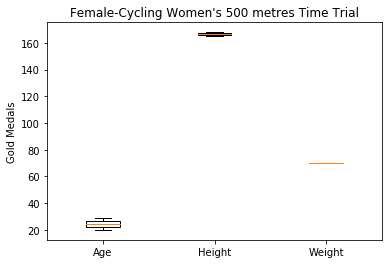

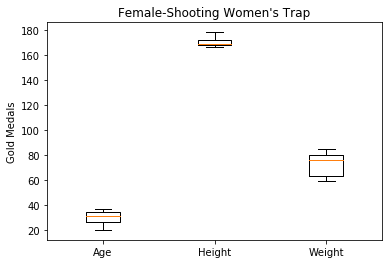

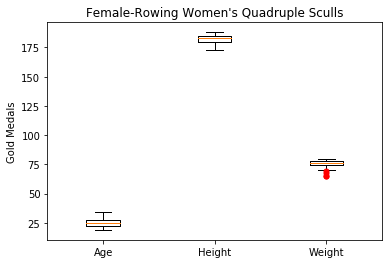

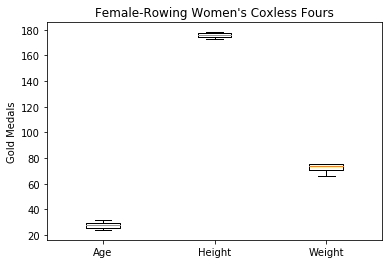

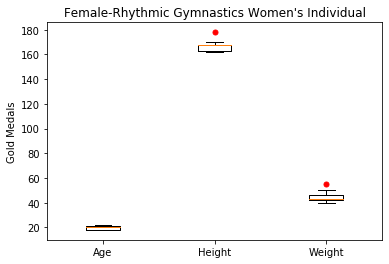

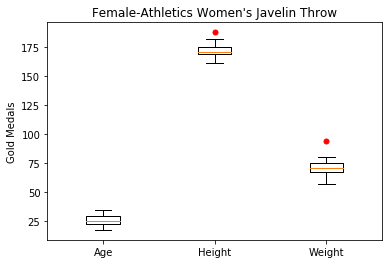

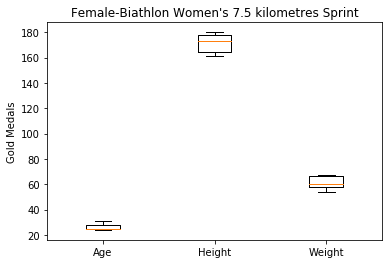

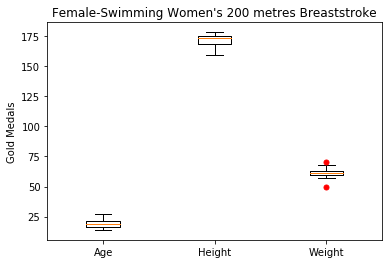

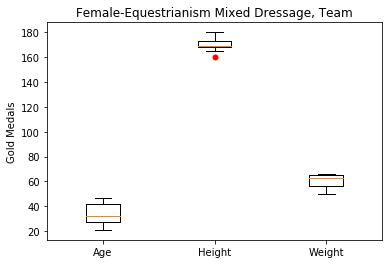

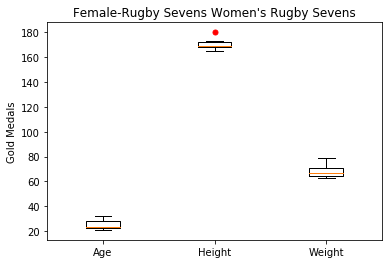

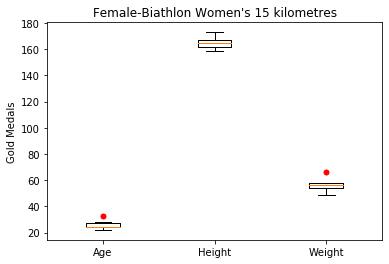

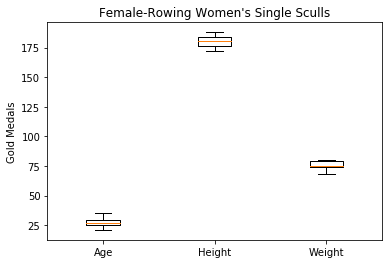

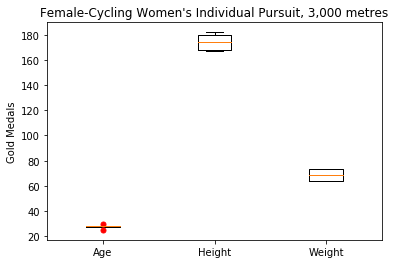

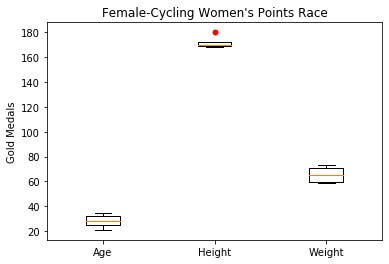

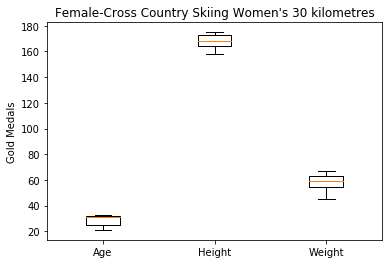

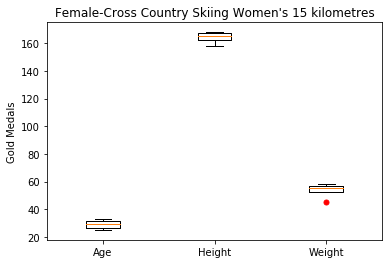

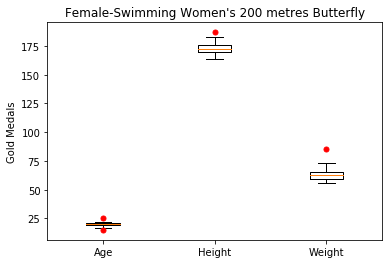

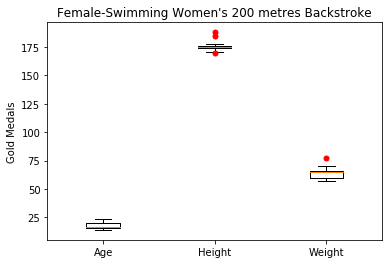

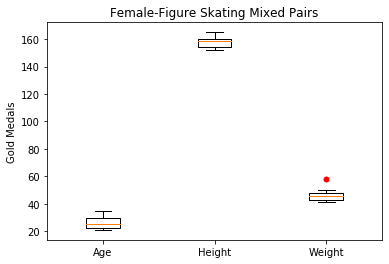

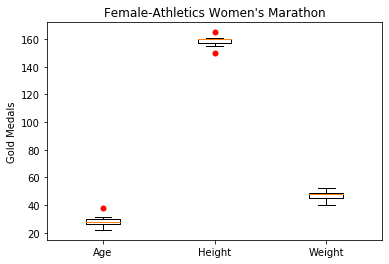

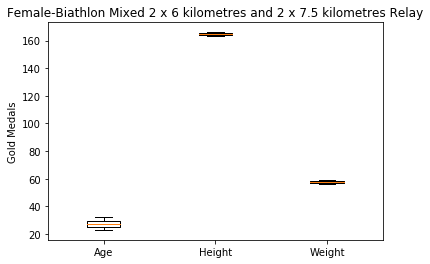

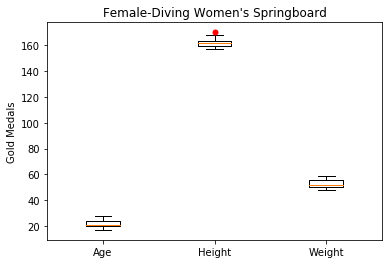

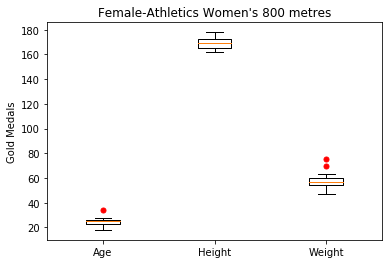

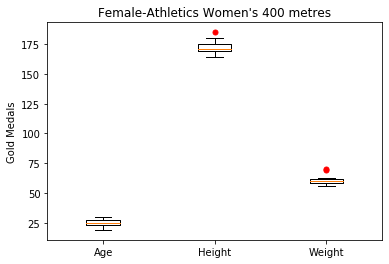

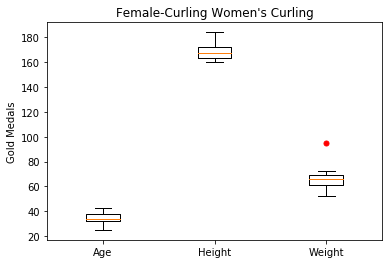

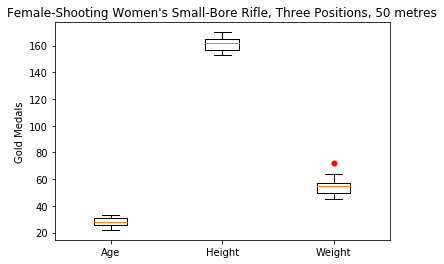

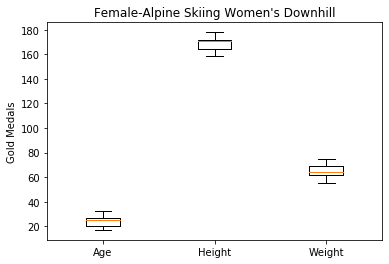

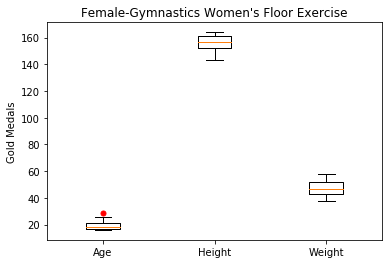

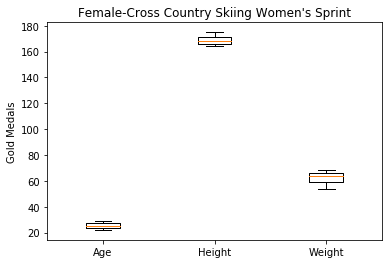

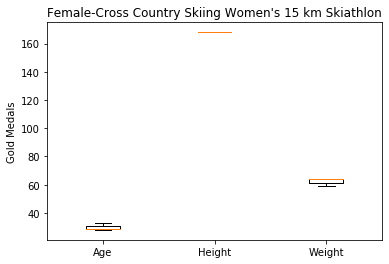

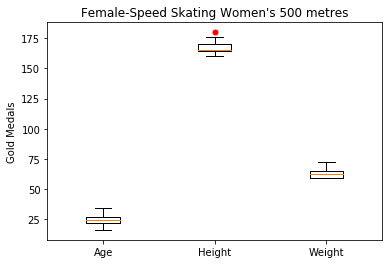

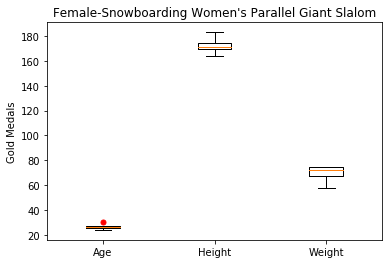

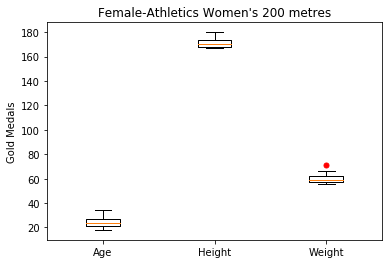

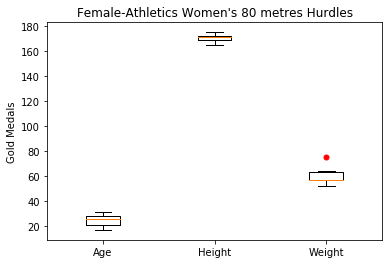

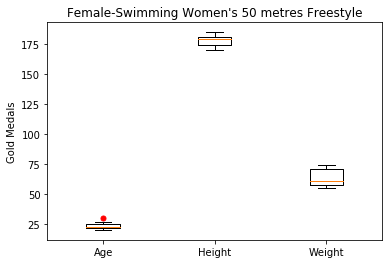

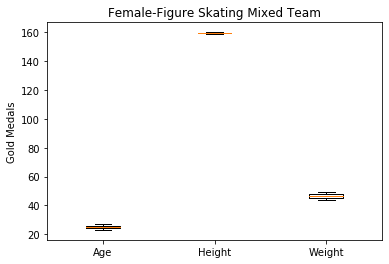

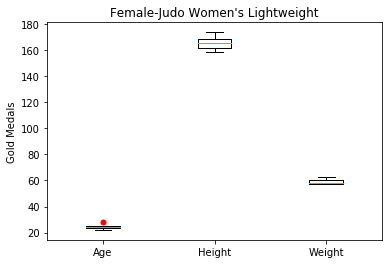

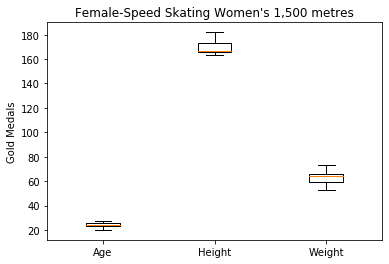

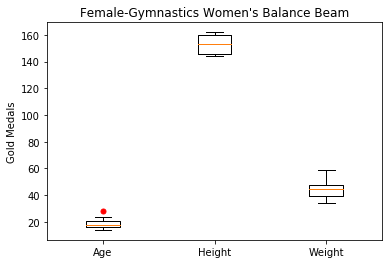

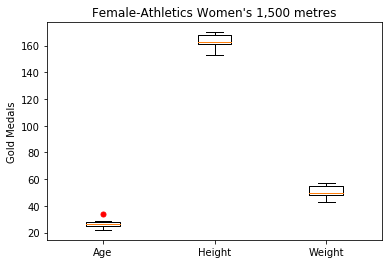

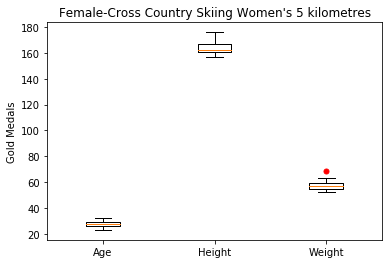

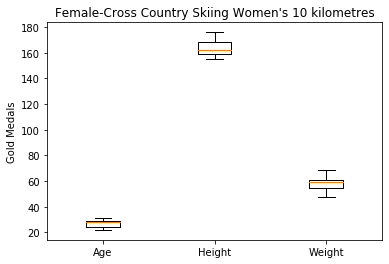

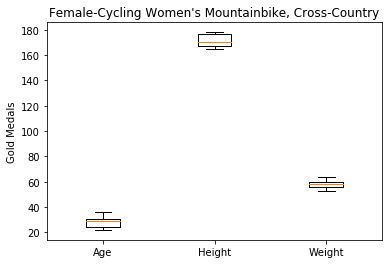

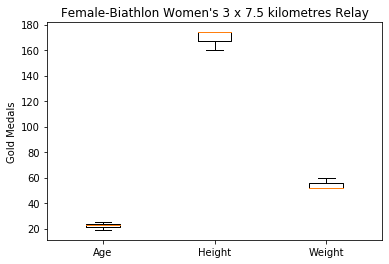

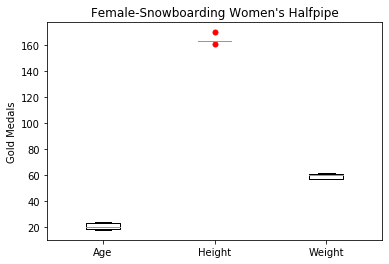

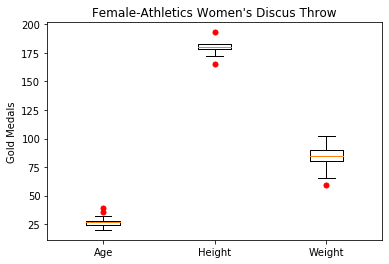

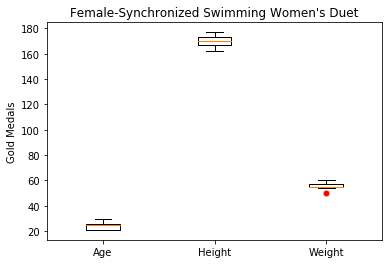

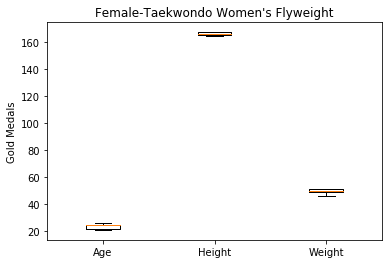

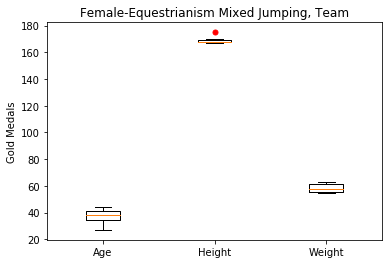

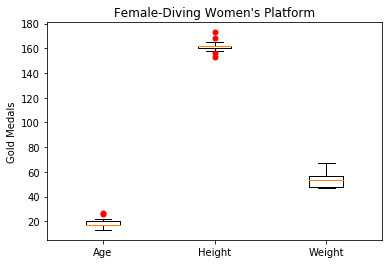

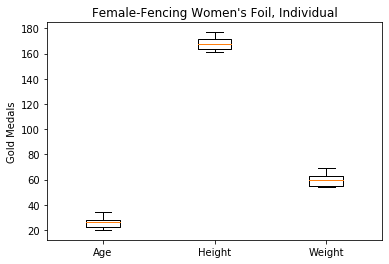

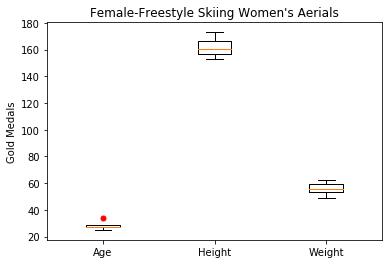

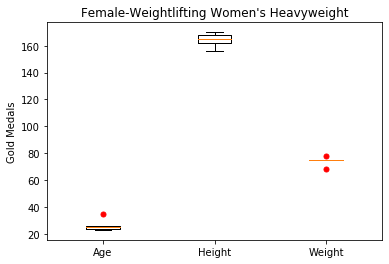

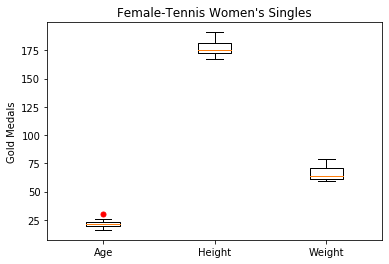

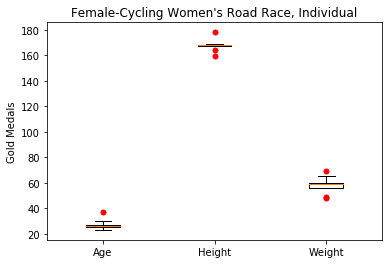

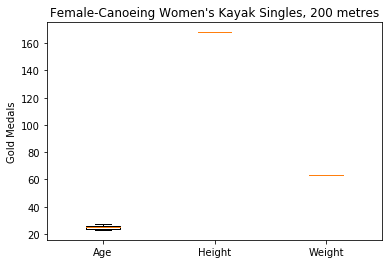

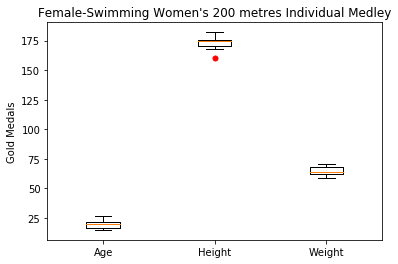

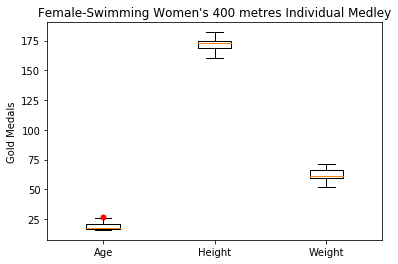

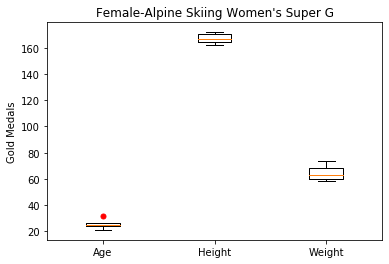

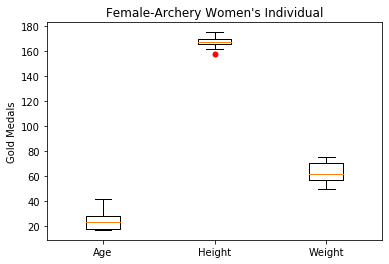

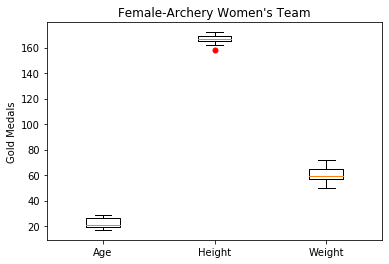

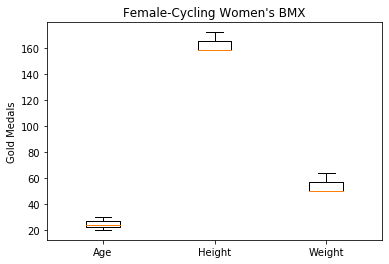

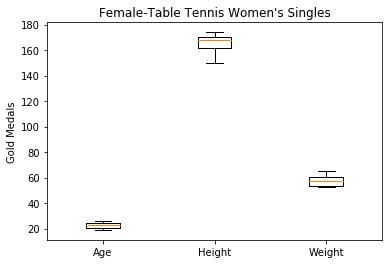

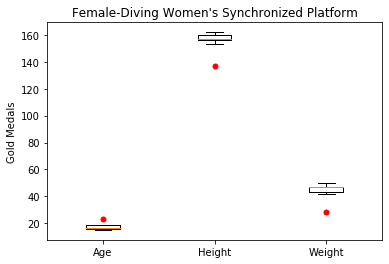

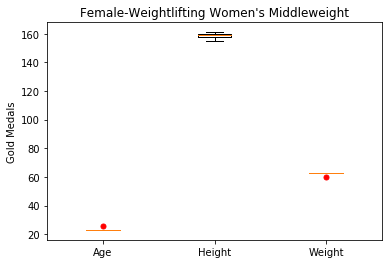

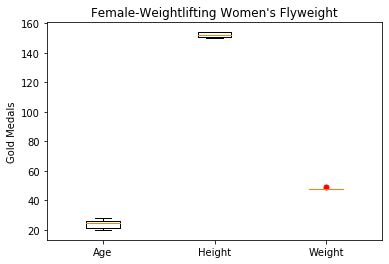

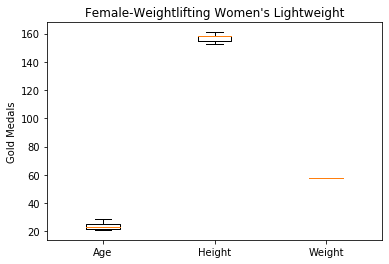

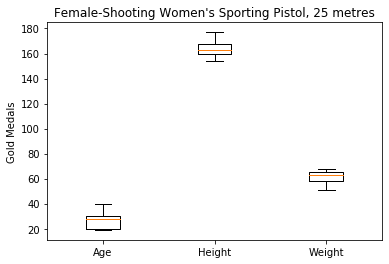

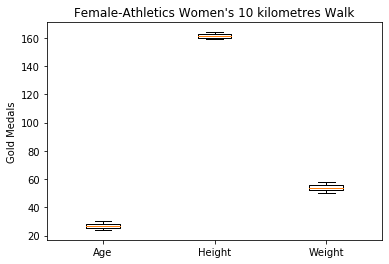

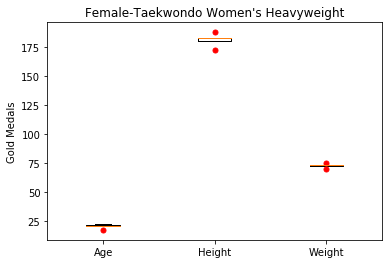

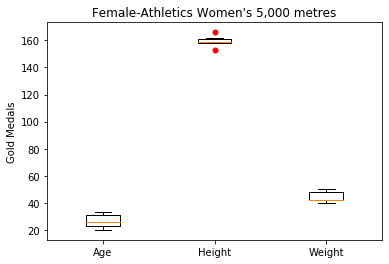

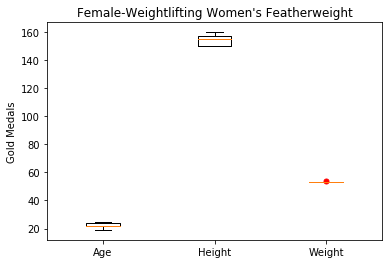

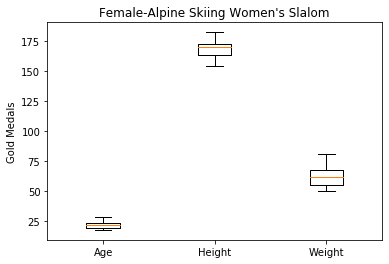

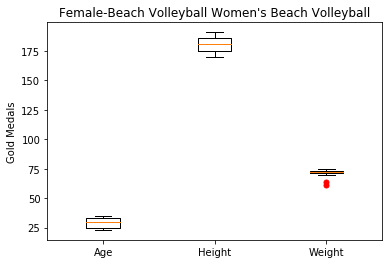

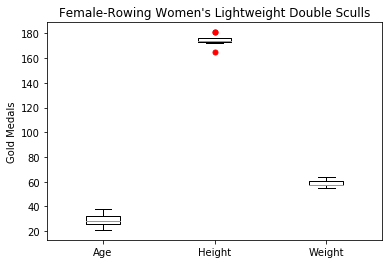

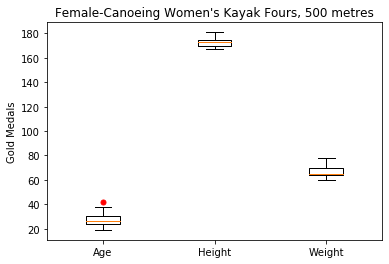

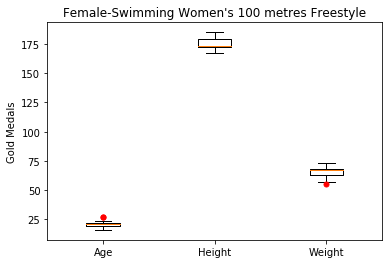

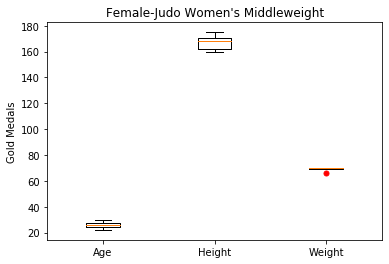

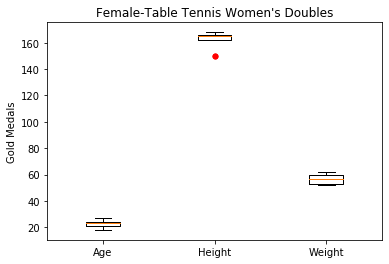

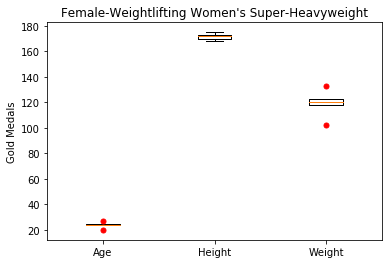

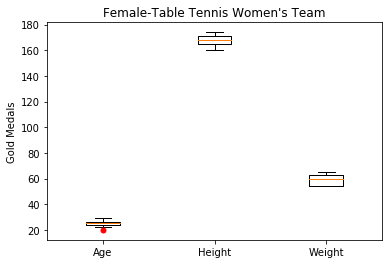

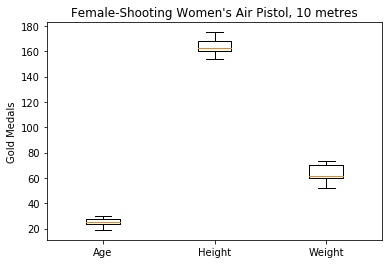

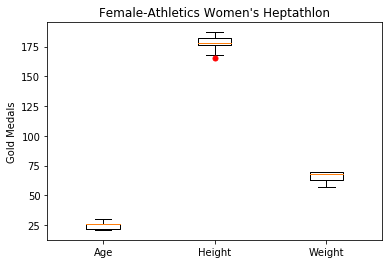

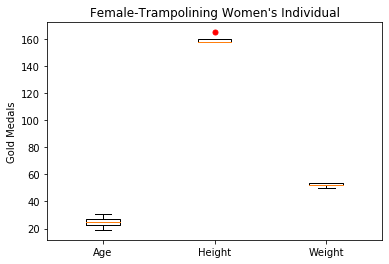

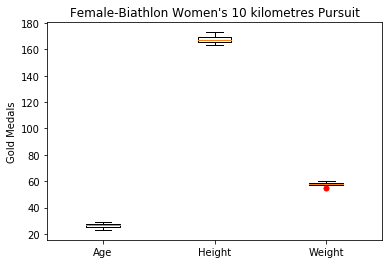

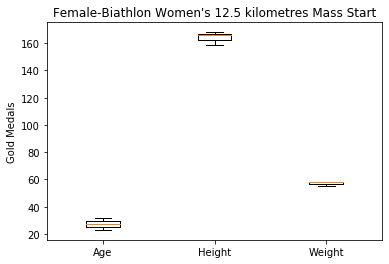

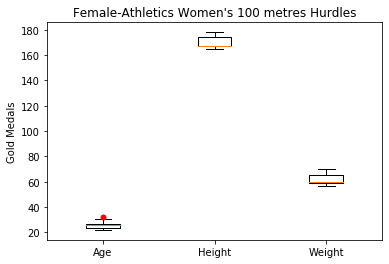

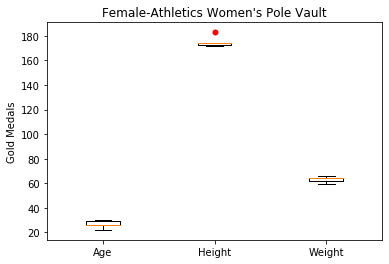

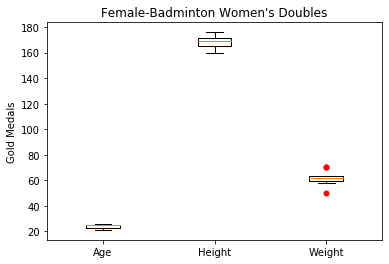

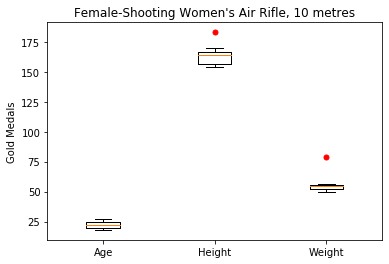

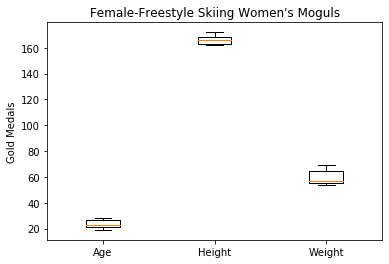

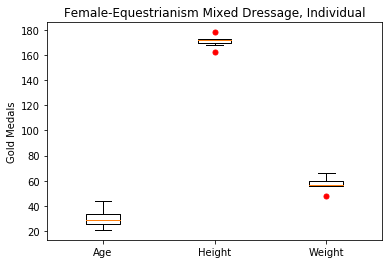

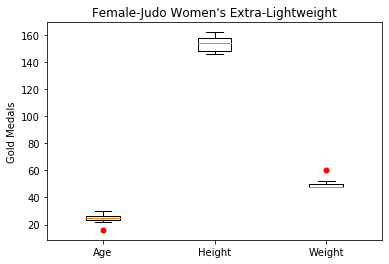

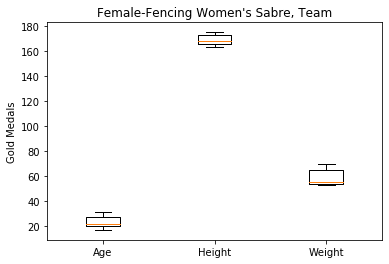

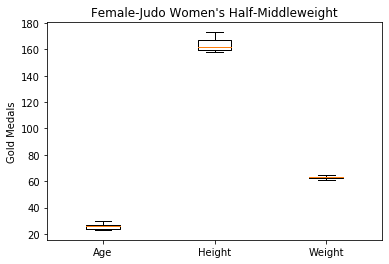

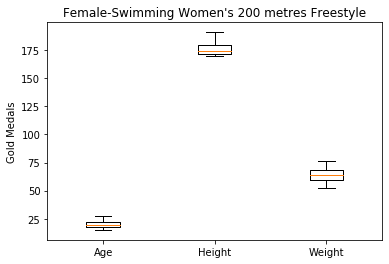

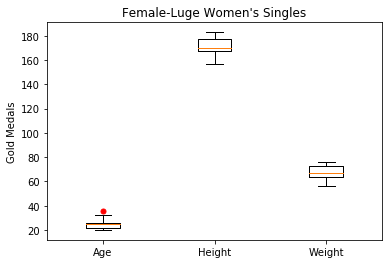

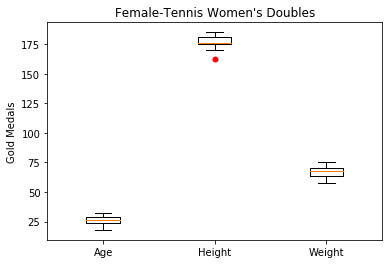

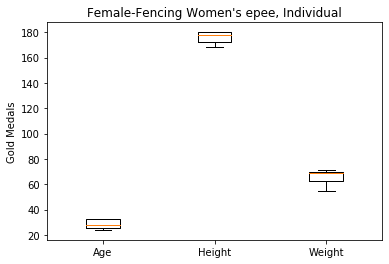

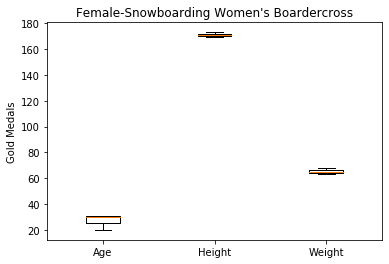

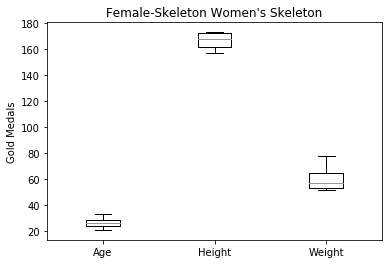

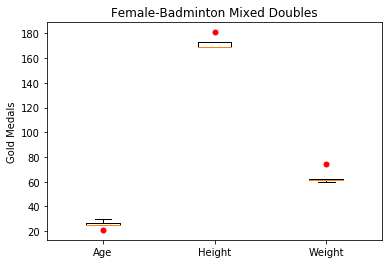

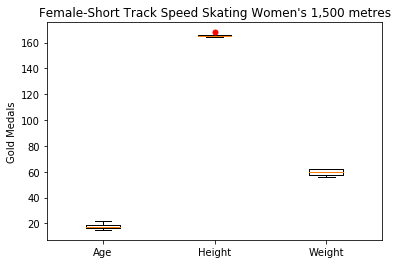

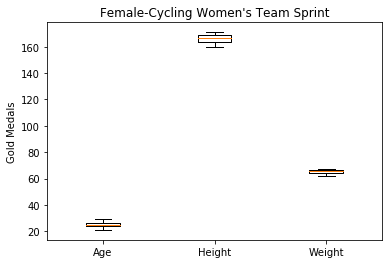

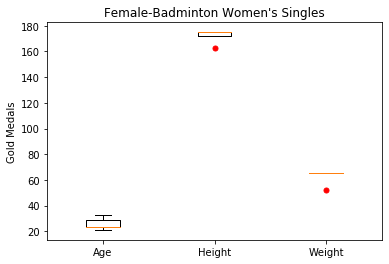

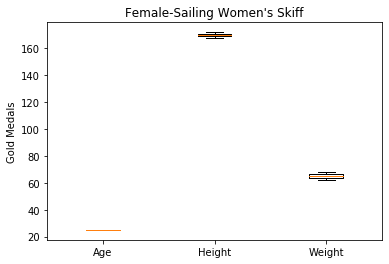

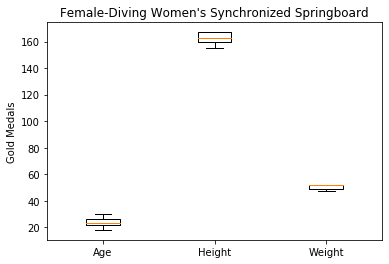

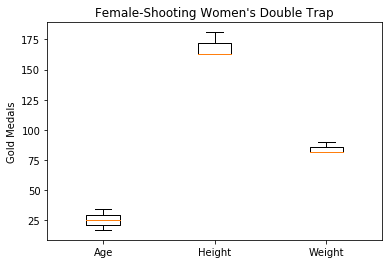

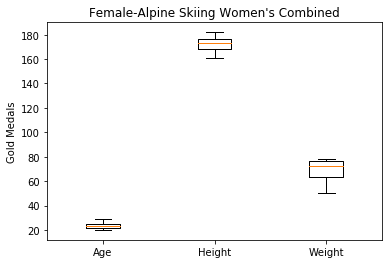

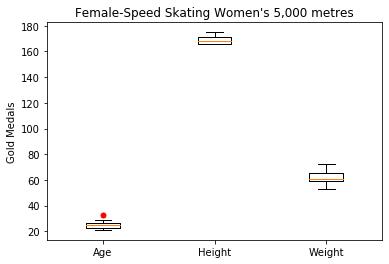

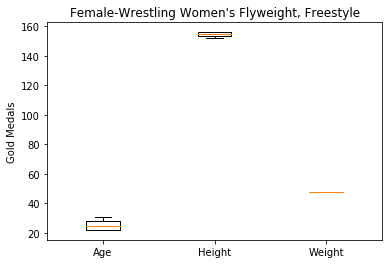

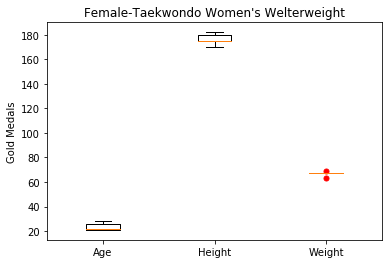

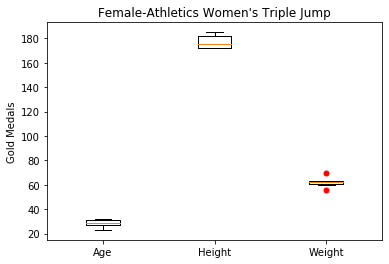

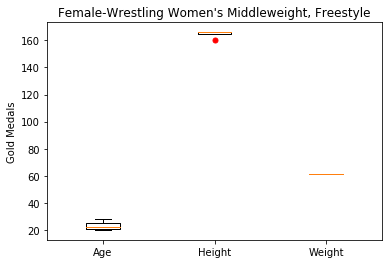

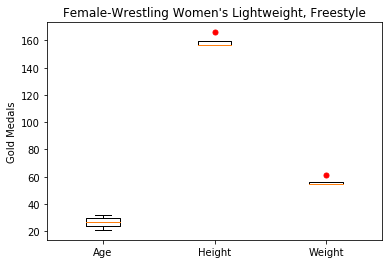

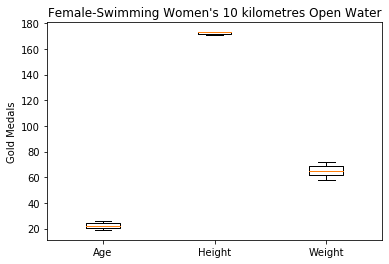

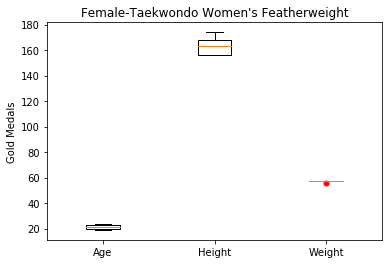

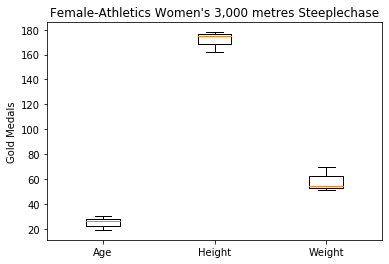

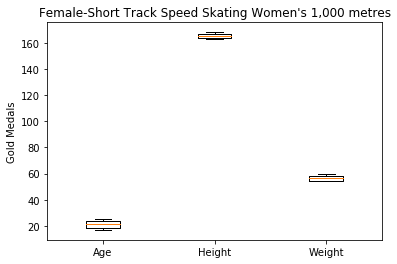

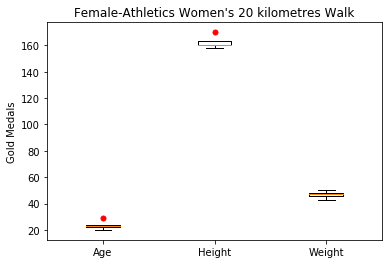

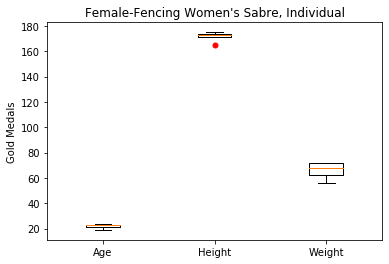

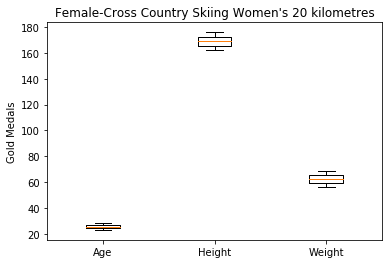

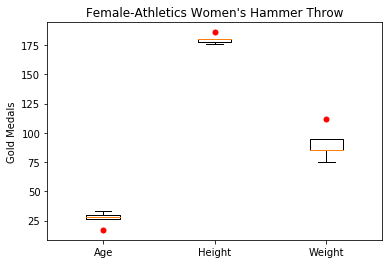

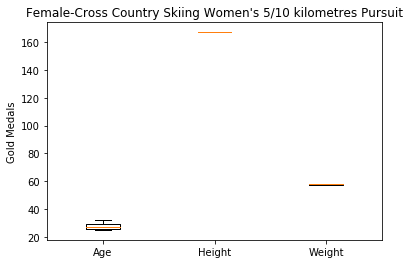

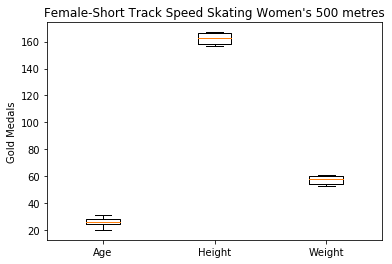

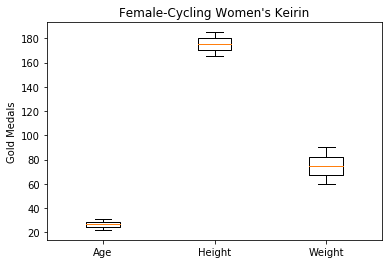

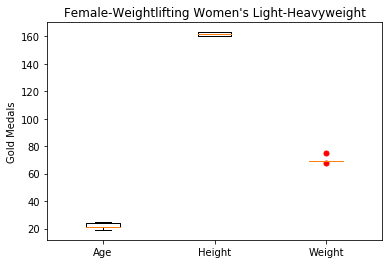

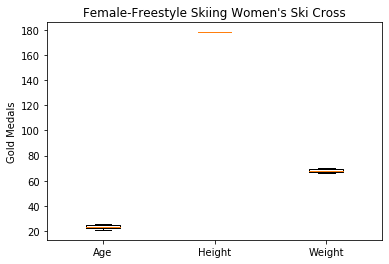

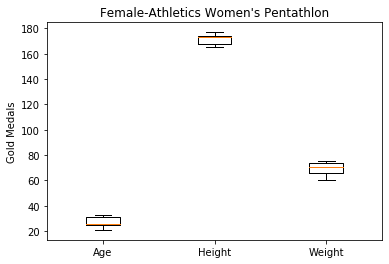

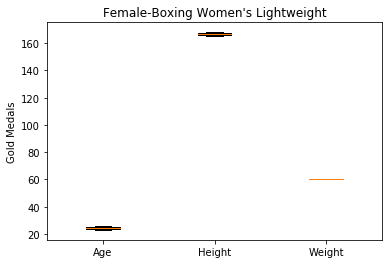

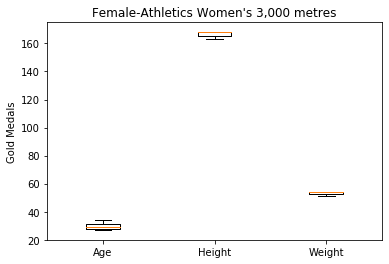

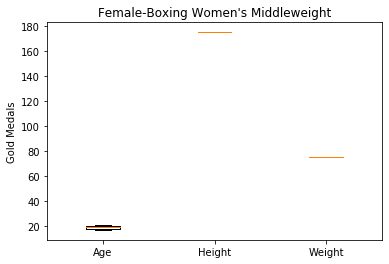

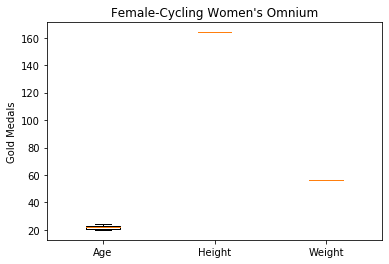

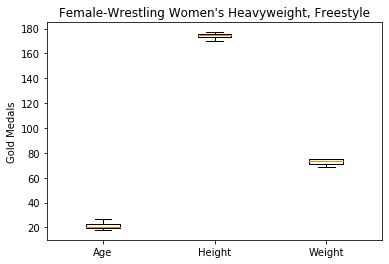

In [4]:
# Get unique name of event
event_list = female_sports_df.Event.unique()

# Create empty age, height, weight lists for storage
gold_age_list = []
gold_height_list = []
gold_weight_list = []

for event_name in event_list:
    #print(event_name)
    def event_function(event_name):
        
        # Filtering DataFrame for specific event name
        df = female_sports_df.loc[(female_sports_df['Event'] == event_name ),:]

        # Creating the Boxplot
        age_plot = df.loc[df['Event'] == event_name]['Age']
        height_plot = df.loc[df['Event'] == event_name]['Height']
        weight_plot = df.loc[df['Event'] == event_name]['Weight']

        outlier_markers = dict(marker = 'o' , markerfacecolor='r', 
                               markersize=5, markeredgecolor='r')
        plt.boxplot([age_plot, height_plot, weight_plot], 
                    labels=['Age', 'Height', 'Weight'], 
                    flierprops=outlier_markers)
        plt.ylabel('Gold Medals')
        plt.title(f'Female-{event_name}')

        #plt.savefig(f'Female-Sport-Events/Plots/Female-{event_name}.png')
        plt.show()

        # Calculate the quartiles
        age_quartiles = age_plot.quantile([.25,.5,.75])
        height_quartiles = height_plot.quantile([.25,.5,.75])
        weight_quartiles = weight_plot.quantile([.25,.5,.75])
        
        # Creating age list
        age = round(age_quartiles[0.5])
        gold_age_list.append(age)
        
        # Creating height list
        height = (height_quartiles[0.5])/30.48
        gold_height_list.append("%.2f"%height)
        
        # Creating weight list
        weight = (weight_quartiles[0.5])*2.205
        gold_weight_list.append("%.2f"%weight)
        
    event_function(event_name)
# print(f'Gold Age List: {gold_age_list}')
# print(f'Gold Height List: {gold_height_list}')
# print(f'Gold Weight List: {gold_weight_list}')

In [5]:
# Finding out length of each list 
print(len(gold_age_list))
print(len(gold_height_list))
print(len(gold_weight_list))
print(len(event_list))

204
204
204
204


In [6]:
# Storing values from list to make a DataFrame
gold_dictionary = {"Event":event_list,"Age":gold_age_list, "Height": gold_height_list, 
                    "Weight":gold_weight_list, "Female": "Female" }

gold_bodycomp_age_df = pd.DataFrame(gold_dictionary)
gold_bodycomp_age_df.head()

Event   Age Height  Weight  Female
0               Boxing Women's Flyweight  31.0   5.38  112.45  Female
1             Athletics Women's Shot Put  26.0   5.91  206.17  Female
2          Volleyball Women's Volleyball  24.0   5.91  158.76  Female
3  Swimming Women's 400 metres Freestyle  17.0   5.74  138.91  Female
4  Swimming Women's 800 metres Freestyle  18.0   5.71  136.71  Female

In [7]:
# Saving Dataframe into a csv file
gold_bodycomp_age_df.to_csv('Female-Events/female_gold_bodycomp_age.csv', index=False)


In [8]:
# Saving Dataframe into a JSON file
gold_bodycomp_age_df.to_json('Female-Events/female_gold_bodycomp_age.json')



# Silver

In [9]:
# Load data
female_sports_df = pd.read_csv('Female-Sports/female_athletes_silver.csv')
female_sports_df.head()


NOC                                     Name Sex   Age  Height  Weight  \
0  RUS  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0   179.0    80.0   
1  RUS                Tamila Rashidovna Abasova   F  21.0   163.0    60.0   
2  USA                    Monica Cecilia Abbott   F  23.0   191.0    88.0   
3  USA                      Nia Nicole Abdallah   F  20.0   175.0    56.0   
4  GDR                               Irene Abel   F  19.0   160.0    48.0   

   Season  Year       Sport                               Event   Medal  
0  Summer  2008   Athletics     Athletics Women's Javelin Throw  Silver  
1  Summer  2004     Cycling              Cycling Women's Sprint  Silver  
2  Summer  2008    Softball           Softball Women's Softball  Silver  
3  Summer  2004   Taekwondo     Taekwondo Women's Featherweight  Silver  
4  Summer  1972  Gymnastics  Gymnastics Women's Team All-Around  Silver

In [10]:
# Dropping every row with 1 Olympian only

female_sports_df = female_sports_df[(female_sports_df.Event != "Snowboarding Women's Slopestyle") & 
                                    (female_sports_df.Event != "Freestyle Skiing Women's Halfpipe") &
                                    (female_sports_df.Event != "Sailing Mixed Multihull") &
                                    (female_sports_df.Event != "Wrestling Women's Light-Heavyweight, Freestyle") &
                                    (female_sports_df.Event != "Snowboarding Women's Parallel Slalom") &
                                    (female_sports_df.Event != "Luge Mixed Team Relay") &
                                    (female_sports_df.Event != "Freestyle Skiing Women's Slopestyle") &
                                    (female_sports_df.Event != "Wrestling Women's Featherweight, Freestyle") &
                                    (female_sports_df.Event != "Golf Women's Individual") &
                                    (female_sports_df.Event != "Snowboarding Women's Giant Slalom") &
                                    (female_sports_df.Event != "Cross Country Skiing Women's 5/5 kilometres Pursuit") &
                                    (female_sports_df.Event != "Gymnastics Women's Team Portable Apparatus") &
                                    (female_sports_df.Event != "Ski Jumping Women's Normal Hill, Individual") &
                                    (female_sports_df.Event != "Shooting Mixed Skeet") &
                                    (female_sports_df.Event != "Shooting Mixed Small-Bore Rifle, Three Positions, 50 metres") &
                                    (female_sports_df.Event != "Equestrianism Mixed Jumping, Individual") &
                                    (female_sports_df.Event != "Equestrianism Mixed Three-Day Event, Individual")
                                   ]
# female_sports_df.head()

# "Snowboarding Women's Slopestyle": 2014 Winter
# "Freestyle Skiing Women's Halfpipe": 2014 Winter
# "Sailing Mixed Multihull": 2016 Summer
# "Wrestling Women's Light-Heavyweight, Freestyle": 2016 Summer
# "Snowboarding Women's Parallel Slalom": 2014 Winter
# "Luge Mixed Team Relay": 2014 Winter
# "Freestyle Skiing Women's Slopestyle": 2014 Winter
# "Wrestling Women's Featherweight, Freestyle": 2016 Summer
# "Golf Women's Individual": 2016 Summer
# "Snowboarding Women's Giant Slalom": 1998 Winter
# Cross Country Skiing Women's 5/5 kilometres Pursuit: 2002 Winter
# Gymnastics Women's Team Portable Apparatus: 1956 Summer
# Ski Jumping Women's Normal Hill, Individual: 2014 Winter
# Shooting Mixed Skeet: 1992 Summer
# "Shooting Mixed Small-Bore Rifle, Three Positions, 50 metres": 1976 Summer
# "Equestrianism Mixed Jumping, Individual": Not in Gold
# "Equestrianism Mixed Three-Day Event, Individual": Not in Gold



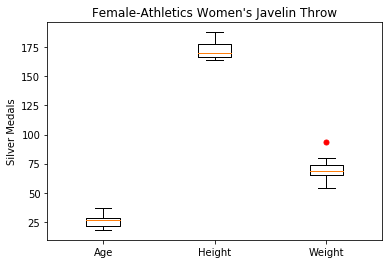

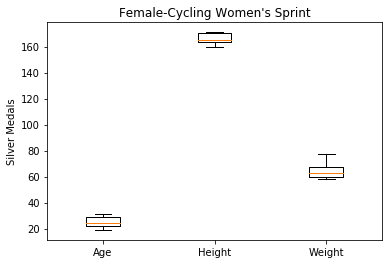

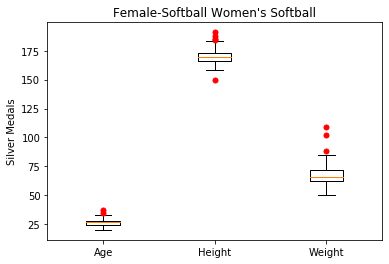

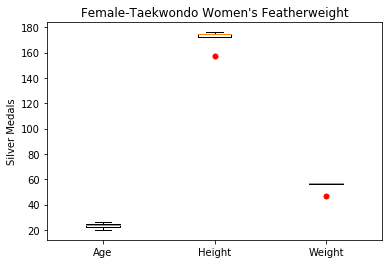

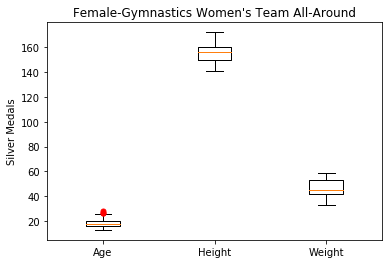

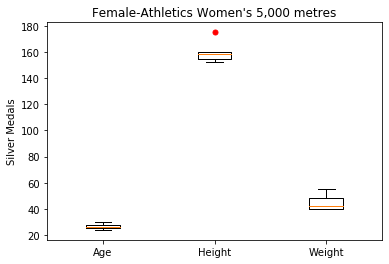

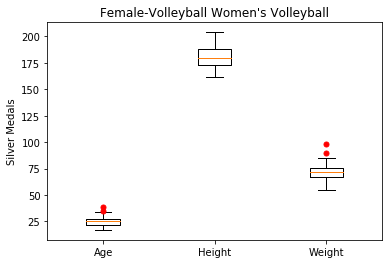

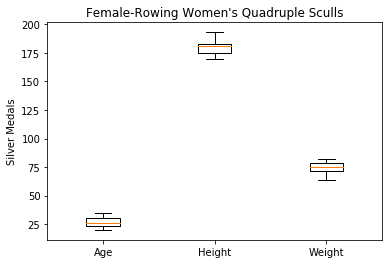

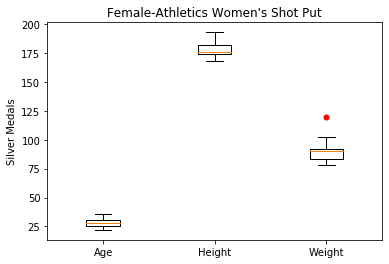

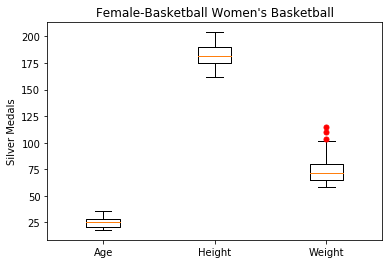

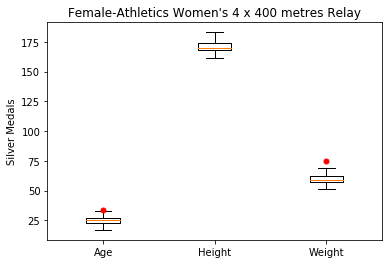

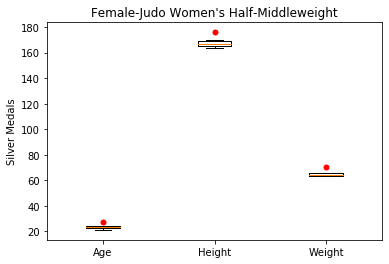

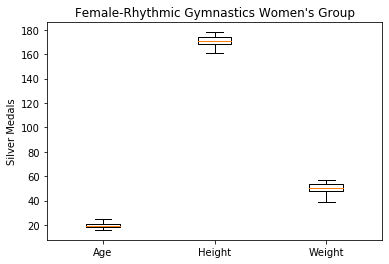

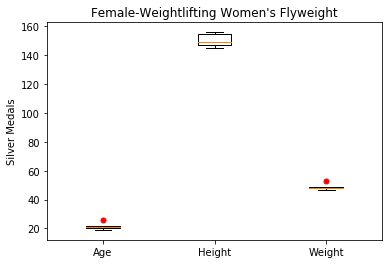

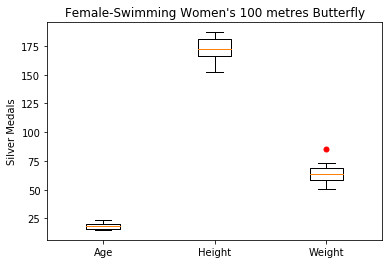

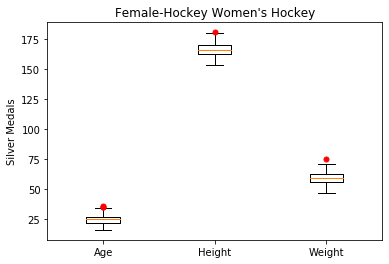

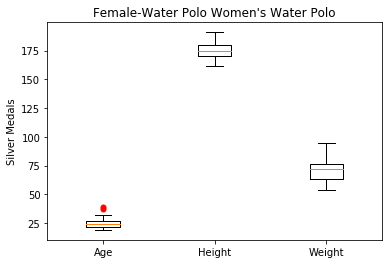

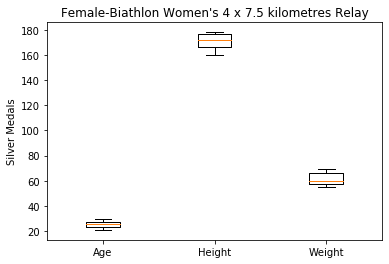

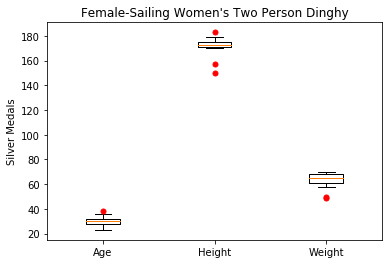

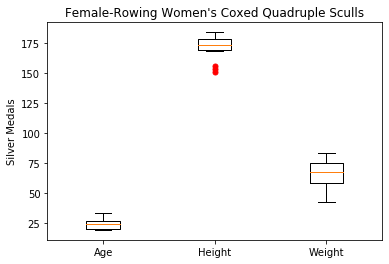

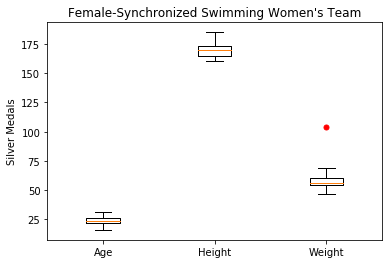

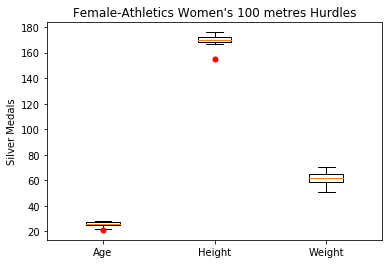

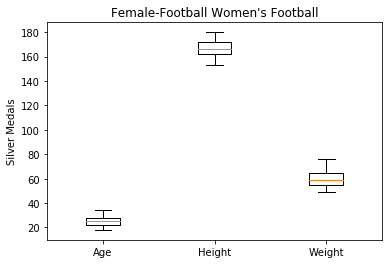

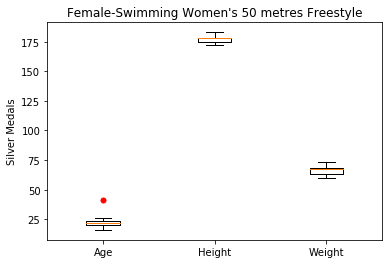

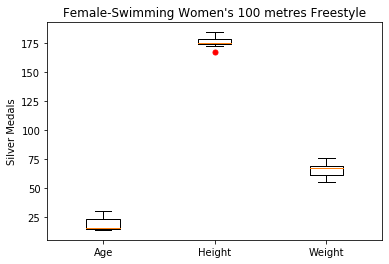

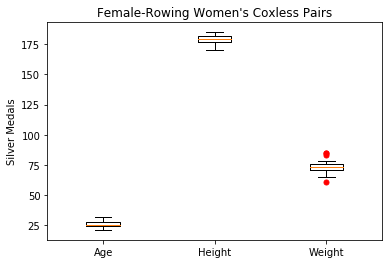

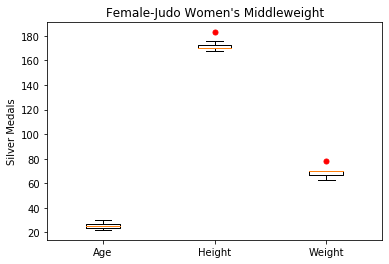

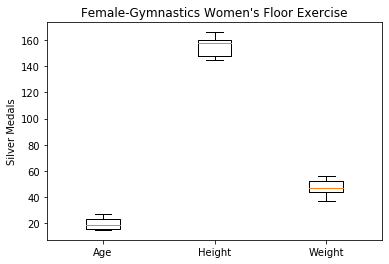

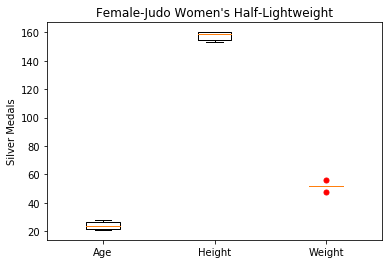

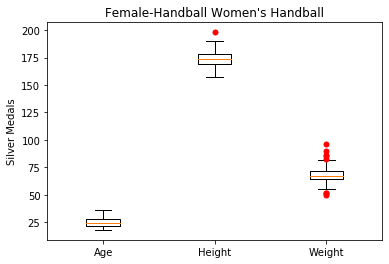

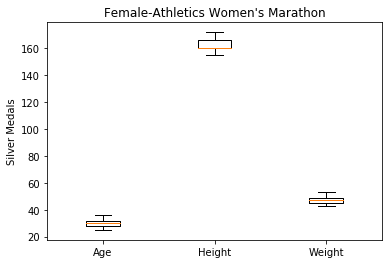

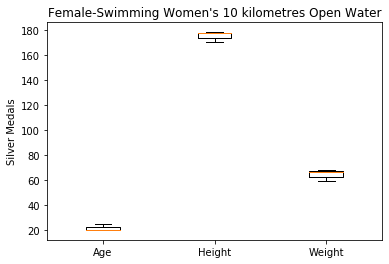

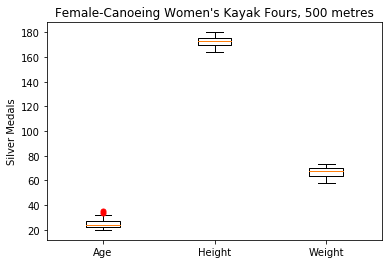

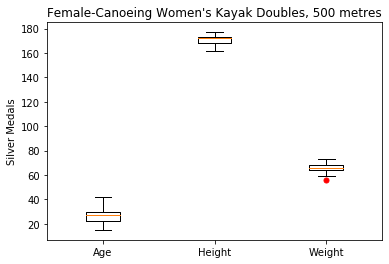

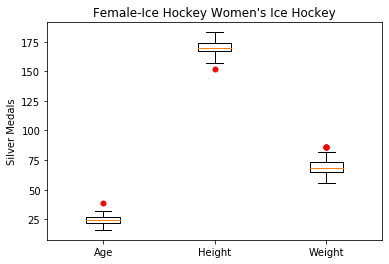

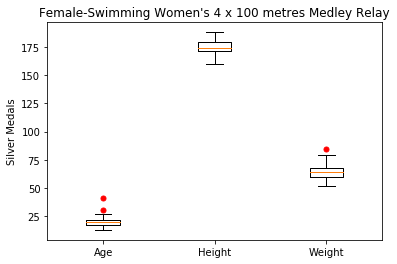

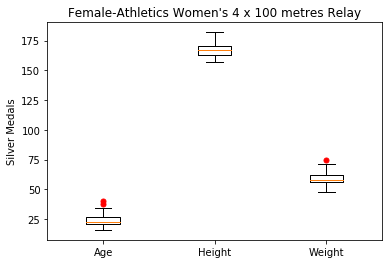

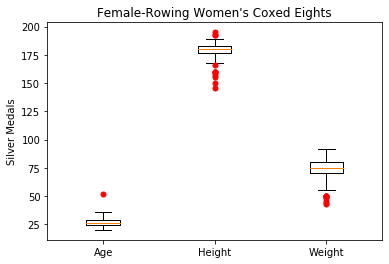

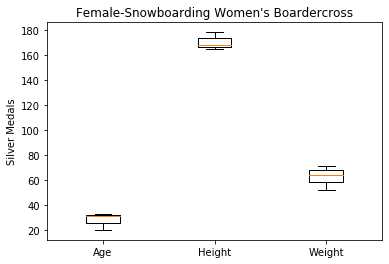

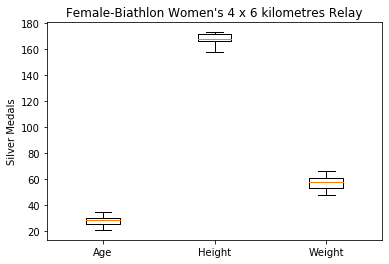

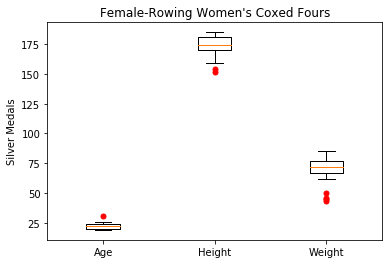

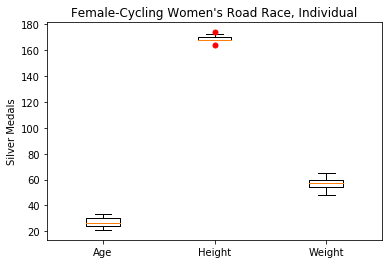

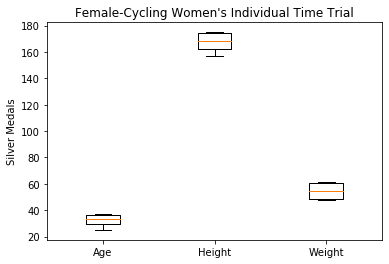

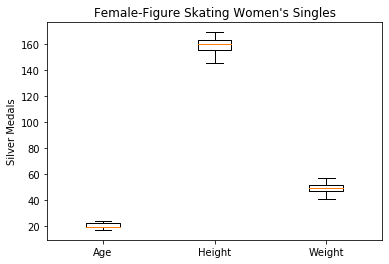

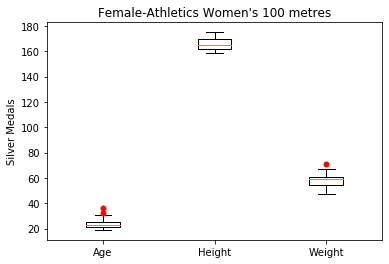

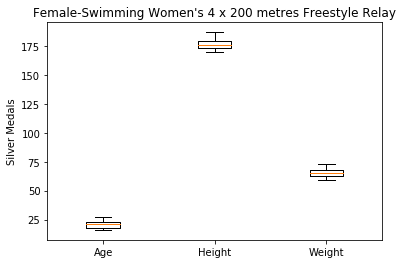

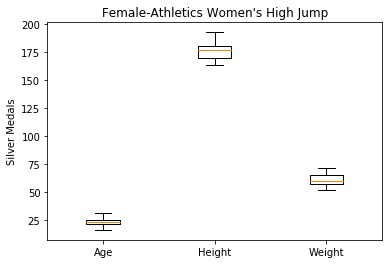

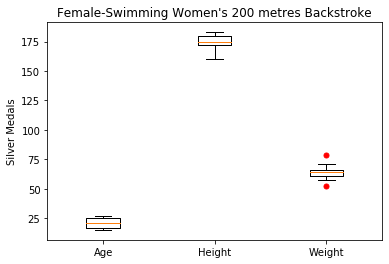

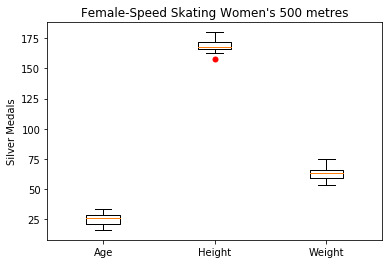

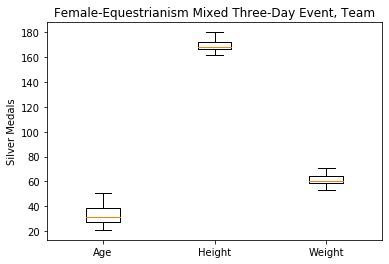

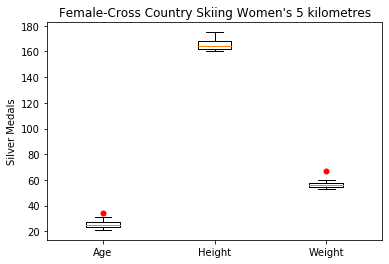

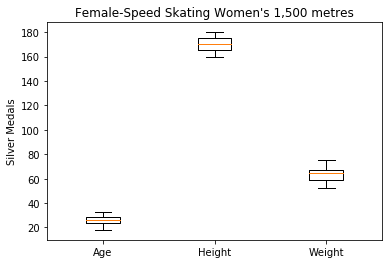

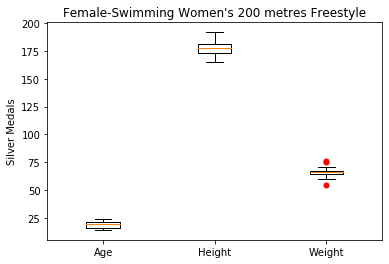

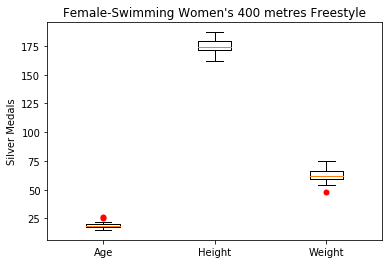

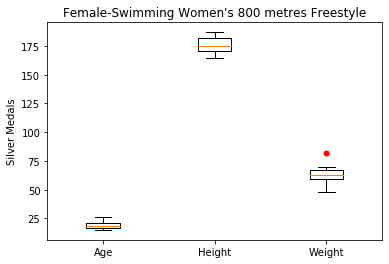

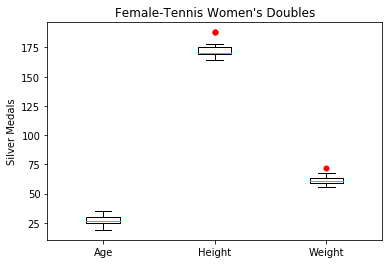

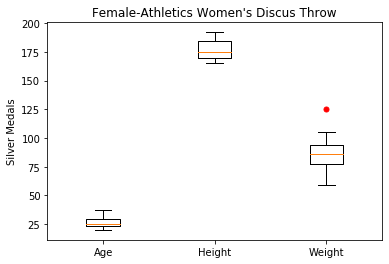

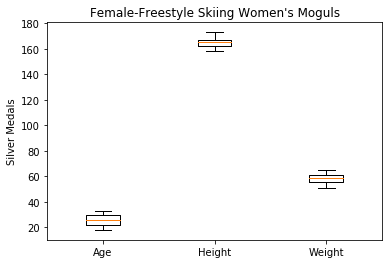

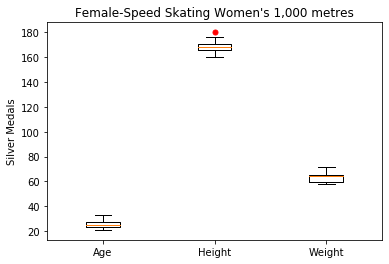

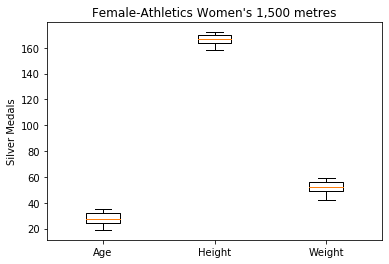

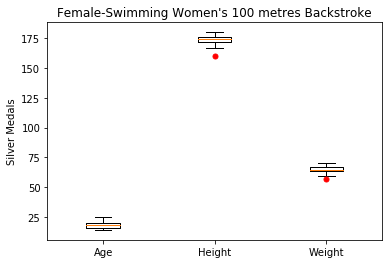

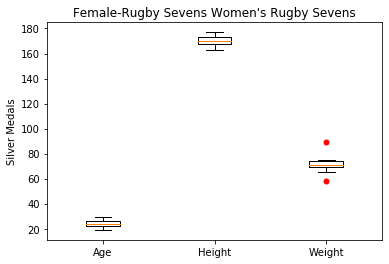

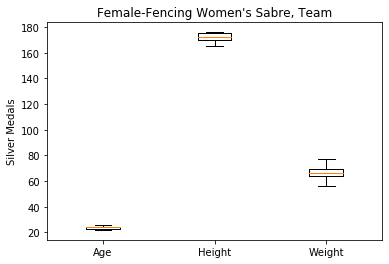

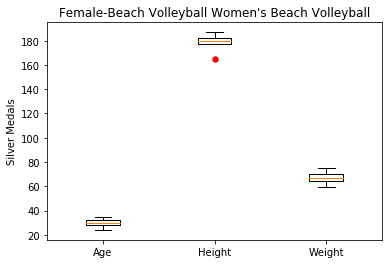

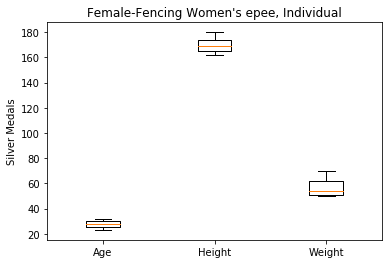

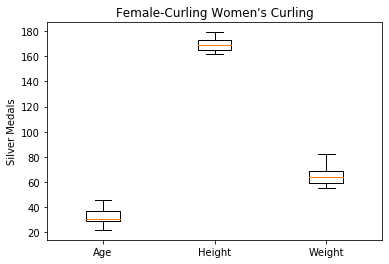

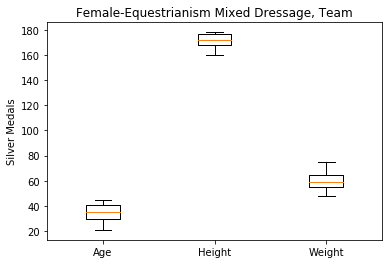

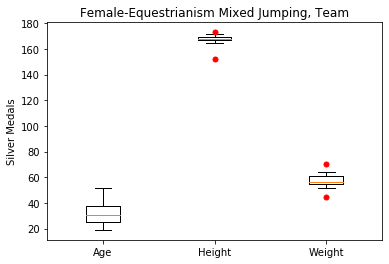

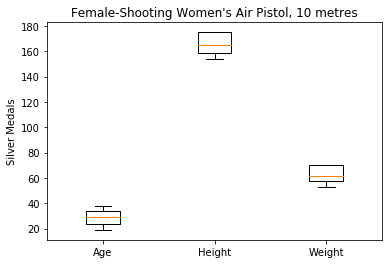

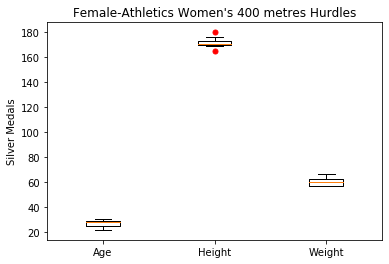

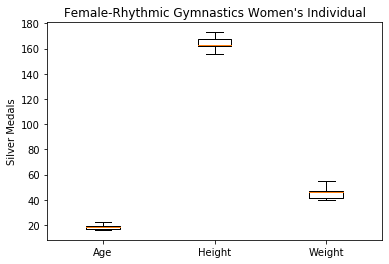

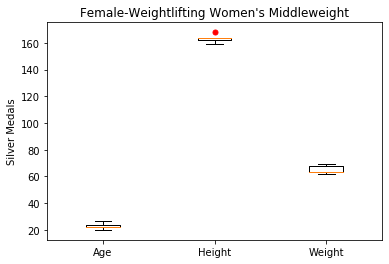

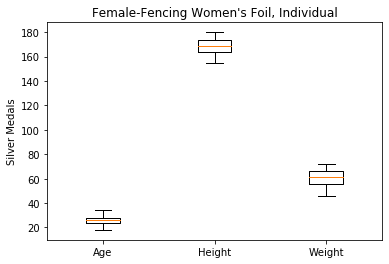

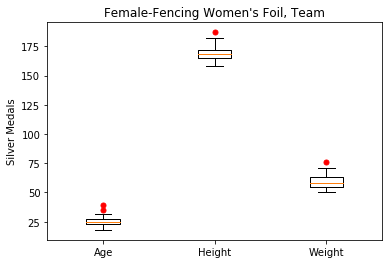

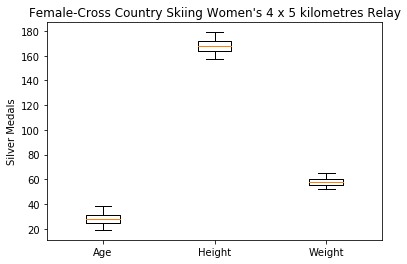

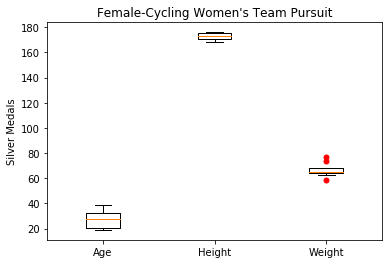

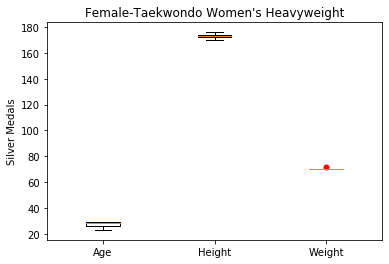

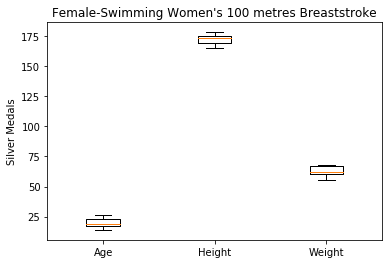

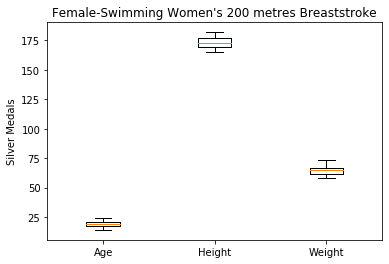

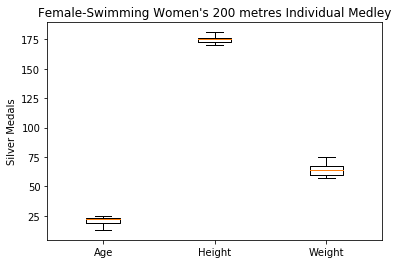

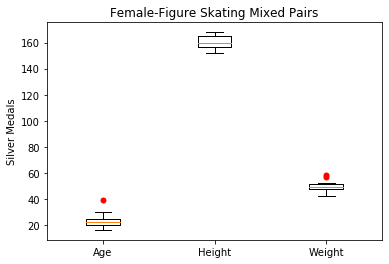

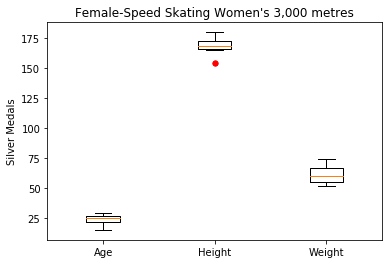

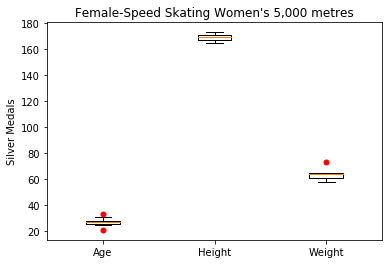

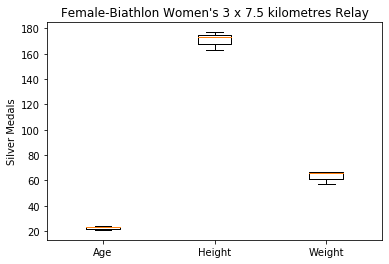

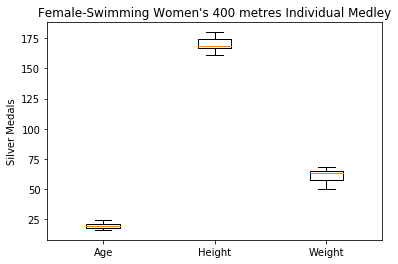

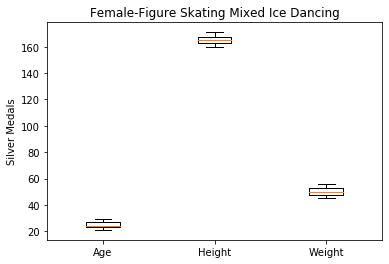

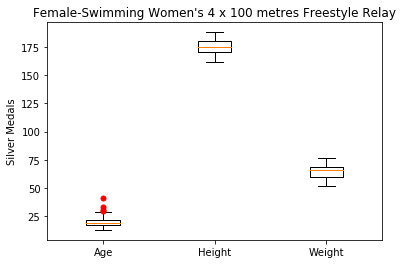

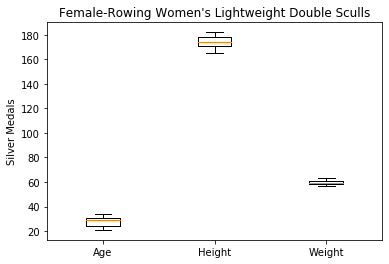

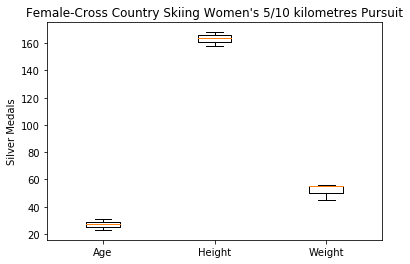

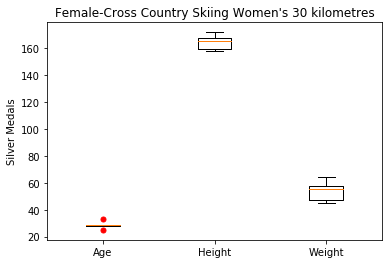

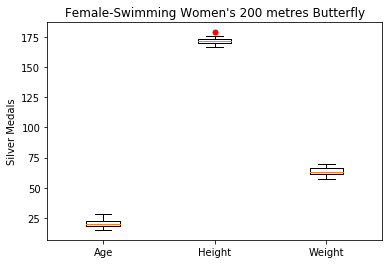

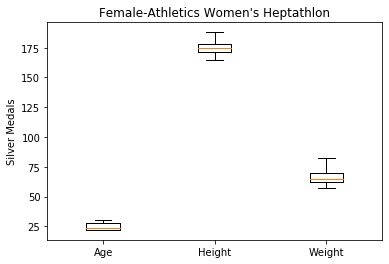

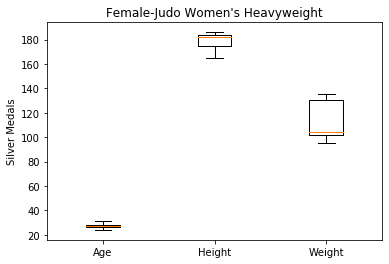

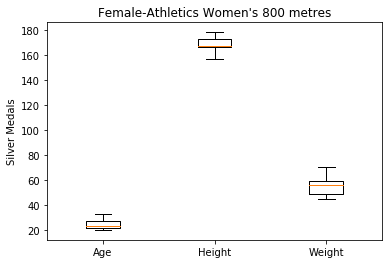

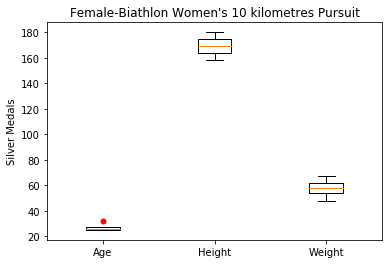

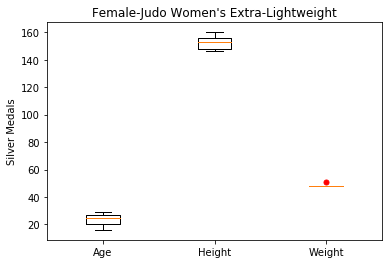

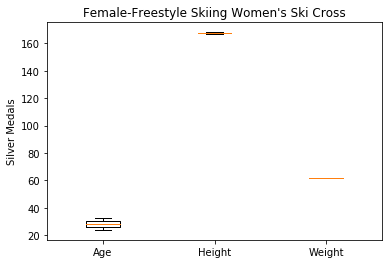

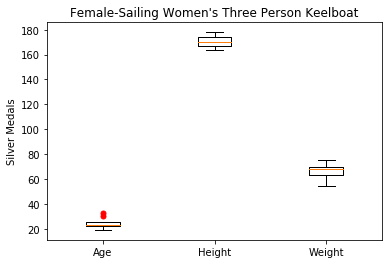

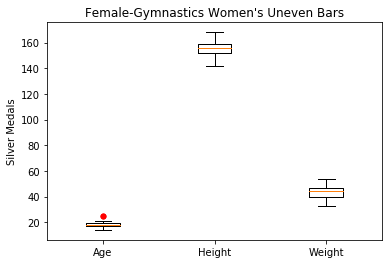

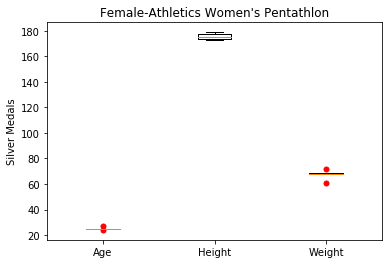

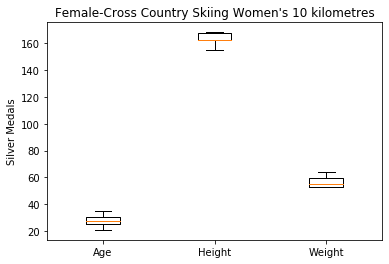

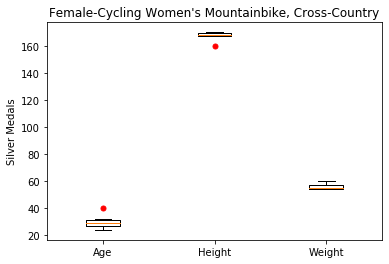

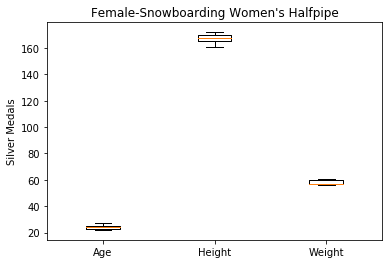

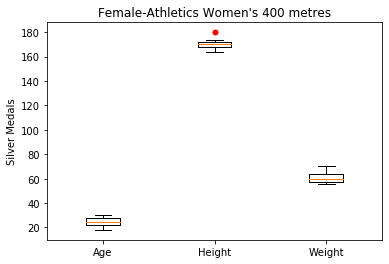

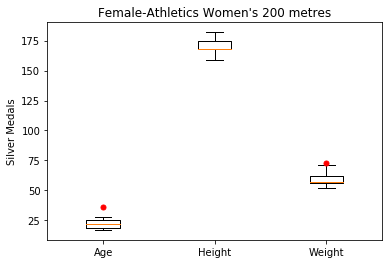

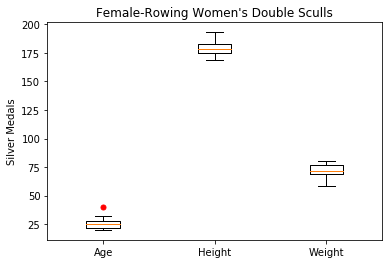

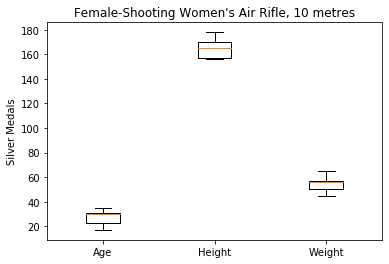

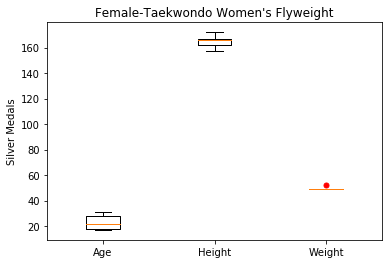

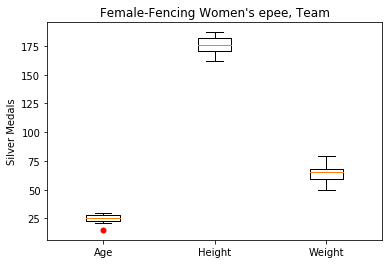

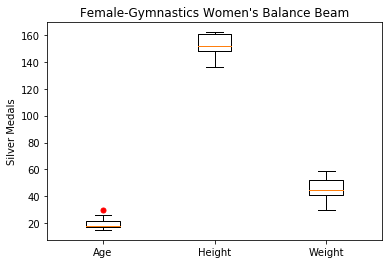

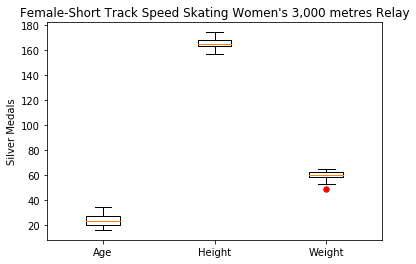

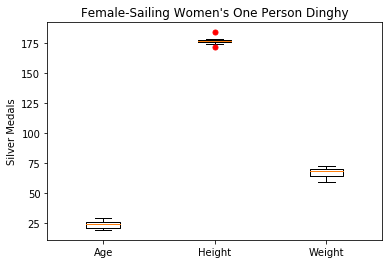

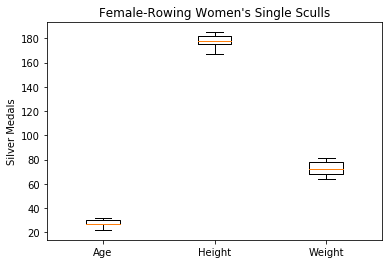

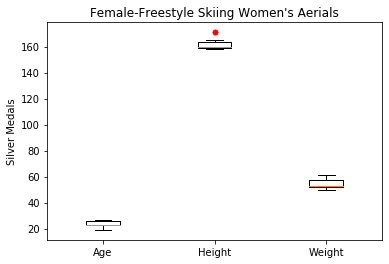

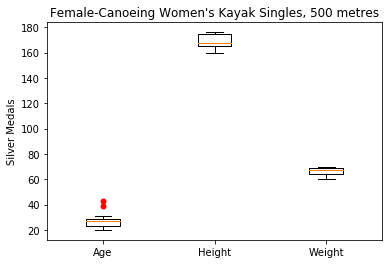

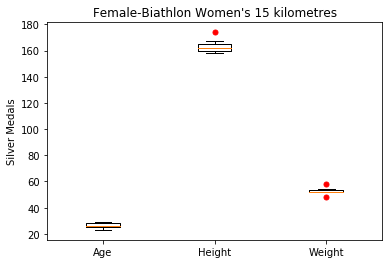

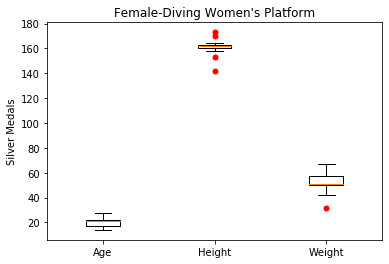

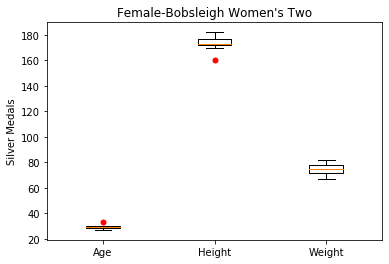

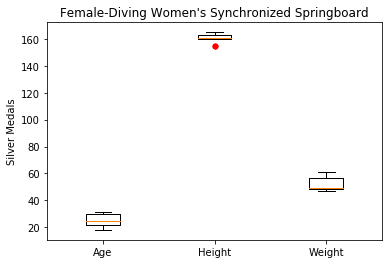

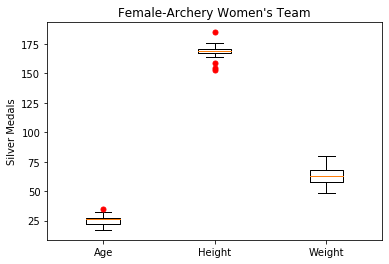

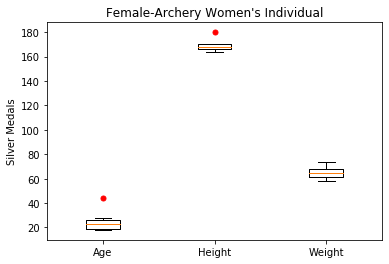

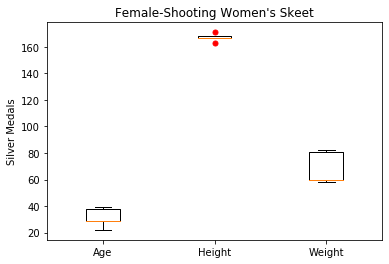

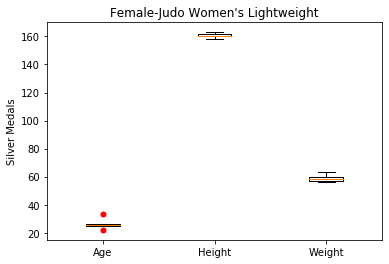

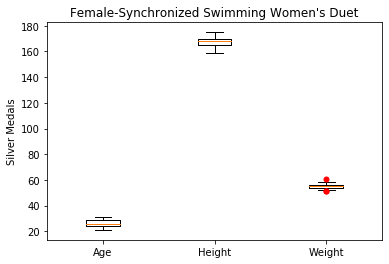

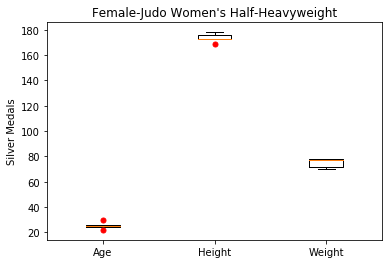

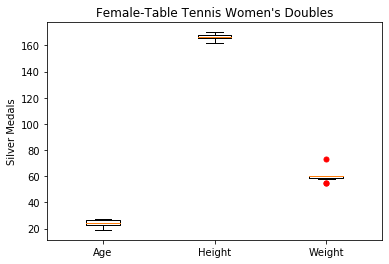

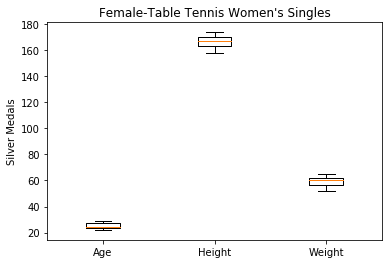

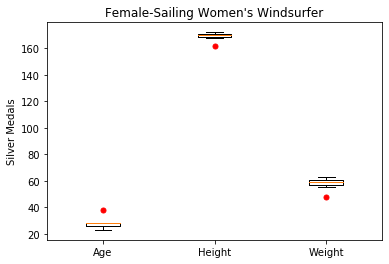

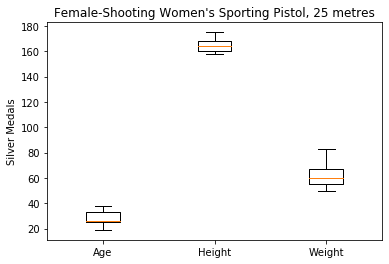

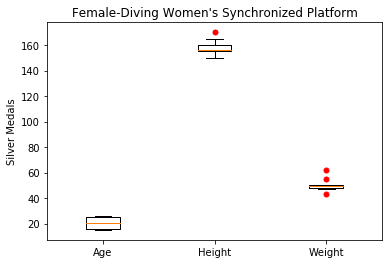

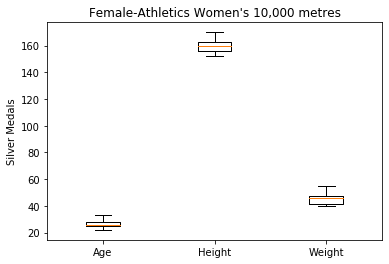

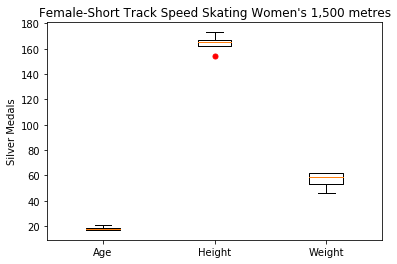

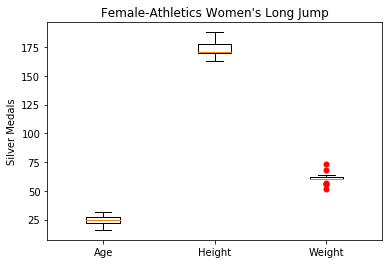

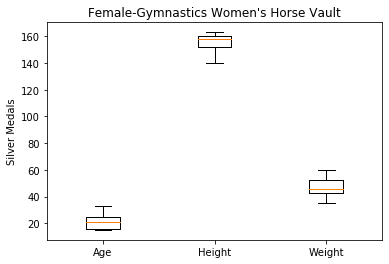

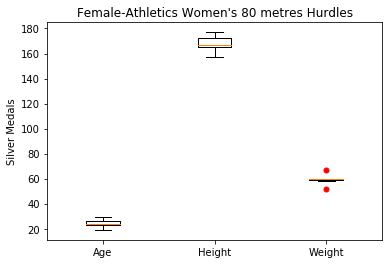

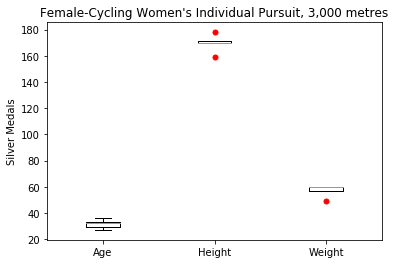

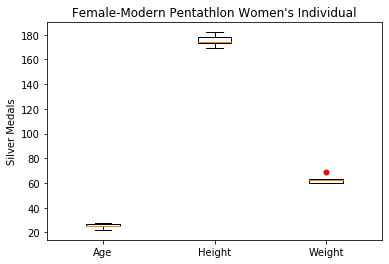

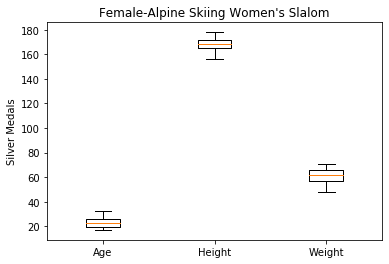

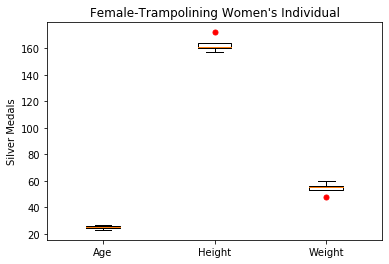

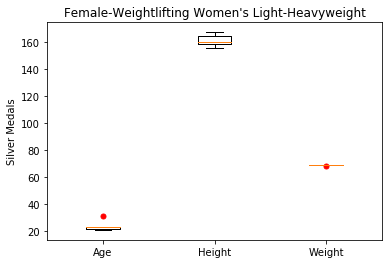

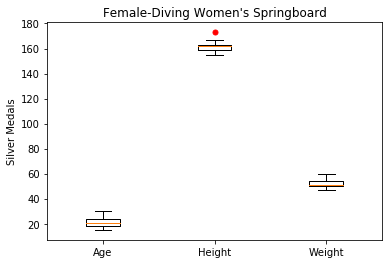

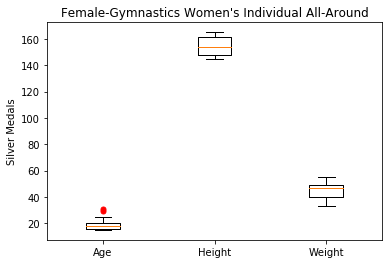

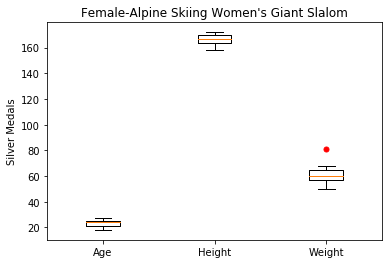

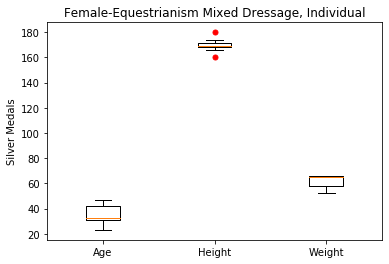

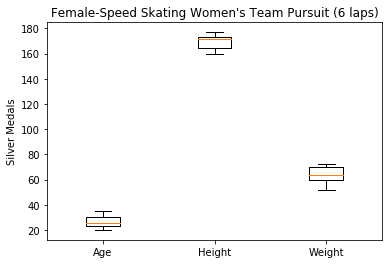

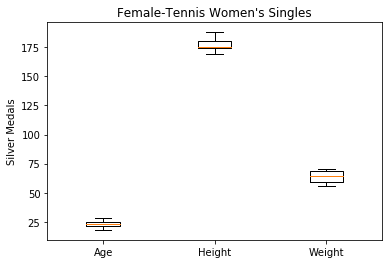

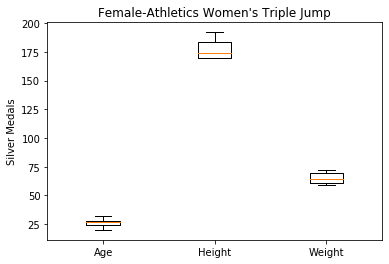

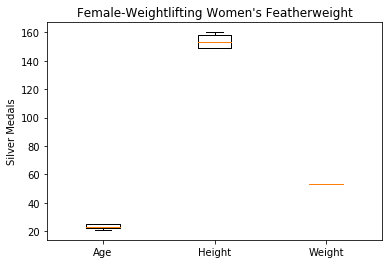

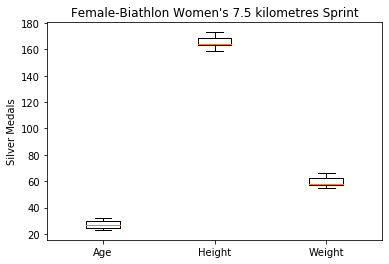

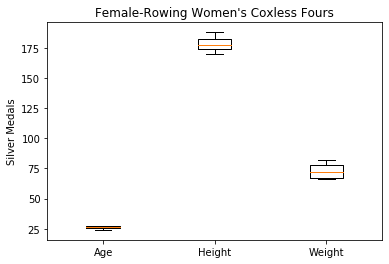

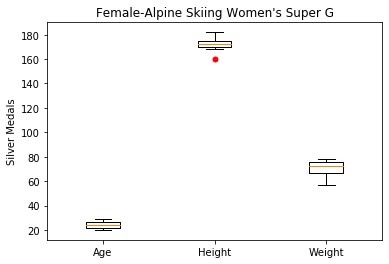

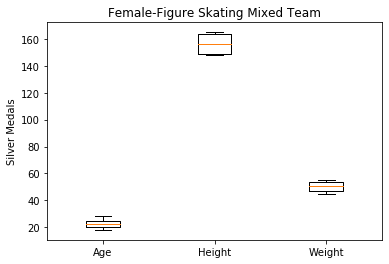

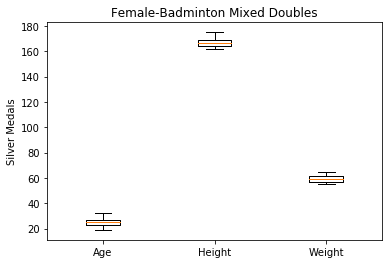

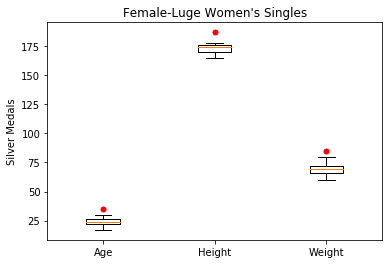

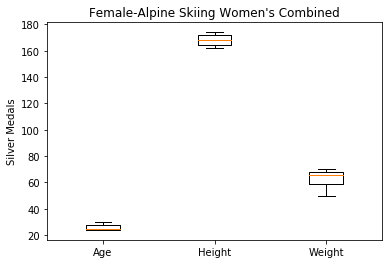

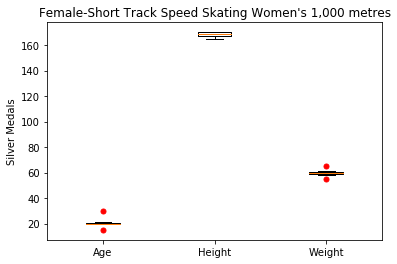

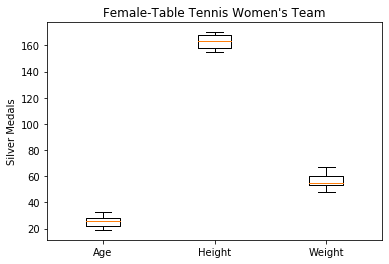

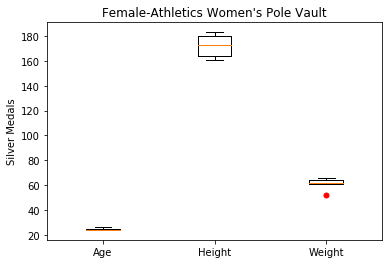

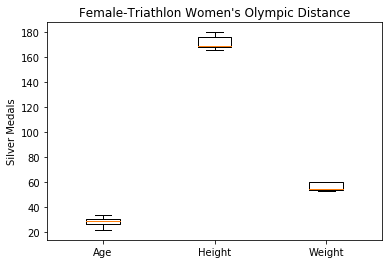

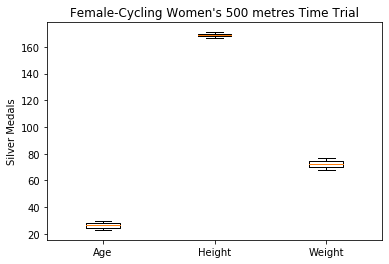

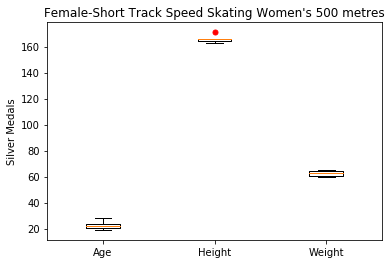

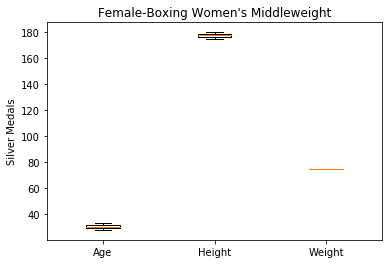

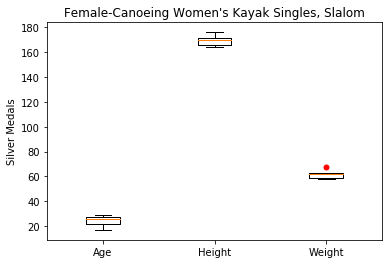

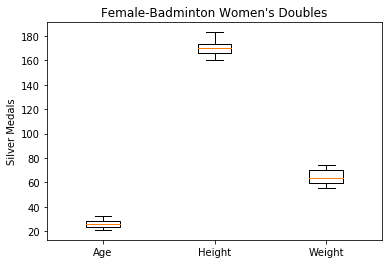

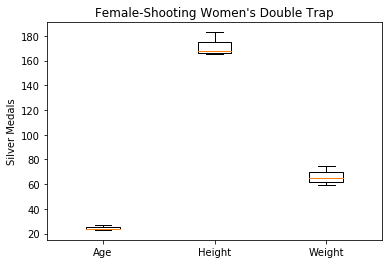

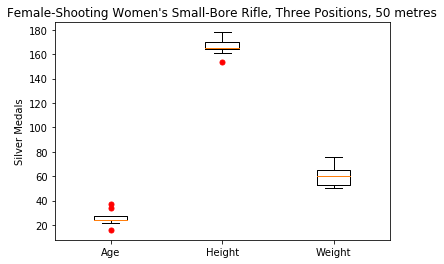

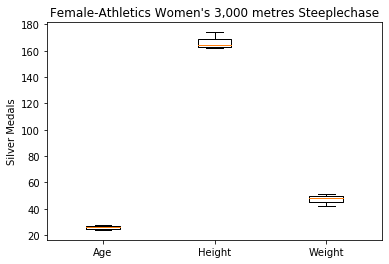

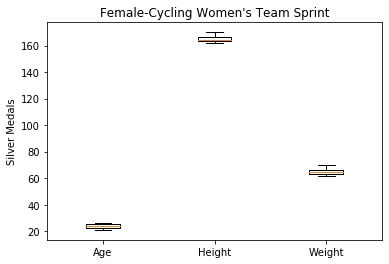

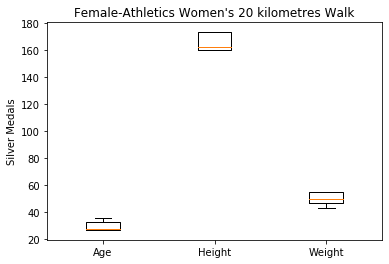

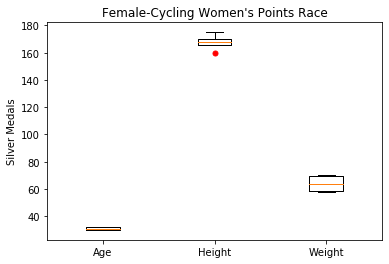

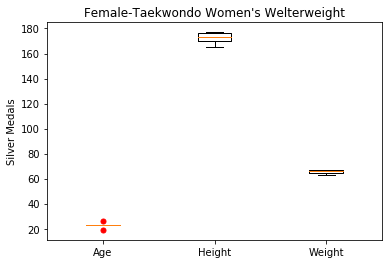

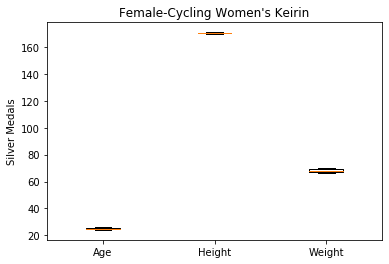

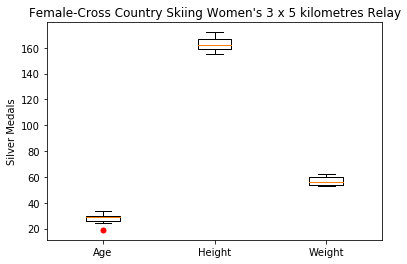

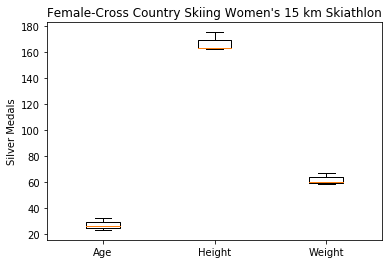

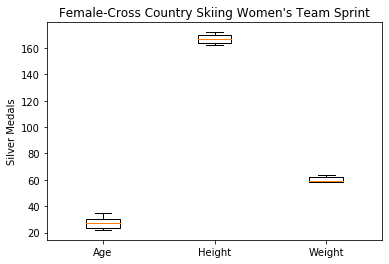

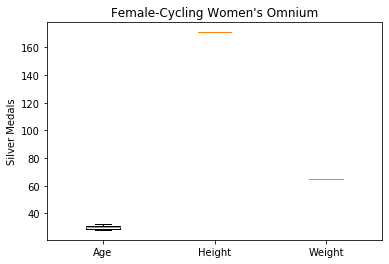

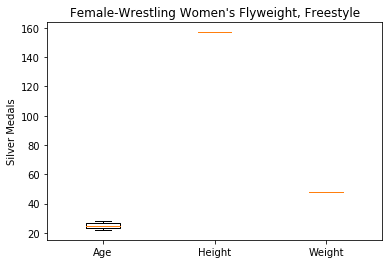

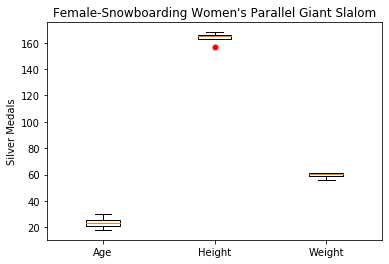

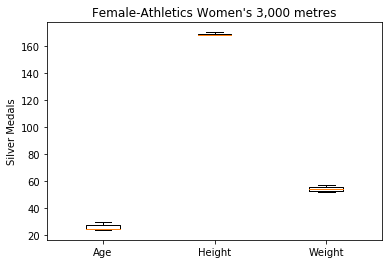

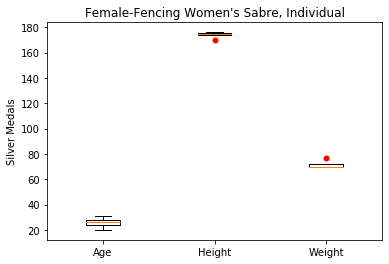

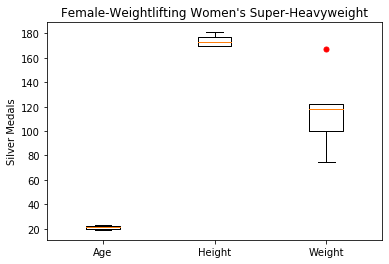

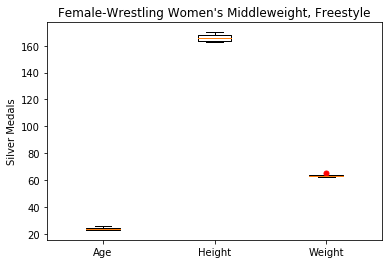

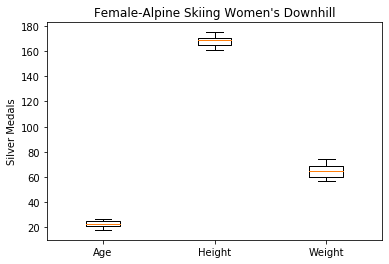

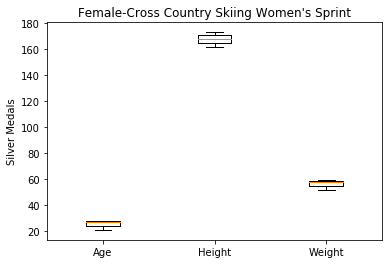

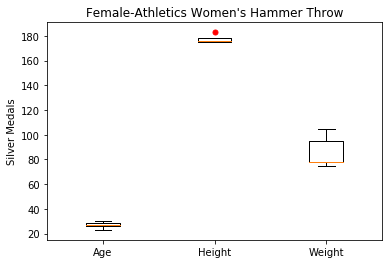

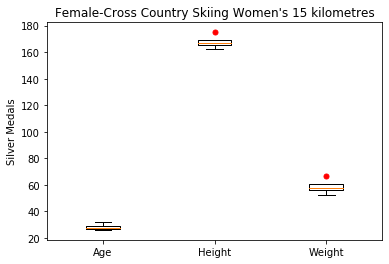

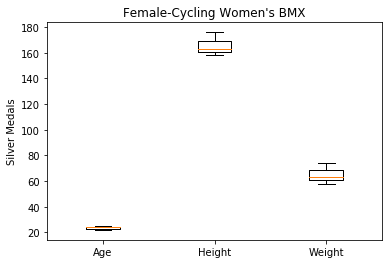

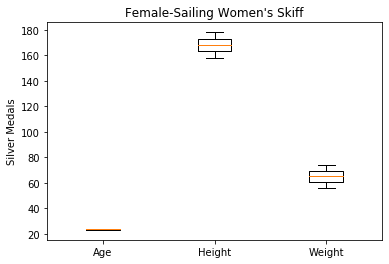

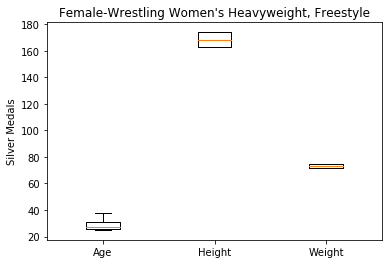

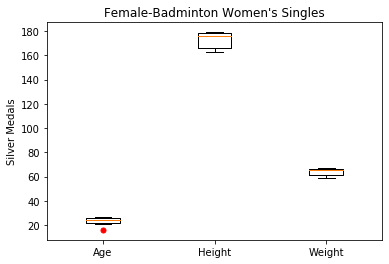

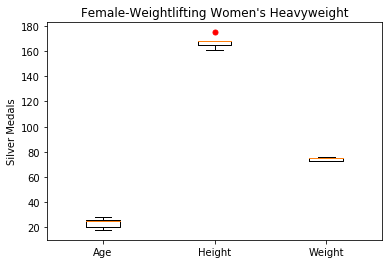

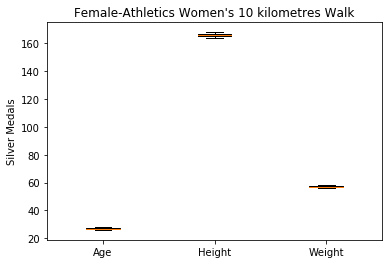

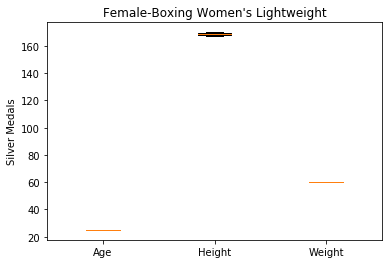

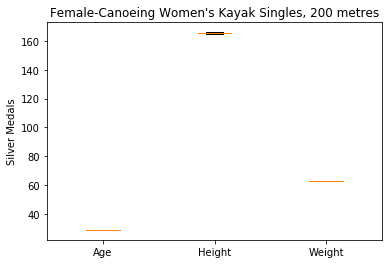

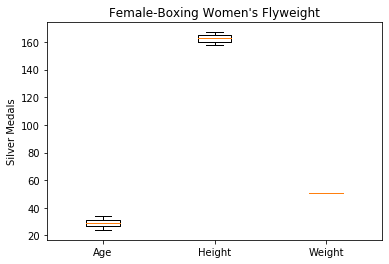

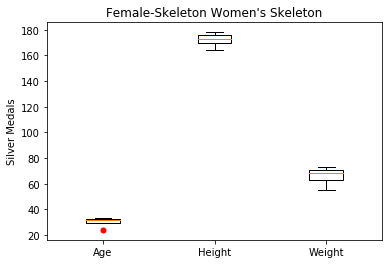

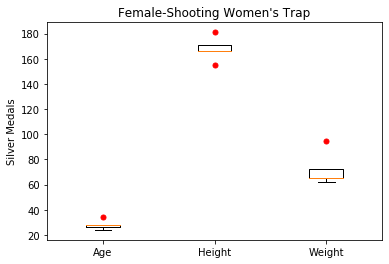

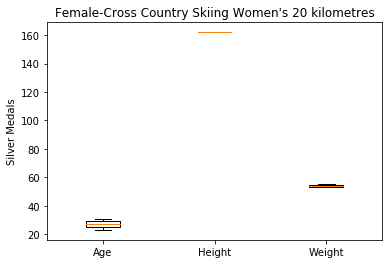

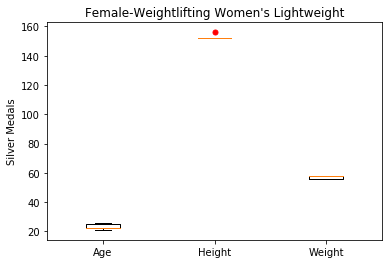

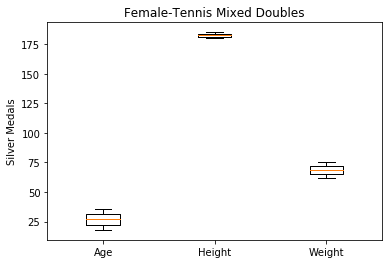

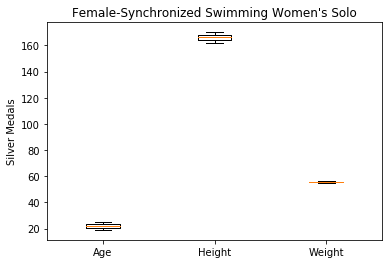

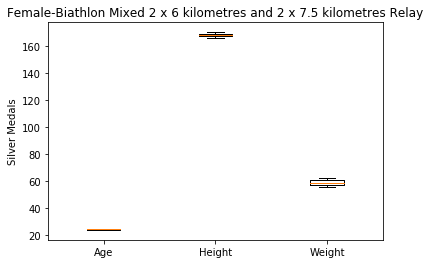

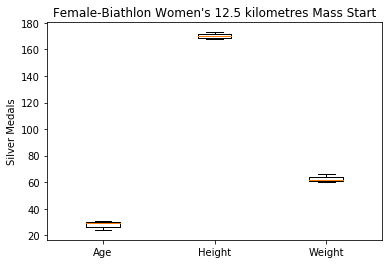

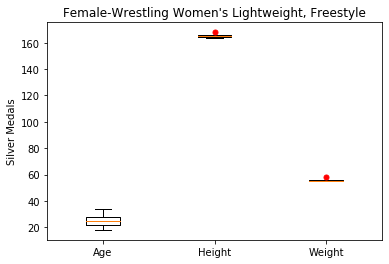

In [11]:
# Get unique name of event
event_list = female_sports_df.Event.unique()

# Create empty age, height, weight lists for storage
silver_age_list = []
silver_height_list = []
silver_weight_list = []

for event_name in event_list:
    # print(event_name)
    def event_function(event_name):
        
        # Filtering DataFrame for specific event name
        df = female_sports_df.loc[(female_sports_df['Event'] == event_name ),:]

        # Creating the Boxplot
        age_plot = df.loc[df['Event'] == event_name]['Age']
        height_plot = df.loc[df['Event'] == event_name]['Height']
        weight_plot = df.loc[df['Event'] == event_name]['Weight']

        outlier_markers = dict(marker = 'o' , markerfacecolor='r', 
                               markersize=5, markeredgecolor='r')
        plt.boxplot([age_plot, height_plot, weight_plot], 
                    labels=['Age', 'Height', 'Weight'], 
                    flierprops=outlier_markers)
        plt.ylabel('Silver Medals')
        plt.title(f'Female-{event_name}')

        #plt.savefig(f'Female-Sport-Events/Plots/Female-{event_name}.png')
        plt.show()

        # Calculate the quartiles
        age_quartiles = age_plot.quantile([.25,.5,.75])
        height_quartiles = height_plot.quantile([.25,.5,.75])
        weight_quartiles = weight_plot.quantile([.25,.5,.75])
        
        # Creating age list
        age = round(age_quartiles[0.5])
        silver_age_list.append(age)
        
        # Creating height list
        height = (height_quartiles[0.5])/30.48
        silver_height_list.append("%.2f"%height)
        
        # Creating weight list
        weight = (weight_quartiles[0.5])*2.205
        silver_weight_list.append("%.2f"%weight)
        
    event_function(event_name)
# print(f'Silver Age List: {silver_age_list}')
# print(f'Silver Height List: {silver_height_list}')
# print(f'Silver Weight List: {silver_weight_list}')

In [12]:
# Finding out length of each list 
print(len(silver_age_list))
print(len(silver_height_list))
print(len(silver_weight_list))
print(len(event_list))

204
204
204
204


In [13]:
# Storing values from list to make a DataFrame
silver_dictionary = {"Event":event_list,"Age":silver_age_list, "Height": silver_height_list, 
                    "Weight":silver_weight_list, "Female": "Female"  }

silver_bodycomp_age_df = pd.DataFrame(silver_dictionary)
silver_bodycomp_age_df.head()

Event   Age Height  Weight  Female
0     Athletics Women's Javelin Throw  26.0   5.59  152.15  Female
1              Cycling Women's Sprint  24.0   5.41  137.81  Female
2           Softball Women's Softball  26.0   5.58  145.53  Female
3     Taekwondo Women's Featherweight  24.0   5.74  125.69  Female
4  Gymnastics Women's Team All-Around  18.0   5.12  100.33  Female

In [14]:
# Saving Dataframe into a csv file
silver_bodycomp_age_df.to_csv('Female-Events/female_silver_bodycomp_age.csv', index=False)


In [15]:
# Saving Dataframe into a JSON file
silver_bodycomp_age_df.to_json('Female-Events/female_silver_bodycomp_age.json')



# Bronze

In [16]:
# Load data
female_sports_df = pd.read_csv('Female-Sports/female_athletes_bronze.csv')
female_sports_df.head()


NOC                                Name Sex   Age  Height  Weight  Season  \
0  NOR                  Ann Kristin Aarnes   F  23.0   182.0    64.0  Summer   
1  AZE                   Patimat Abakarova   F  21.0   165.0    49.0  Summer   
2  CAN                          Reema Abdo   F  21.0   173.0    59.0  Summer   
3  CAN                       Jennifer Abel   F  20.0   160.0    62.0  Summer   
4  RUS  Yekaterina Konstantinovna Abramova   F  23.0   167.0    65.0  Winter   

   Year          Sport                                         Event   Medal  
0  1996       Football                     Football Women's Football  Bronze  
1  2016      Taekwondo                   Taekwondo Women's Flyweight  Bronze  
2  1984       Swimming  Swimming Women's 4 x 100 metres Medley Relay  Bronze  
3  2012         Diving       Diving Women's Synchronized Springboard  Bronze  
4  2006  Speed Skating   Speed Skating Women's Team Pursuit (6 laps)  Bronze

In [17]:
# Dropping every row with 1 Olympian only

female_sports_df = female_sports_df[(female_sports_df.Event != "Snowboarding Women's Slopestyle") & 
                                    (female_sports_df.Event != "Freestyle Skiing Women's Halfpipe") &
                                    (female_sports_df.Event != "Sailing Mixed Multihull") &
                                    (female_sports_df.Event != "Wrestling Women's Light-Heavyweight, Freestyle") &
                                    (female_sports_df.Event != "Snowboarding Women's Parallel Slalom") &
                                    (female_sports_df.Event != "Luge Mixed Team Relay") &
                                    (female_sports_df.Event != "Freestyle Skiing Women's Slopestyle") &
                                    (female_sports_df.Event != "Wrestling Women's Featherweight, Freestyle") &
                                    (female_sports_df.Event != "Golf Women's Individual") &
                                    (female_sports_df.Event != "Snowboarding Women's Giant Slalom") &
                                    (female_sports_df.Event != "Cross Country Skiing Women's 5/5 kilometres Pursuit") &
                                    (female_sports_df.Event != "Gymnastics Women's Team Portable Apparatus") &
                                    (female_sports_df.Event != "Ski Jumping Women's Normal Hill, Individual") &
                                    (female_sports_df.Event != "Shooting Mixed Skeet") &
                                    (female_sports_df.Event != "Shooting Mixed Small-Bore Rifle, Three Positions, 50 metres") &
                                    (female_sports_df.Event != "Equestrianism Mixed Jumping, Individual") &
                                    (female_sports_df.Event != "Equestrianism Mixed Three-Day Event, Individual")
                                   ]
# female_sports_df.head()

# "Snowboarding Women's Slopestyle": 2014 Winter
# "Freestyle Skiing Women's Halfpipe": 2014 Winter
# "Sailing Mixed Multihull": 2016 Summer
# "Wrestling Women's Light-Heavyweight, Freestyle": 2016 Summer
# "Snowboarding Women's Parallel Slalom": 2014 Winter
# "Luge Mixed Team Relay": 2014 Winter
# "Freestyle Skiing Women's Slopestyle": 2014 Winter
# "Wrestling Women's Featherweight, Freestyle": 2016 Summer
# "Golf Women's Individual": 2016 Summer
# "Snowboarding Women's Giant Slalom": 1998 Winter
# Cross Country Skiing Women's 5/5 kilometres Pursuit: 2002 Winter
# Gymnastics Women's Team Portable Apparatus: 1956 Summer
# Ski Jumping Women's Normal Hill, Individual: 2014 Winter
# Shooting Mixed Skeet: 1992 Summer
# "Shooting Mixed Small-Bore Rifle, Three Positions, 50 metres": 1976 Summer
# "Equestrianism Mixed Jumping, Individual": Not in Gold
# "Equestrianism Mixed Three-Day Event, Individual": Not in Gold



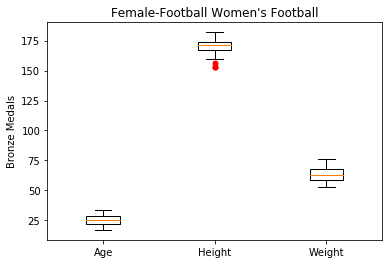

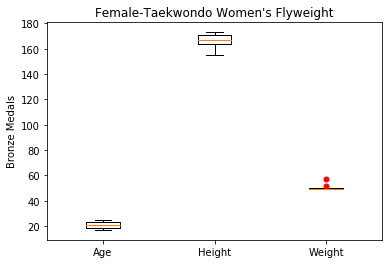

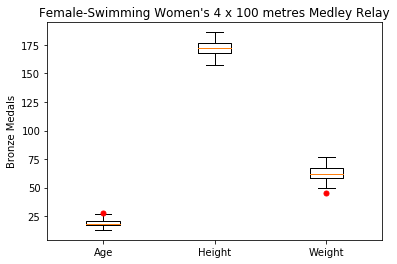

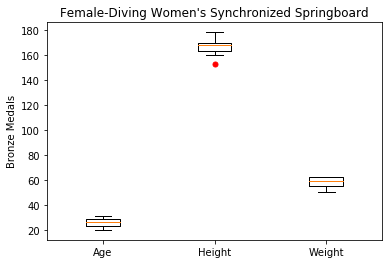

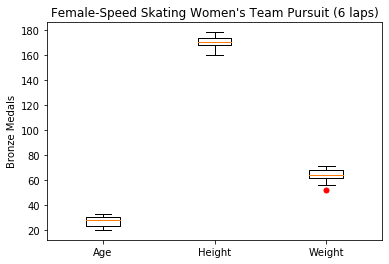

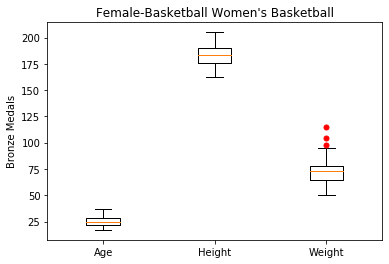

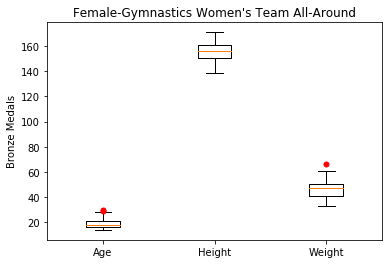

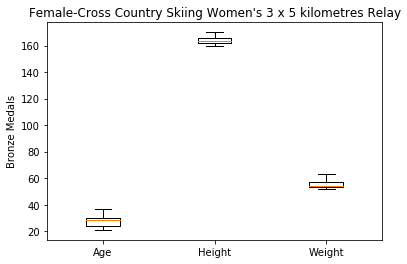

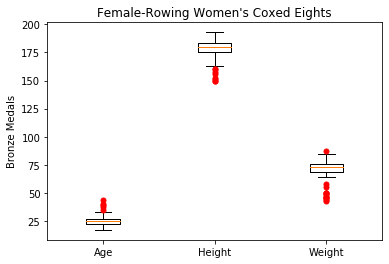

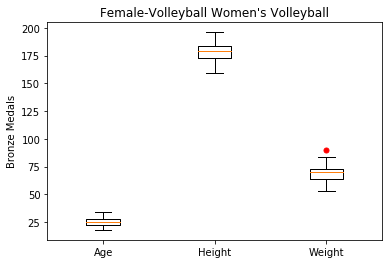

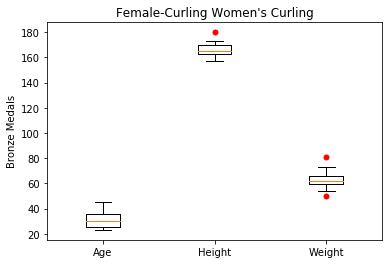

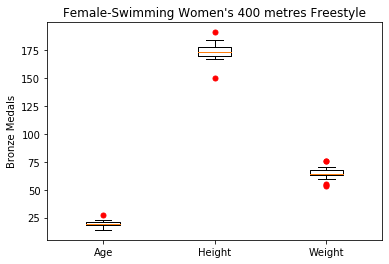

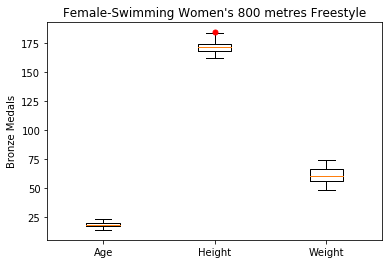

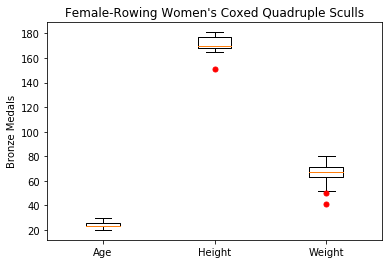

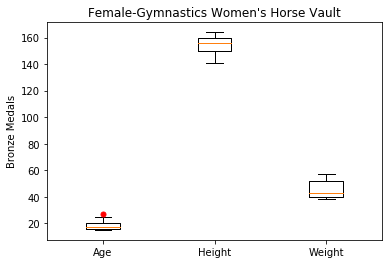

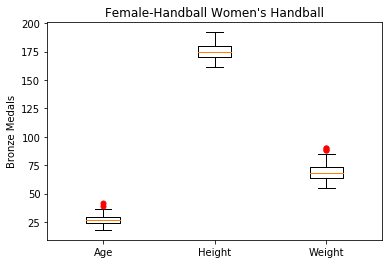

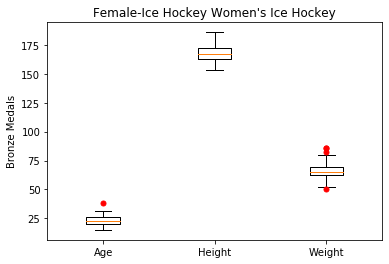

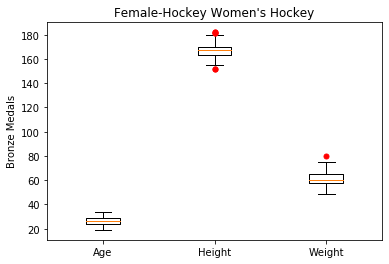

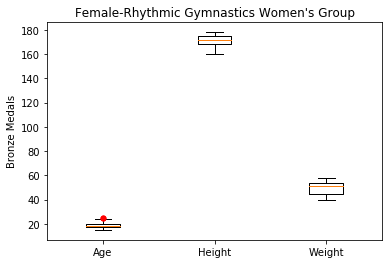

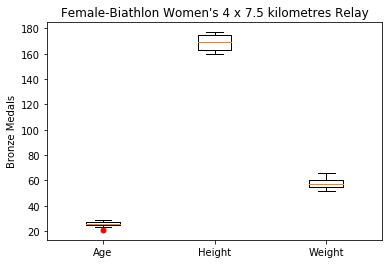

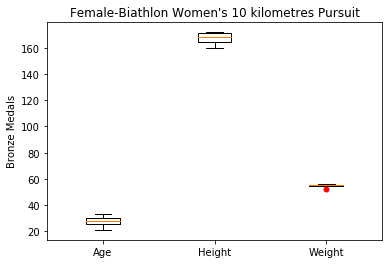

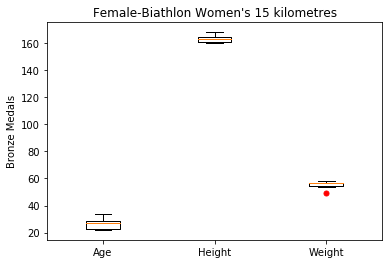

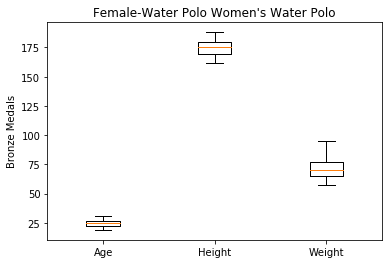

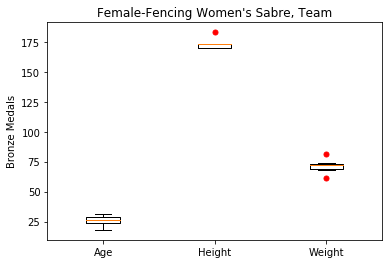

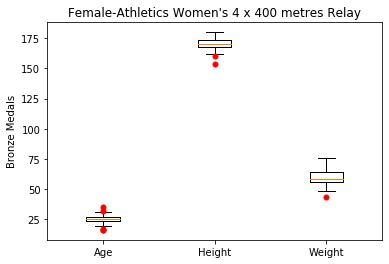

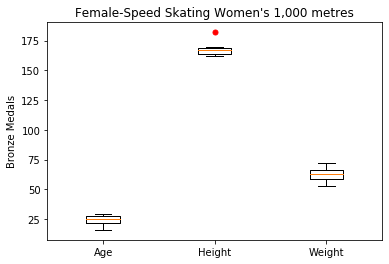

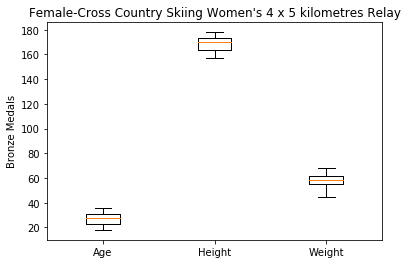

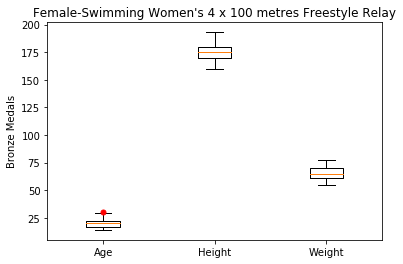

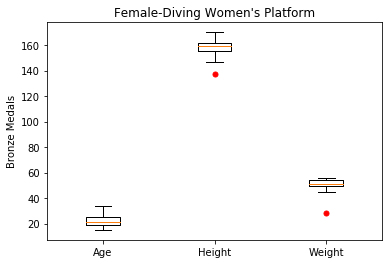

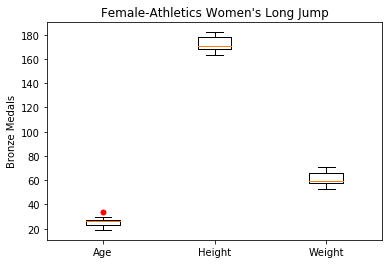

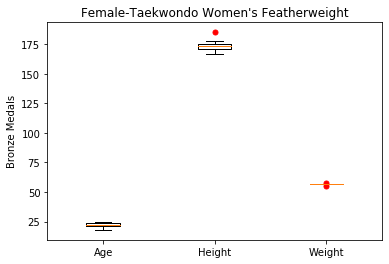

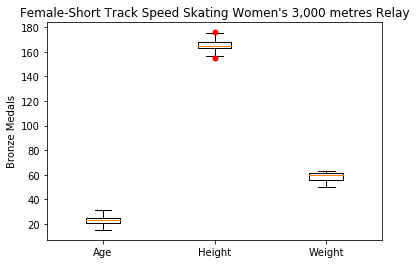

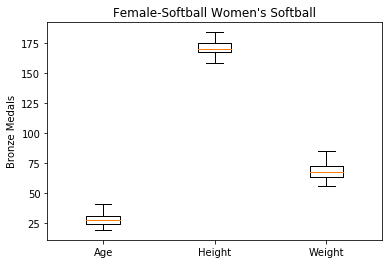

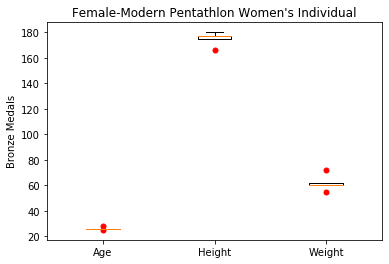

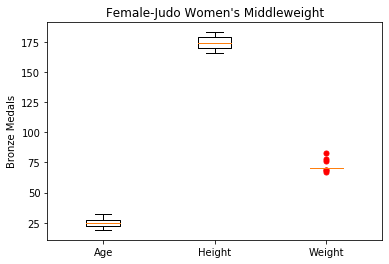

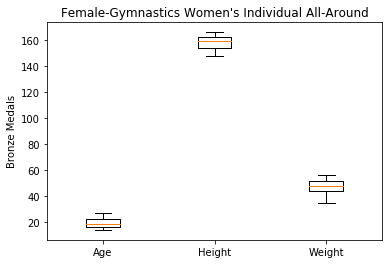

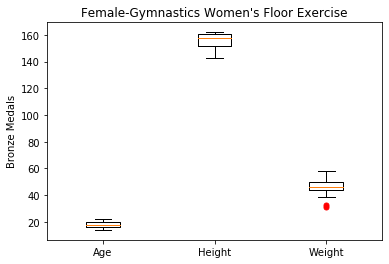

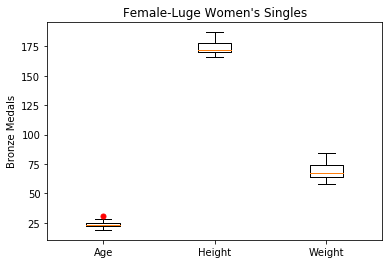

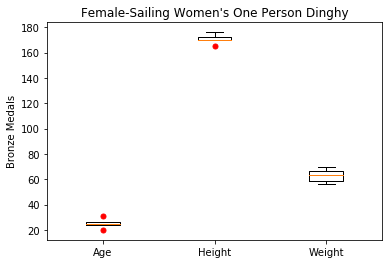

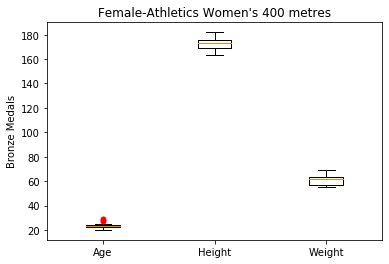

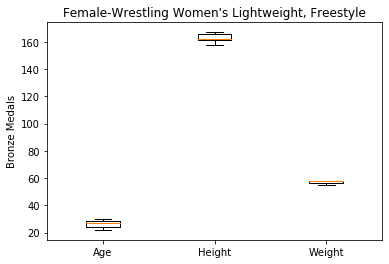

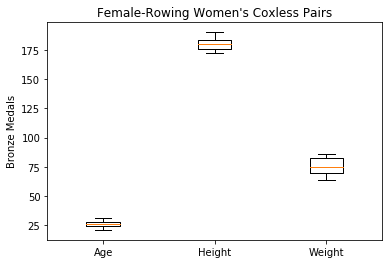

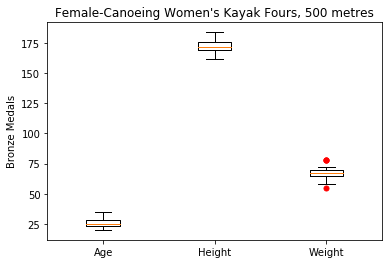

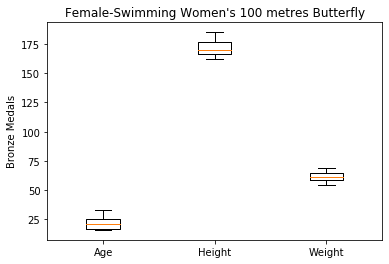

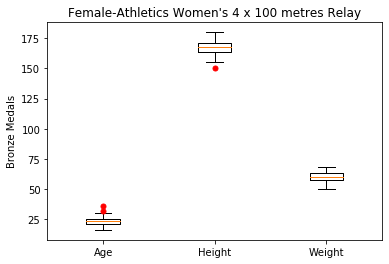

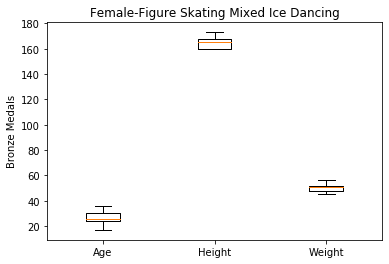

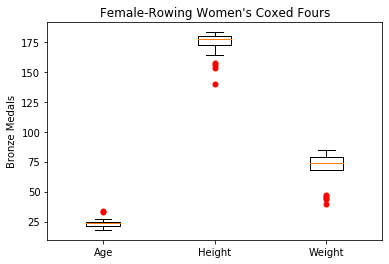

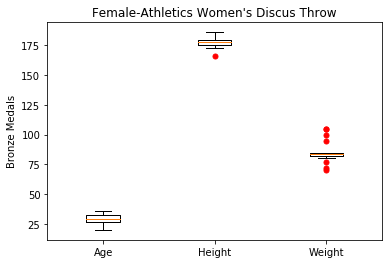

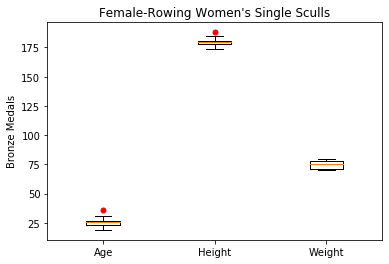

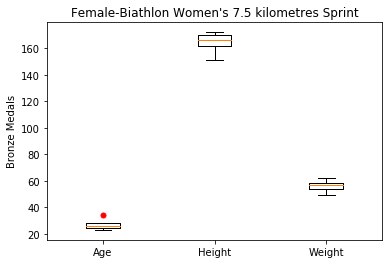

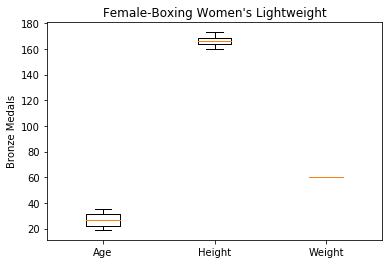

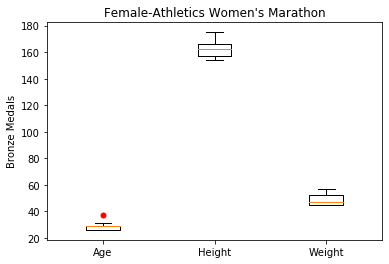

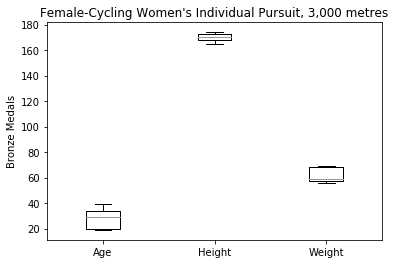

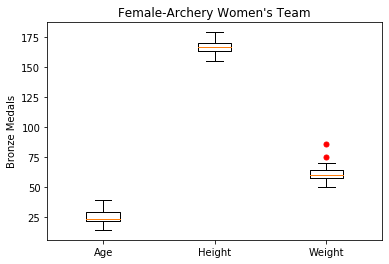

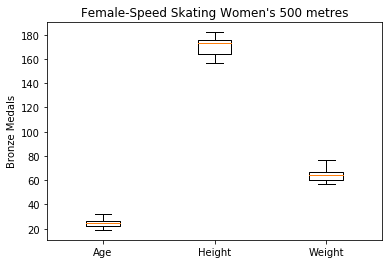

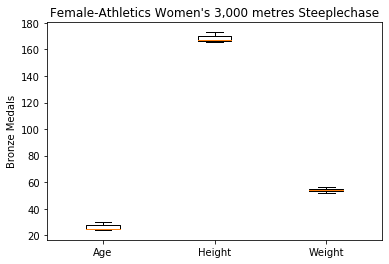

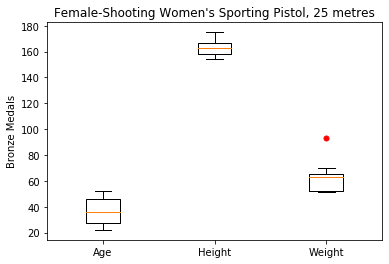

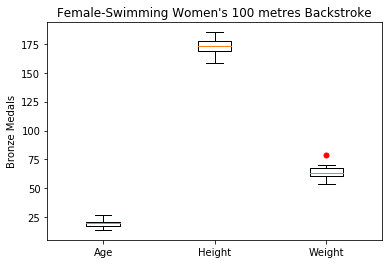

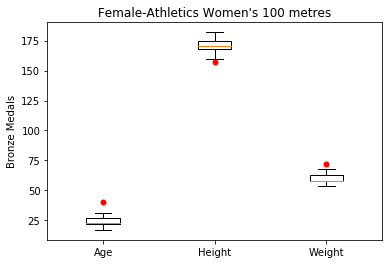

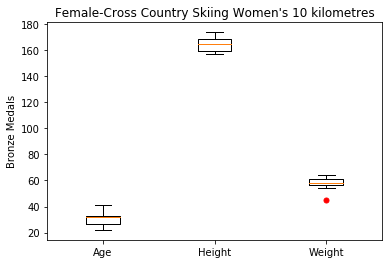

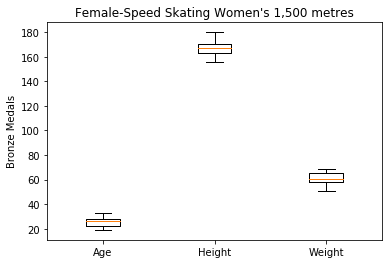

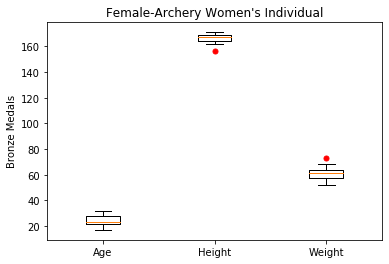

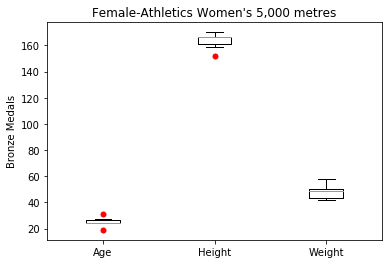

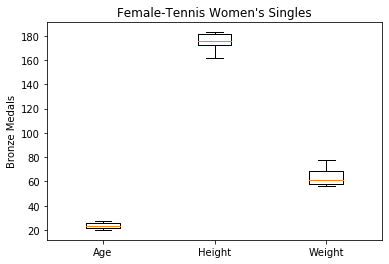

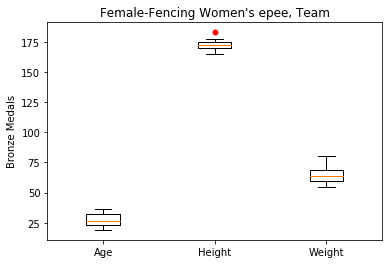

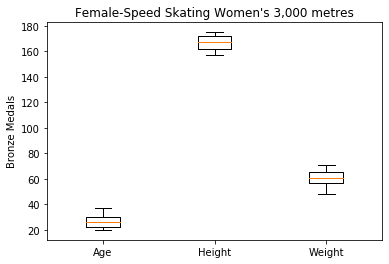

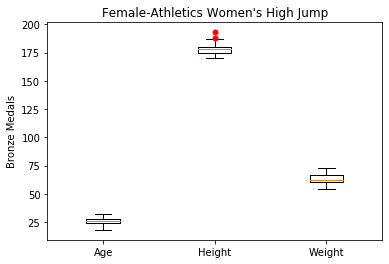

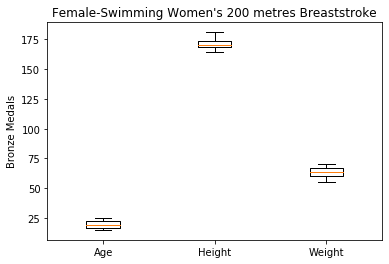

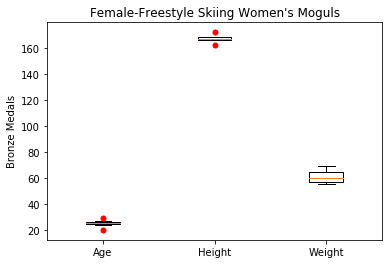

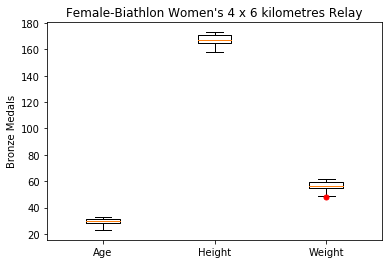

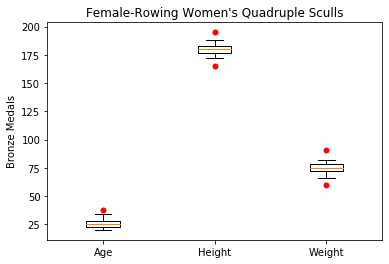

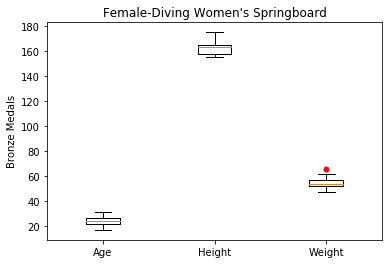

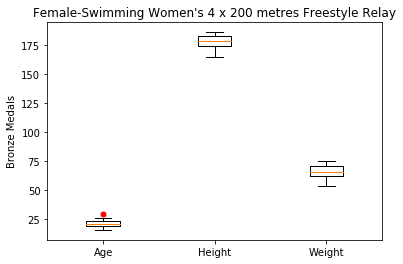

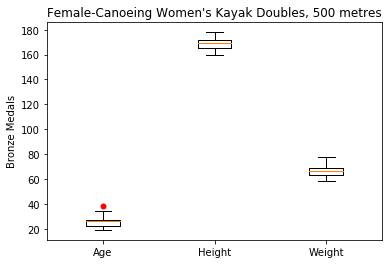

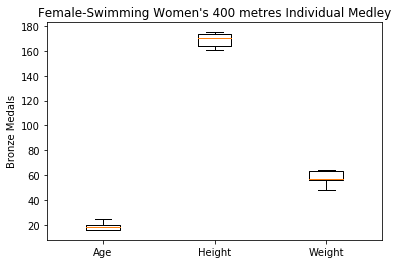

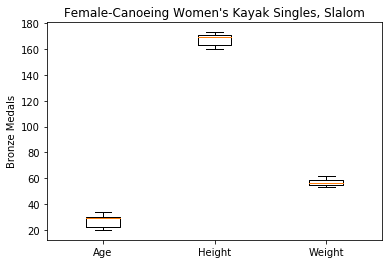

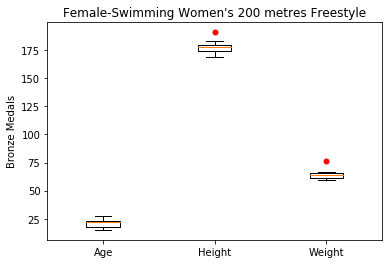

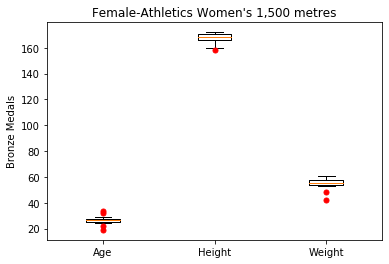

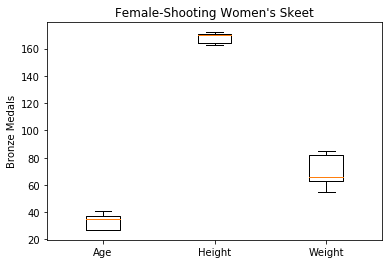

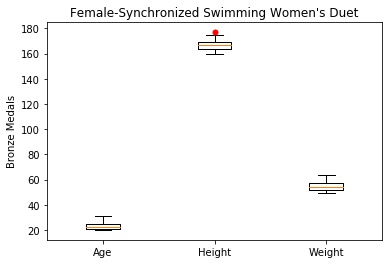

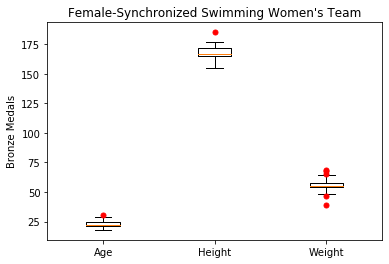

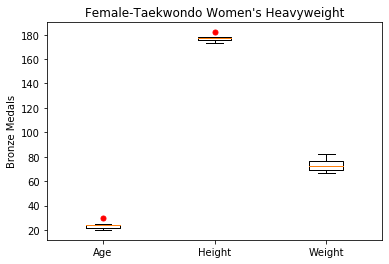

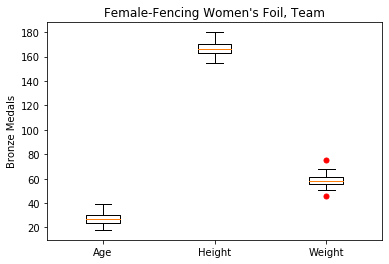

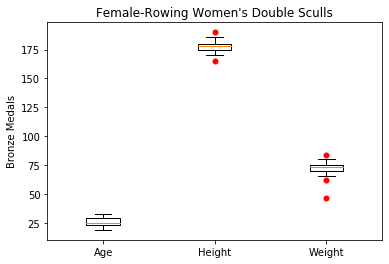

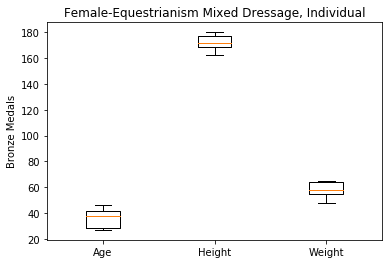

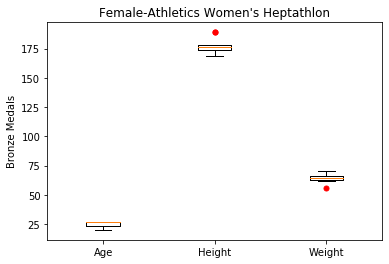

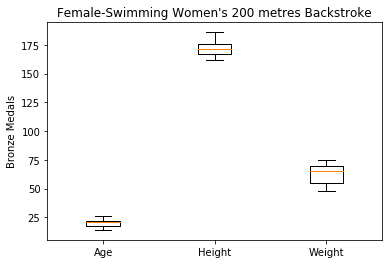

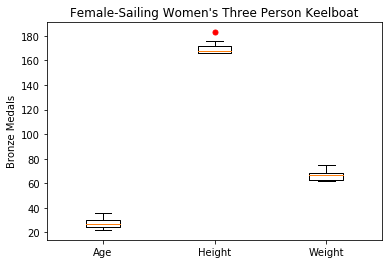

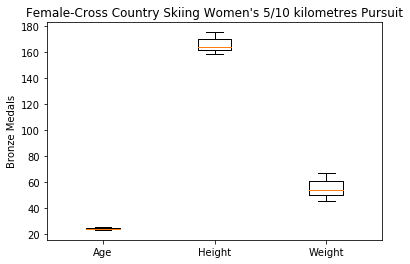

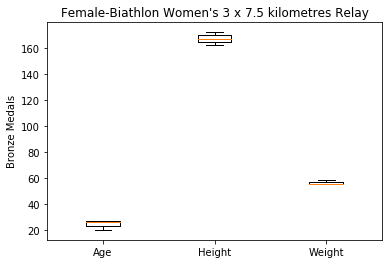

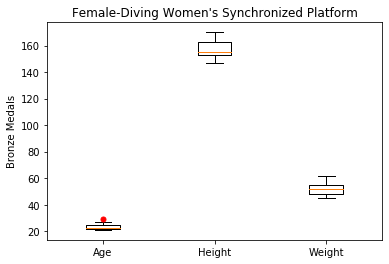

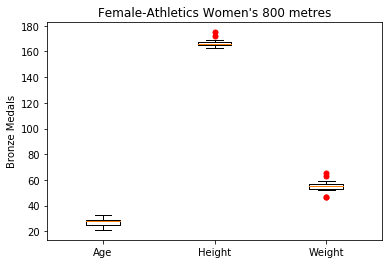

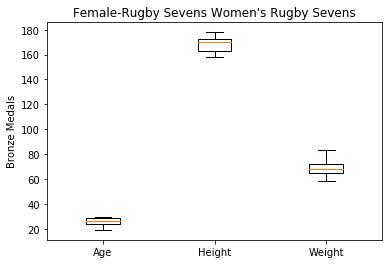

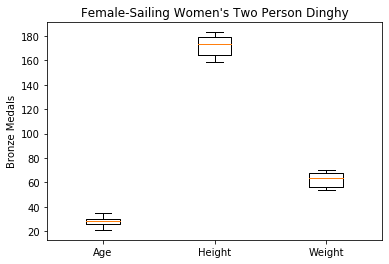

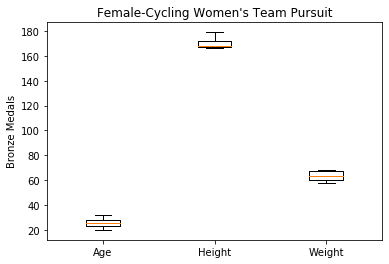

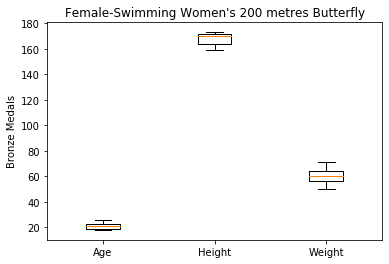

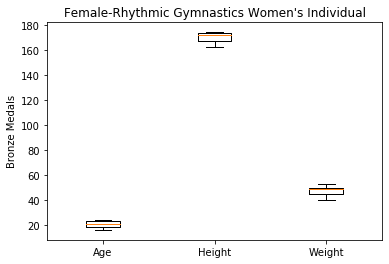

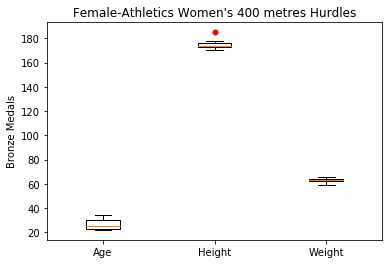

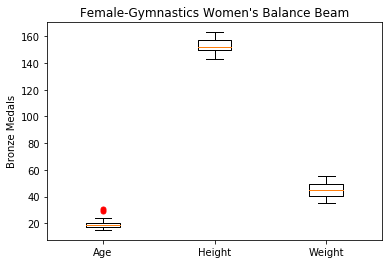

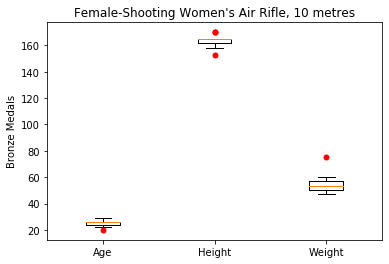

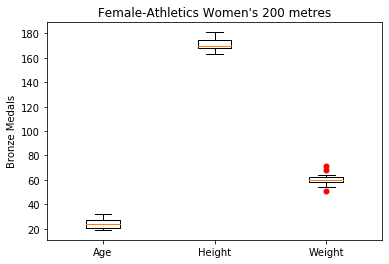

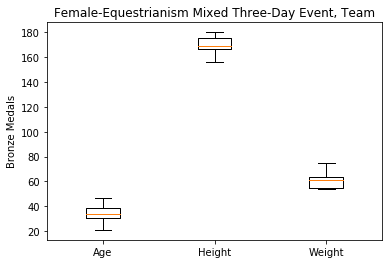

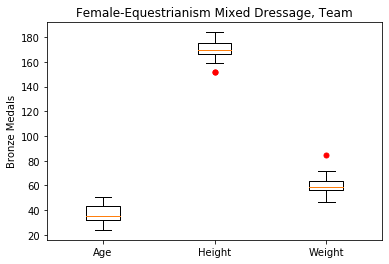

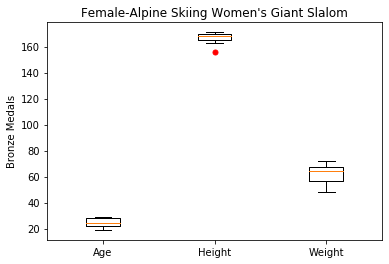

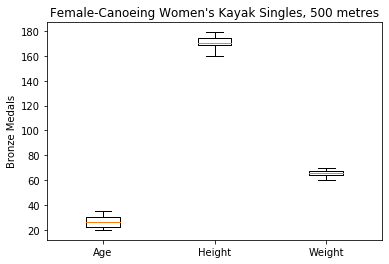

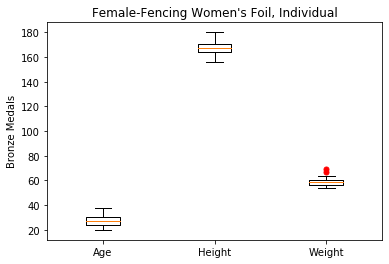

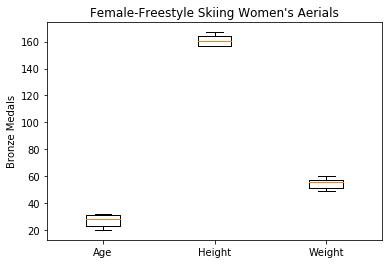

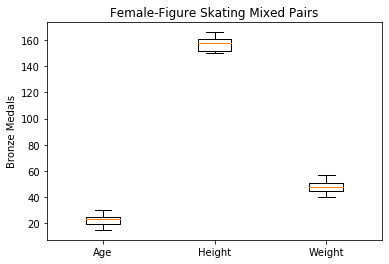

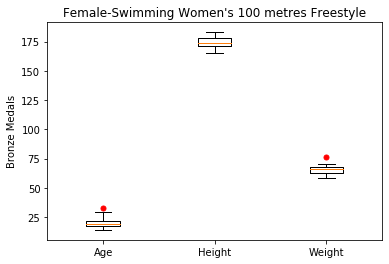

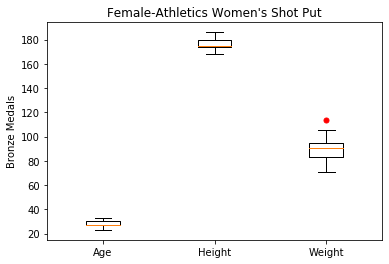

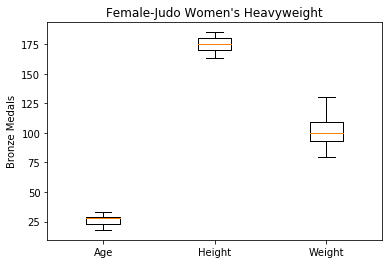

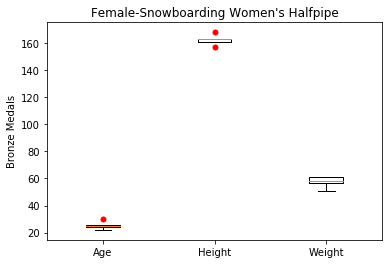

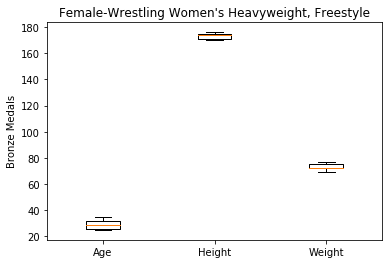

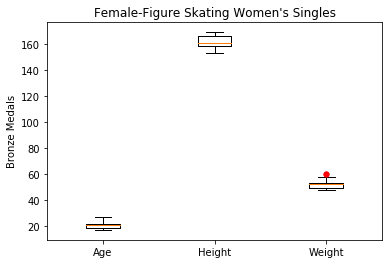

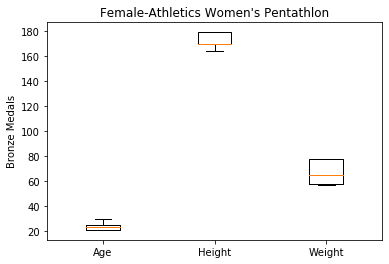

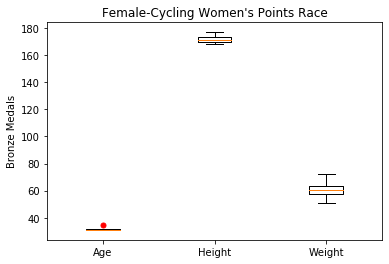

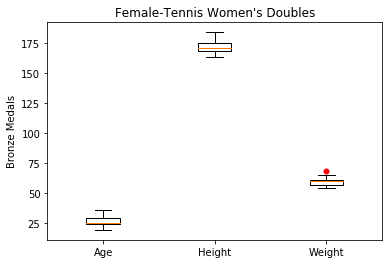

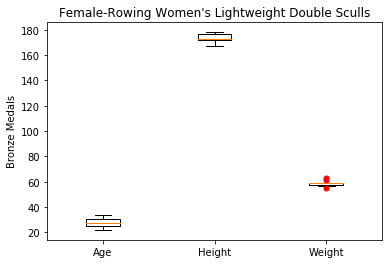

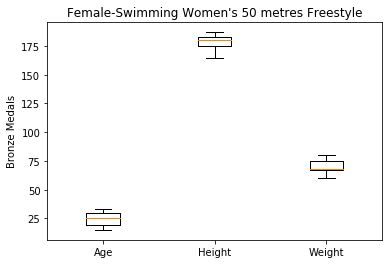

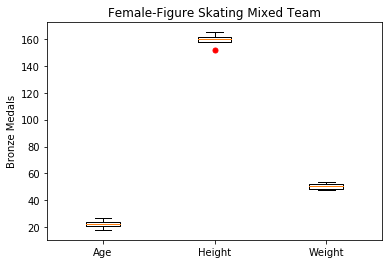

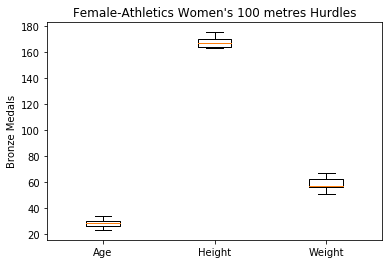

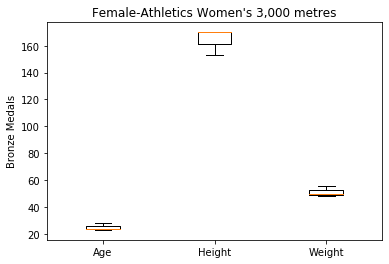

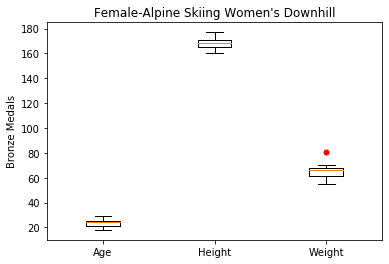

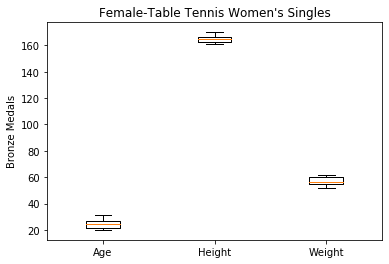

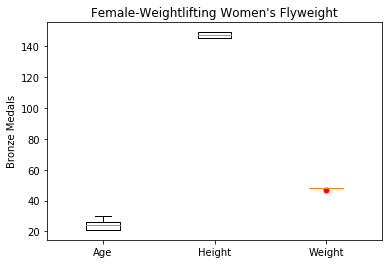

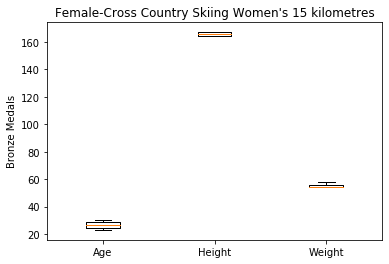

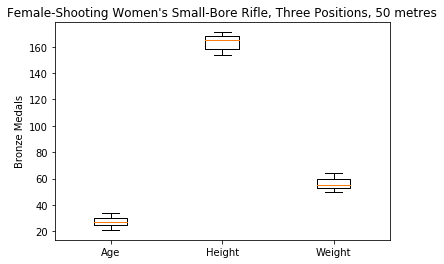

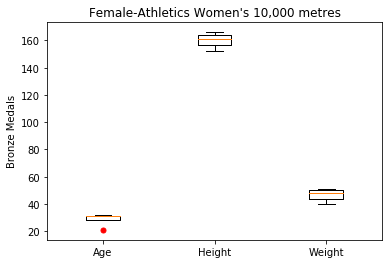

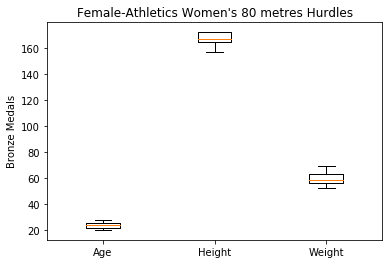

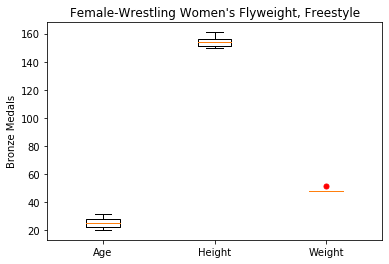

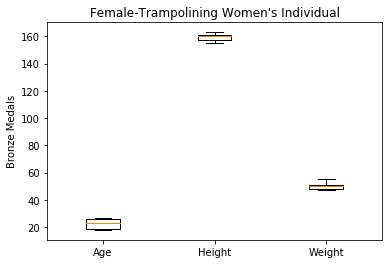

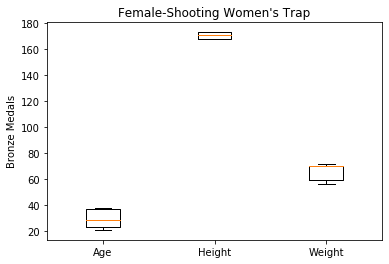

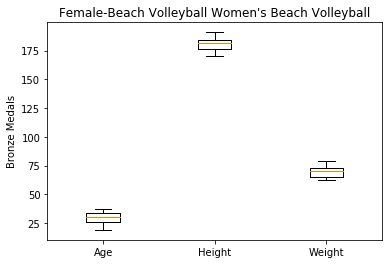

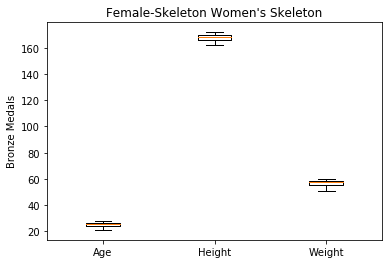

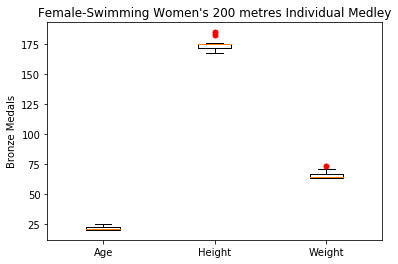

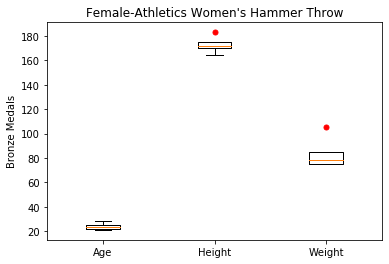

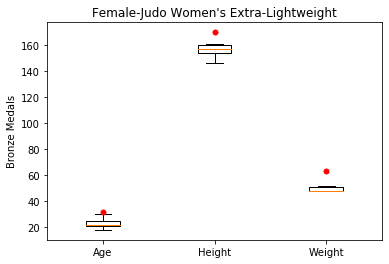

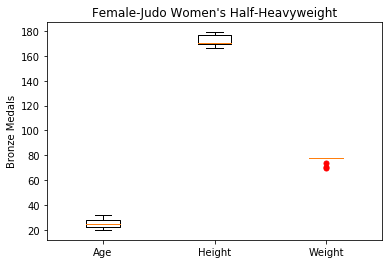

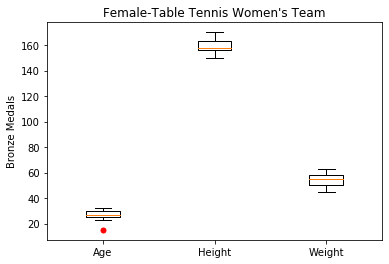

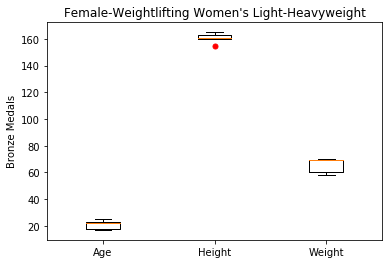

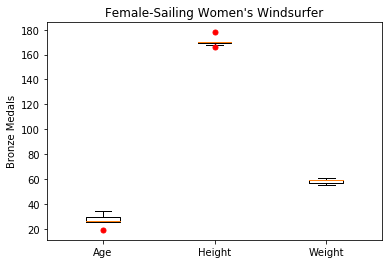

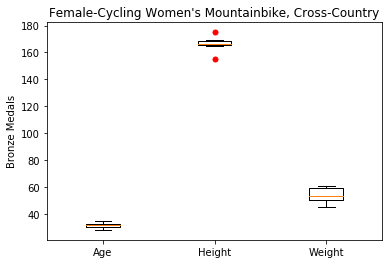

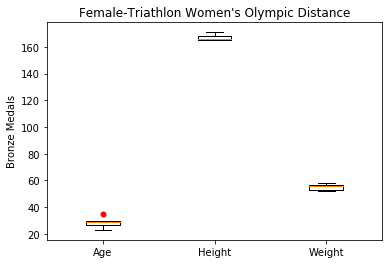

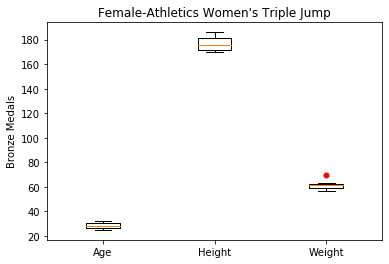

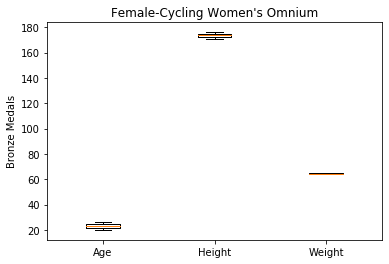

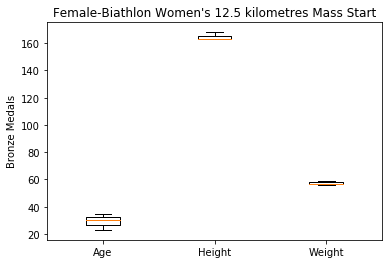

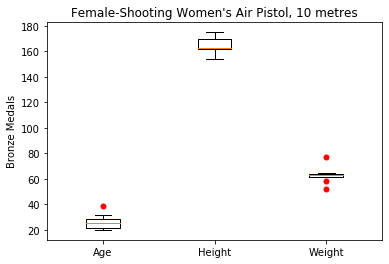

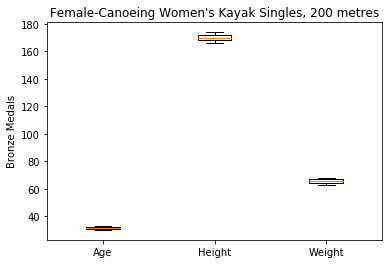

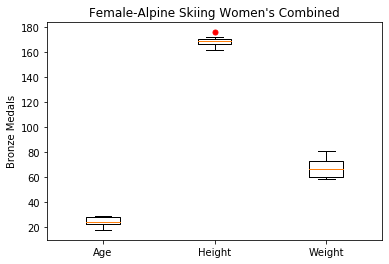

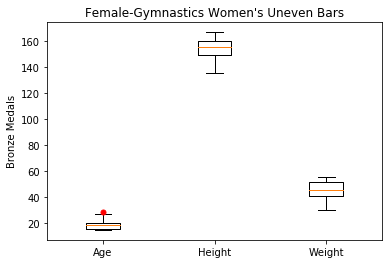

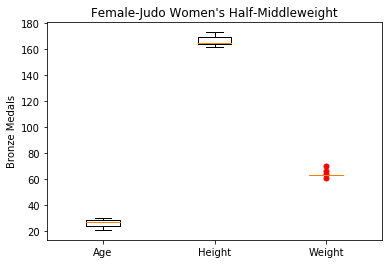

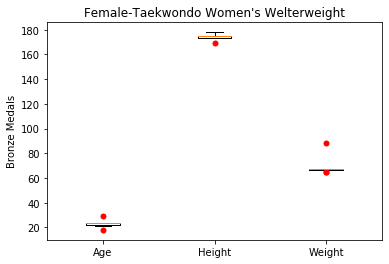

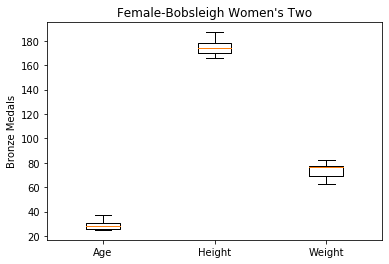

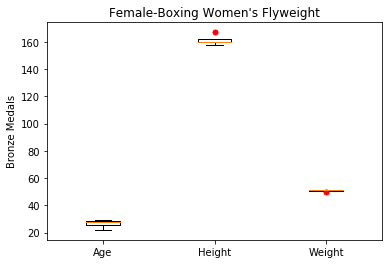

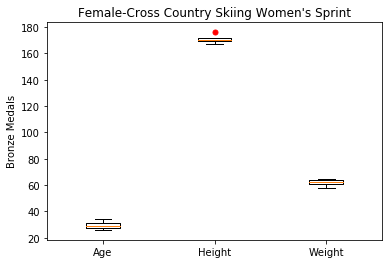

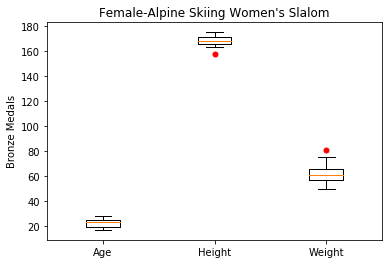

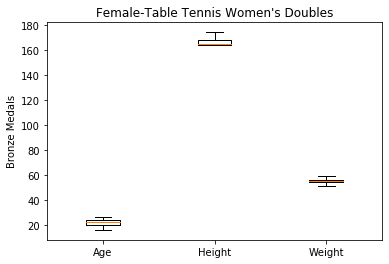

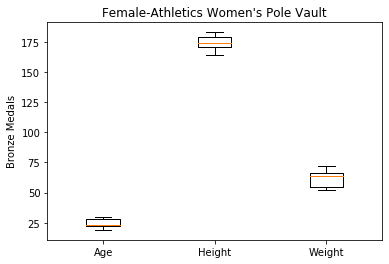

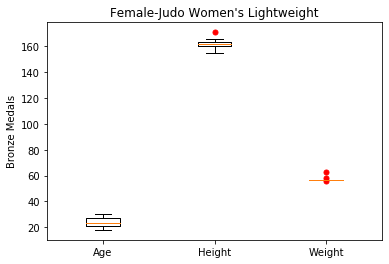

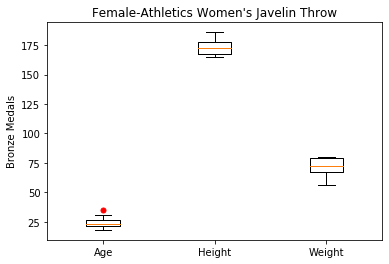

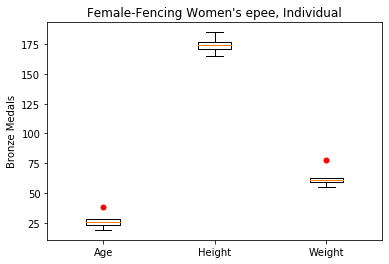

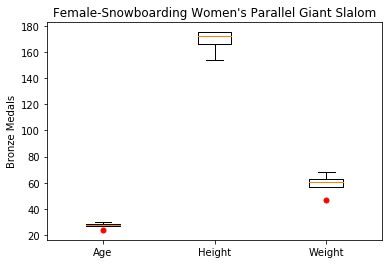

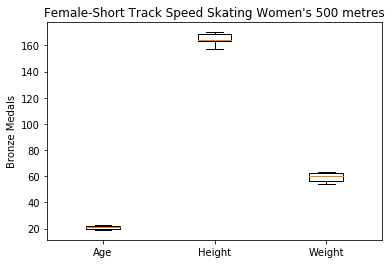

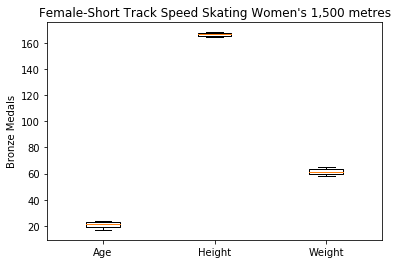

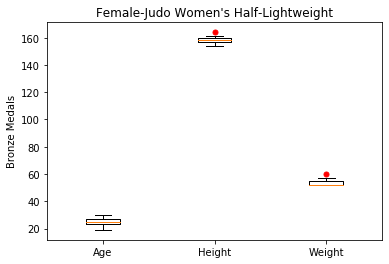

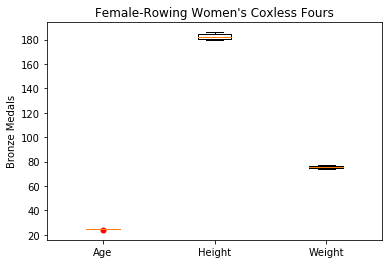

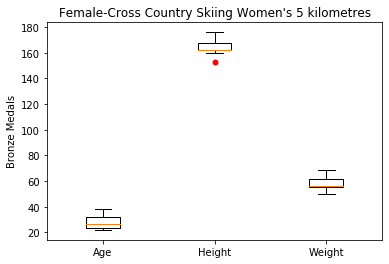

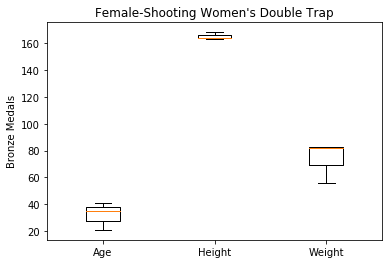

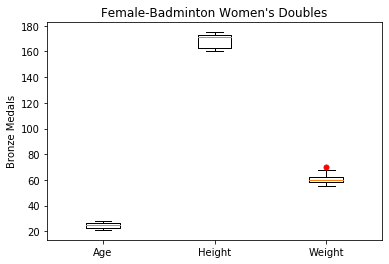

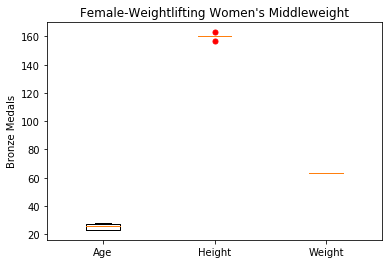

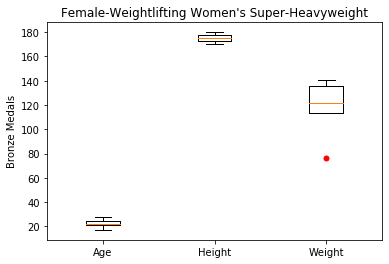

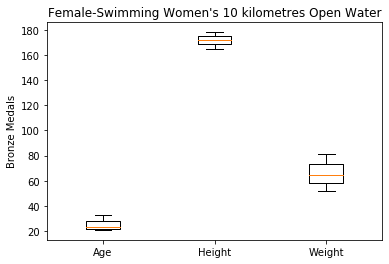

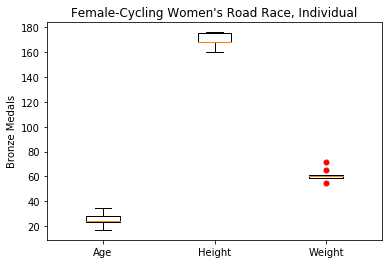

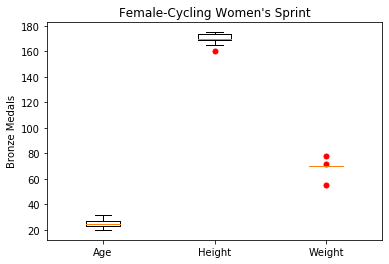

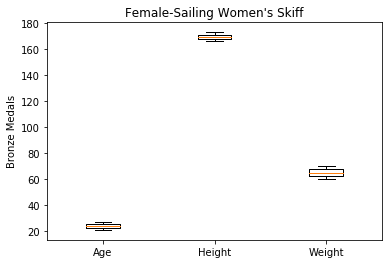

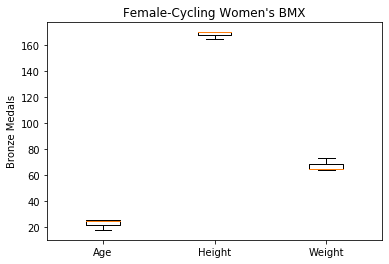

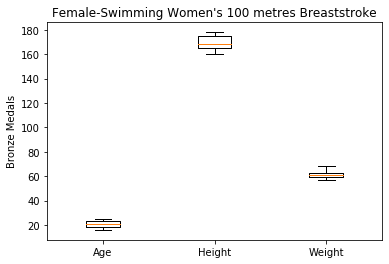

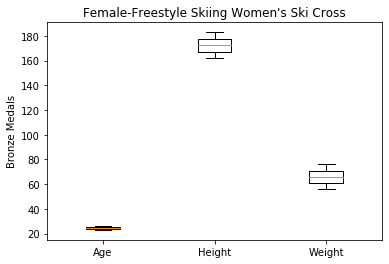

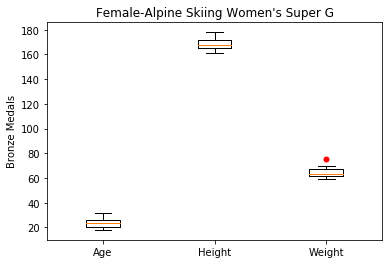

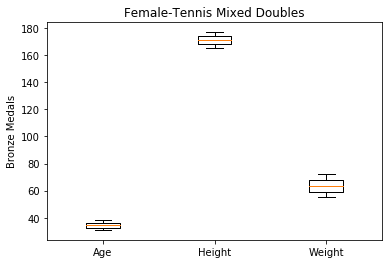

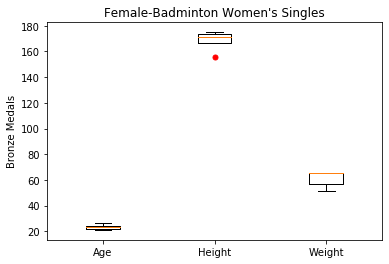

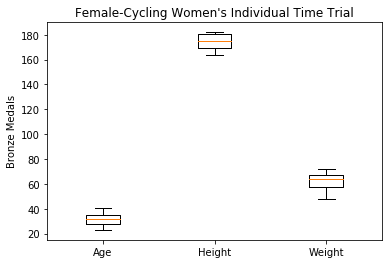

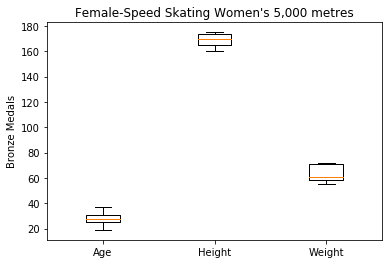

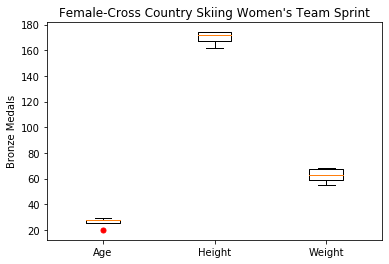

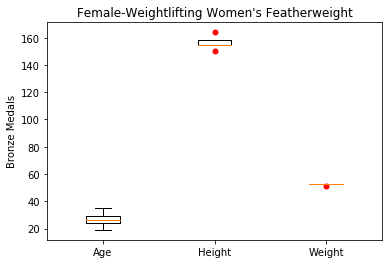

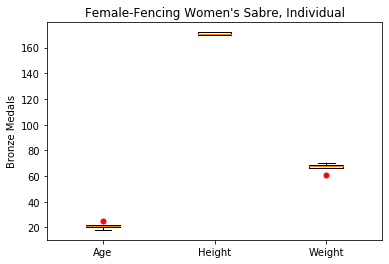

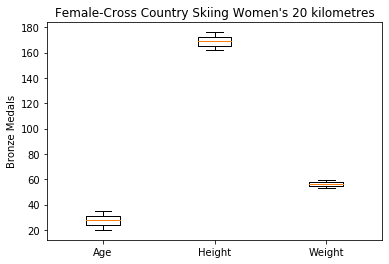

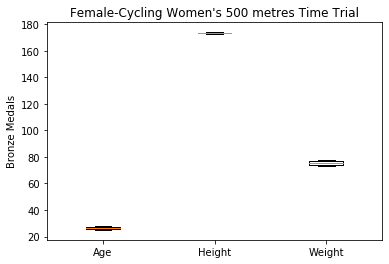

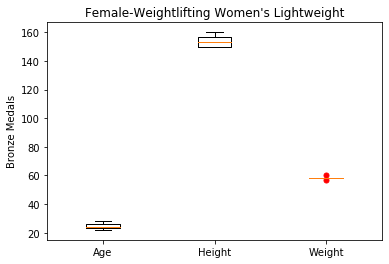

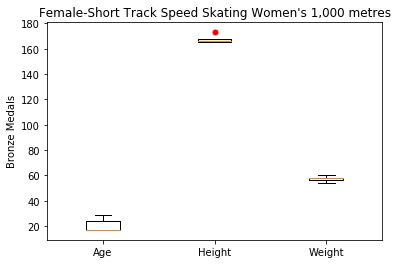

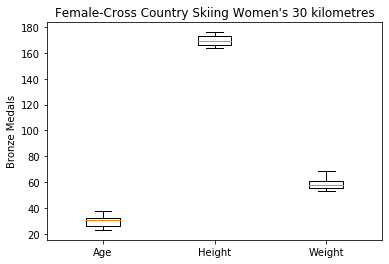

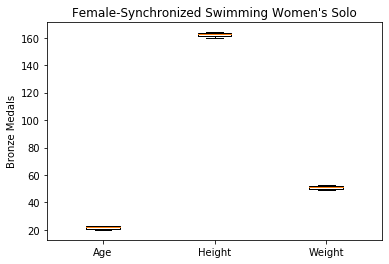

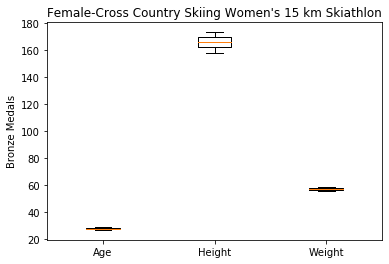

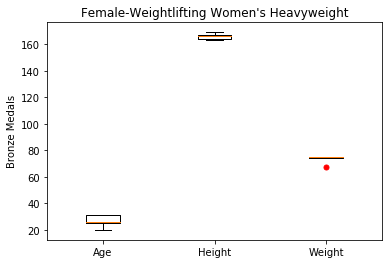

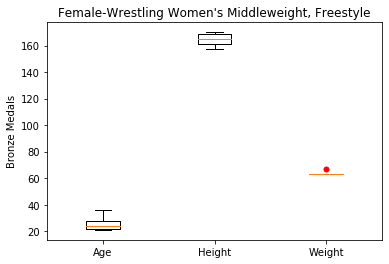

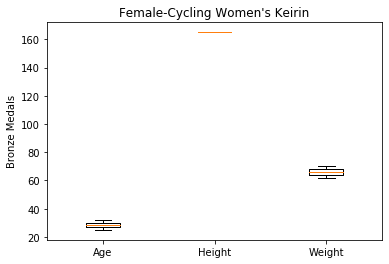

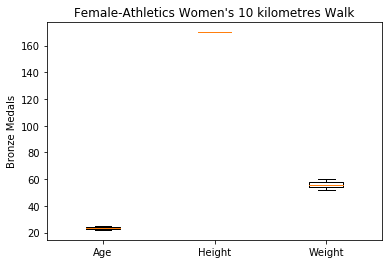

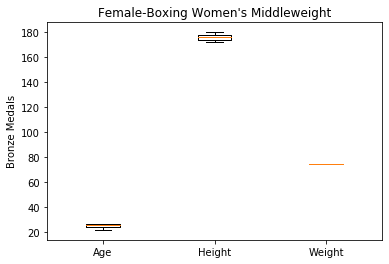

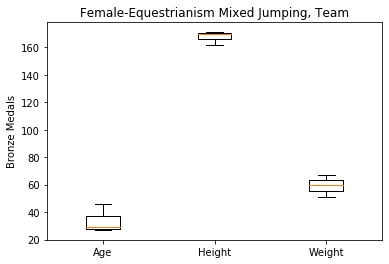

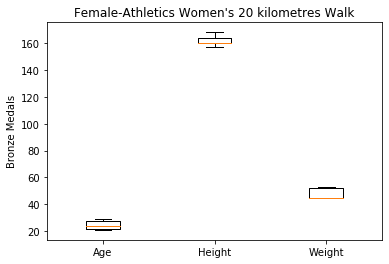

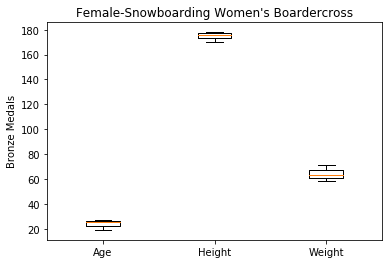

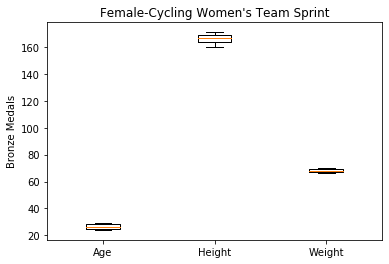

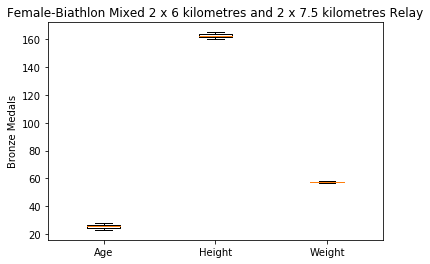

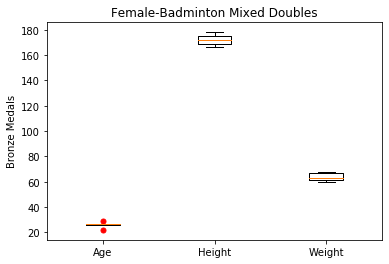

In [18]:

# Get unique name of event
event_list = female_sports_df.Event.unique()

# Create empty age, height, weight lists for storage
bronze_age_list = []
bronze_height_list = []
bronze_weight_list = []

for event_name in event_list:
    def event_function(event_name):
        
        # Filtering DataFrame for specific event name
        df = female_sports_df.loc[(female_sports_df['Event'] == event_name ),:]

        # Creating the Boxplot
        age_plot = df.loc[df['Event'] == event_name]['Age']
        height_plot = df.loc[df['Event'] == event_name]['Height']
        weight_plot = df.loc[df['Event'] == event_name]['Weight']

        outlier_markers = dict(marker = 'o' , markerfacecolor='r', 
                               markersize=5, markeredgecolor='r')
        plt.boxplot([age_plot, height_plot, weight_plot], 
                    labels=['Age', 'Height', 'Weight'], 
                    flierprops=outlier_markers)
        plt.ylabel('Bronze Medals')
        plt.title(f'Female-{event_name}')

        #plt.savefig(f'Female-Sport-Events/Plots/Female-{event_name}.png')
        plt.show()

        # Calculate the quartiles
        age_quartiles = age_plot.quantile([.25,.5,.75])
        height_quartiles = height_plot.quantile([.25,.5,.75])
        weight_quartiles = weight_plot.quantile([.25,.5,.75])
        
        # Creating age list
        age = round(age_quartiles[0.5])
        bronze_age_list.append(age)
        
        # Creating height list
        height = (height_quartiles[0.5])/30.48
        bronze_height_list.append("%.2f"%height)
        
        # Creating weight list
        weight = (weight_quartiles[0.5])*2.205
        bronze_weight_list.append("%.2f"%weight)
        
    event_function(event_name)
# print(f'Bronze Age List: {bronze_age_list}')
# print(f'Bronze Height List: {bronze_height_list}')
# print(f'Bronze Weight List: {bronze_weight_list}')


In [19]:
# Finding out length of list 
print(len(bronze_age_list))
print(len(bronze_height_list))
print(len(bronze_weight_list))
print(len(event_list))

204
204
204
204


In [20]:
# Storing values from list to make a DataFrame
bronze_dictionary = {"Event":event_list,"Age":bronze_age_list, "Height": bronze_height_list, 
                    "Weight":bronze_weight_list, "Female": "Female" }

bronze_bodycomp_age_df = pd.DataFrame(bronze_dictionary)
bronze_bodycomp_age_df.head()

Event   Age Height  Weight  Female
0                     Football Women's Football  25.0   5.61  138.91  Female
1                   Taekwondo Women's Flyweight  21.0   5.46  108.05  Female
2  Swimming Women's 4 x 100 metres Medley Relay  18.0   5.66  136.71  Female
3       Diving Women's Synchronized Springboard  26.0   5.50  130.09  Female
4   Speed Skating Women's Team Pursuit (6 laps)  28.0   5.58  141.12  Female

In [21]:
# Saving Dataframe into a csv file
bronze_bodycomp_age_df.to_csv('Female-Events/female_bronze_bodycomp_age.csv', index=False)

In [22]:
# Saving Dataframe into a JSON file
bronze_bodycomp_age_df.to_json('Female-Events/female_bronze_bodycomp_age.json')


